Ths notebook will perform an in-depth analysis of a churn dataset of a telco company. Each row includes user data ranging from 1 to 246 days in terms of account activation. 

This analysis will try to produce a model that both:

1) Predicts whether a customer is likely to churn in the near future

2) Identify the features that are more relevant when it comes to churn


The notebook will be divided  into the following sections:

.EDA

.Baseline Modelling

.Models Optimisations

.Performance Evaluation

.Findings and Conclusion



# EDA 

### Initial EDA & Data Cleaning

In [161]:
# importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [105]:
# importing initial dataset
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

# there are 3 types of data that are not numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [106]:
# displaying all columns
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [107]:
# converting all non-numerical values apart from 'state' into categorical
label_encoder = preprocessing.LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['area code'] = label_encoder.fit_transform(df['area code'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
c

In [108]:
# each customer has got a single number
df['phone number'].nunique()

3333

In [109]:
# dropping phone number as it is irrelevant in our model since each customer has got a unique numbers
df.drop('phone number', axis = 1, inplace = True)

In [110]:
# there are no missing values
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [111]:
# there doesn't seem to be any massive outliers by looking at min and max for each column
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,1.000600,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,0.709649,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,1.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


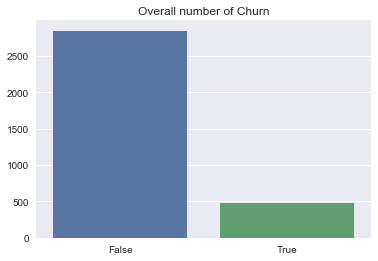

Overall Churn rate is  14.49 %


In [112]:
# calculating overall churn rate
churn = df['churn'].value_counts()
sns.barplot(churn.index, churn.values)
plt.title('Overall number of Churn')
plt.style.use('seaborn')
plt.show()

churn_rate = ((sum(df['churn'] == True)/ len(df['churn'])*100))
print('Overall Churn rate is ', round(churn_rate, 2), '%')

There is some clear **class imbalance** in our dataset that we will need to address when we apply our models

### Plotting all columns against churn rate

In [113]:
# converted the column names into a list
list_index = list(df.columns)

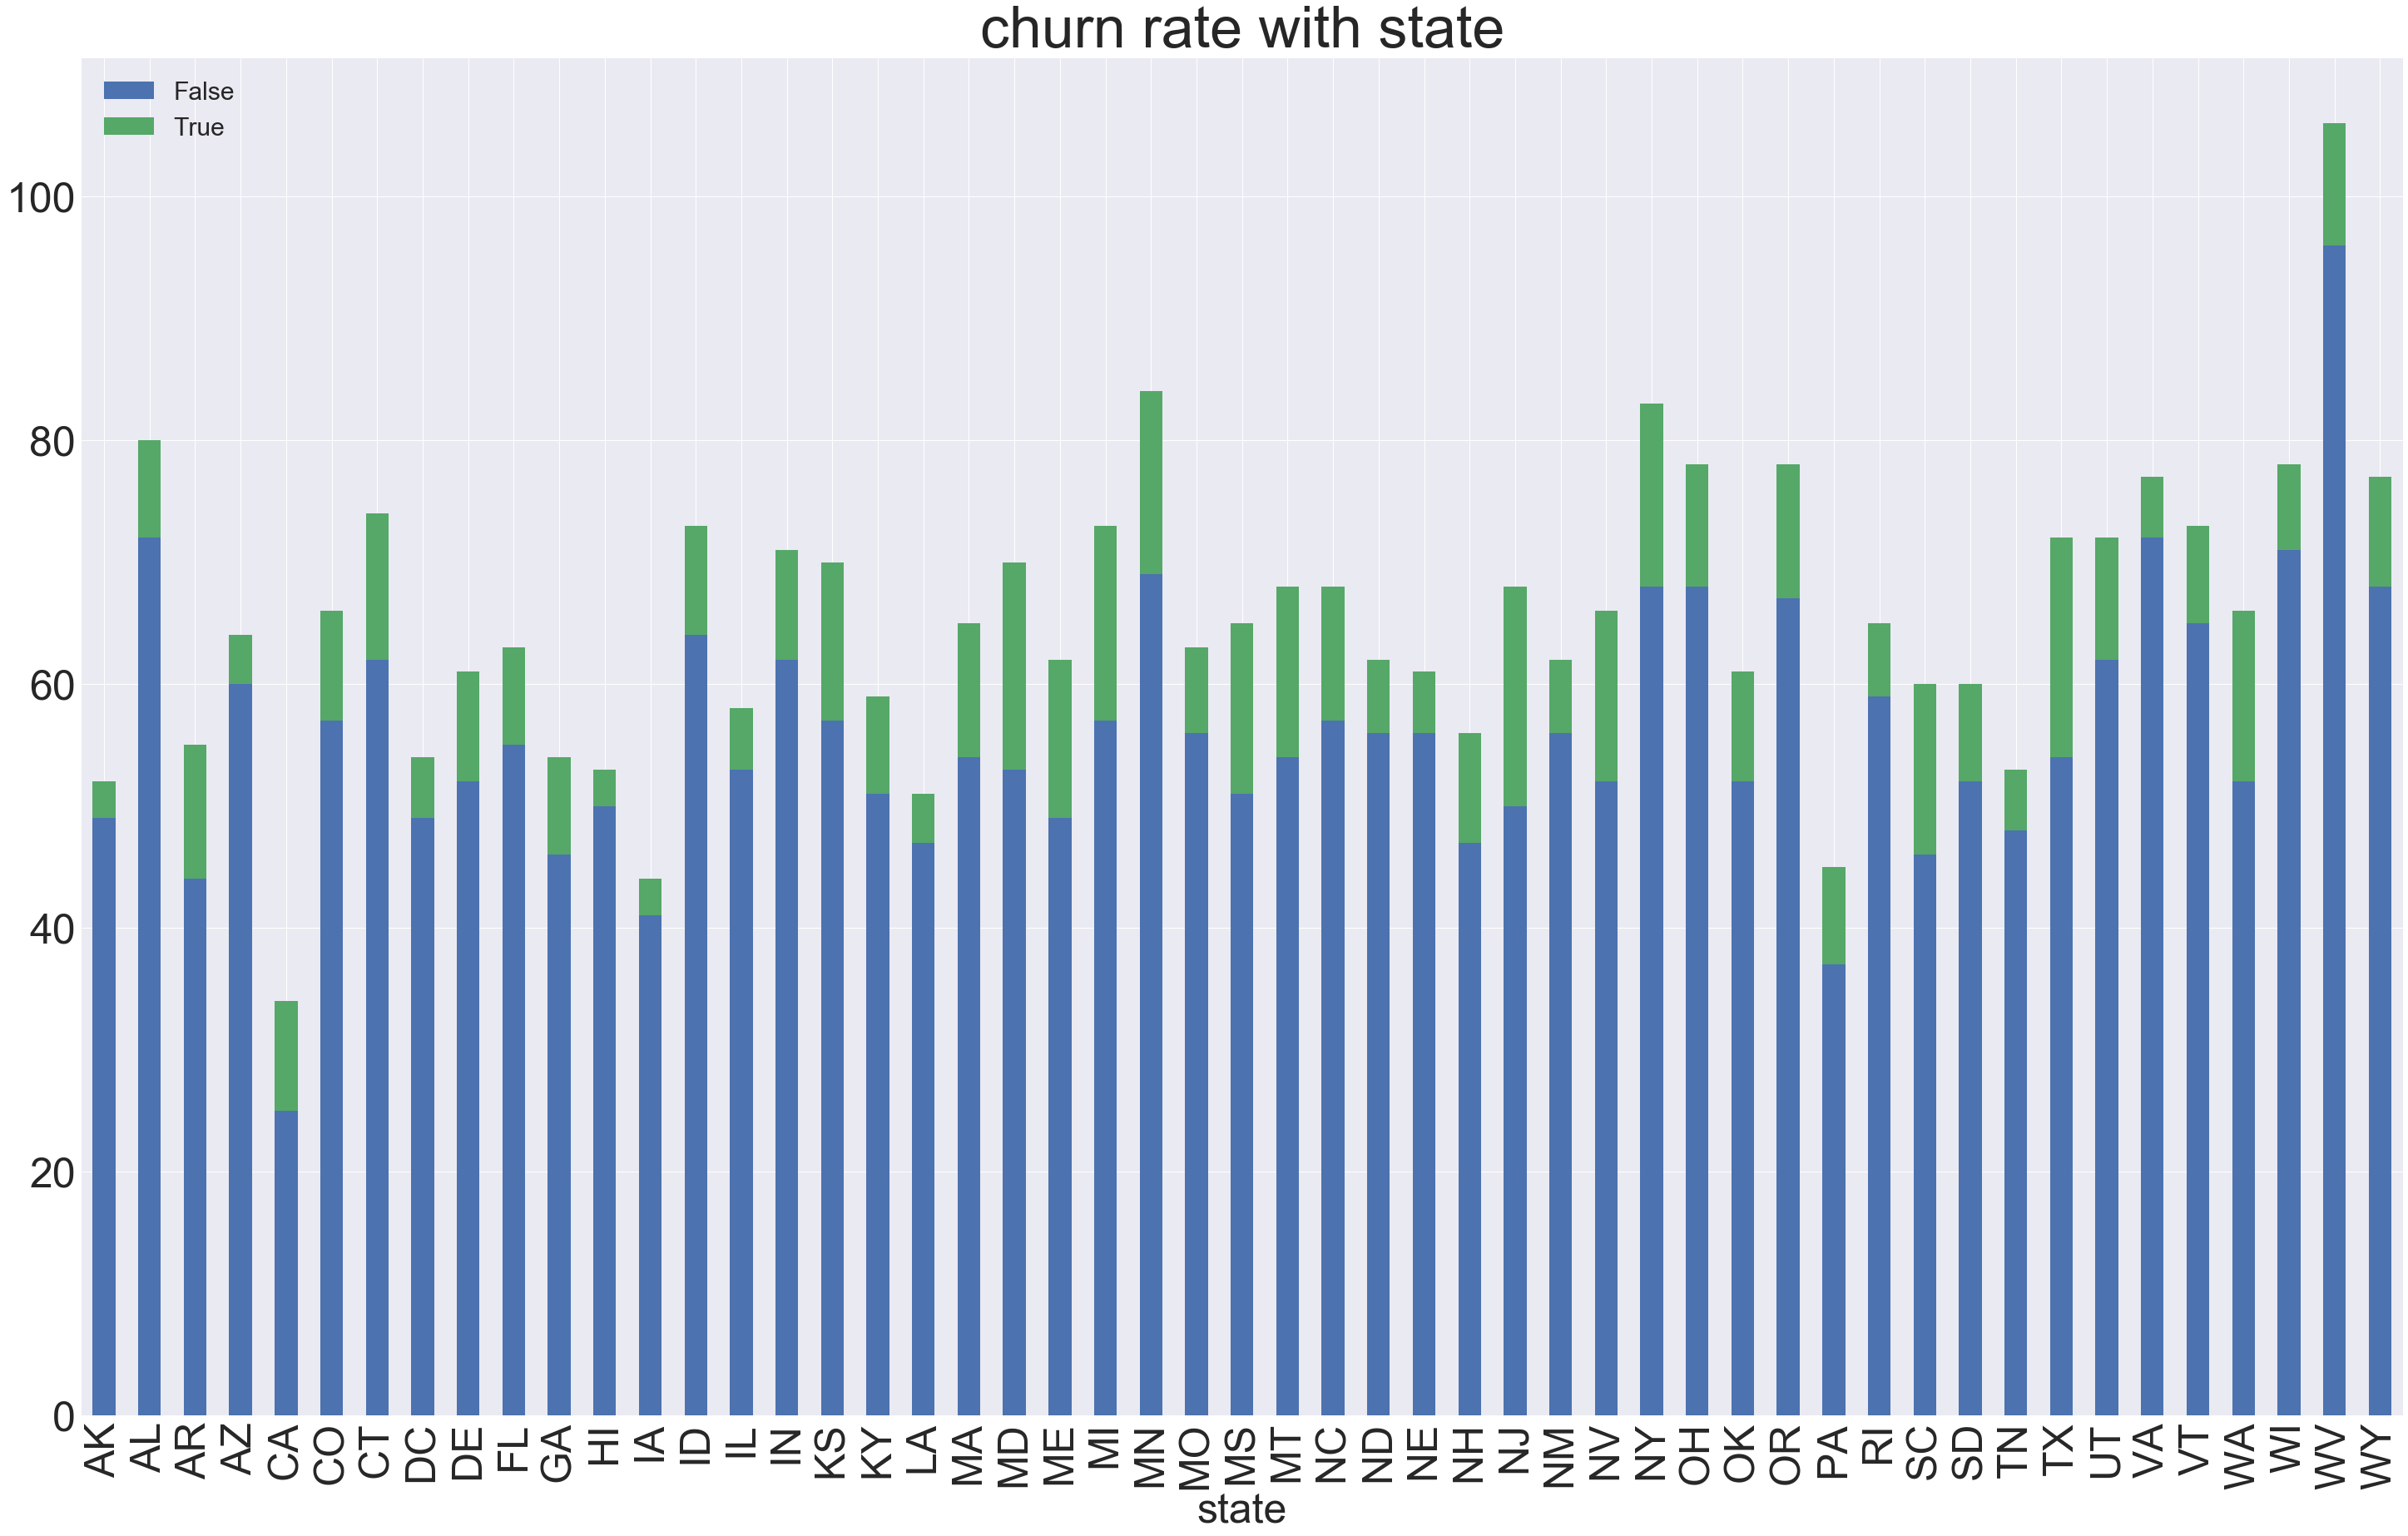

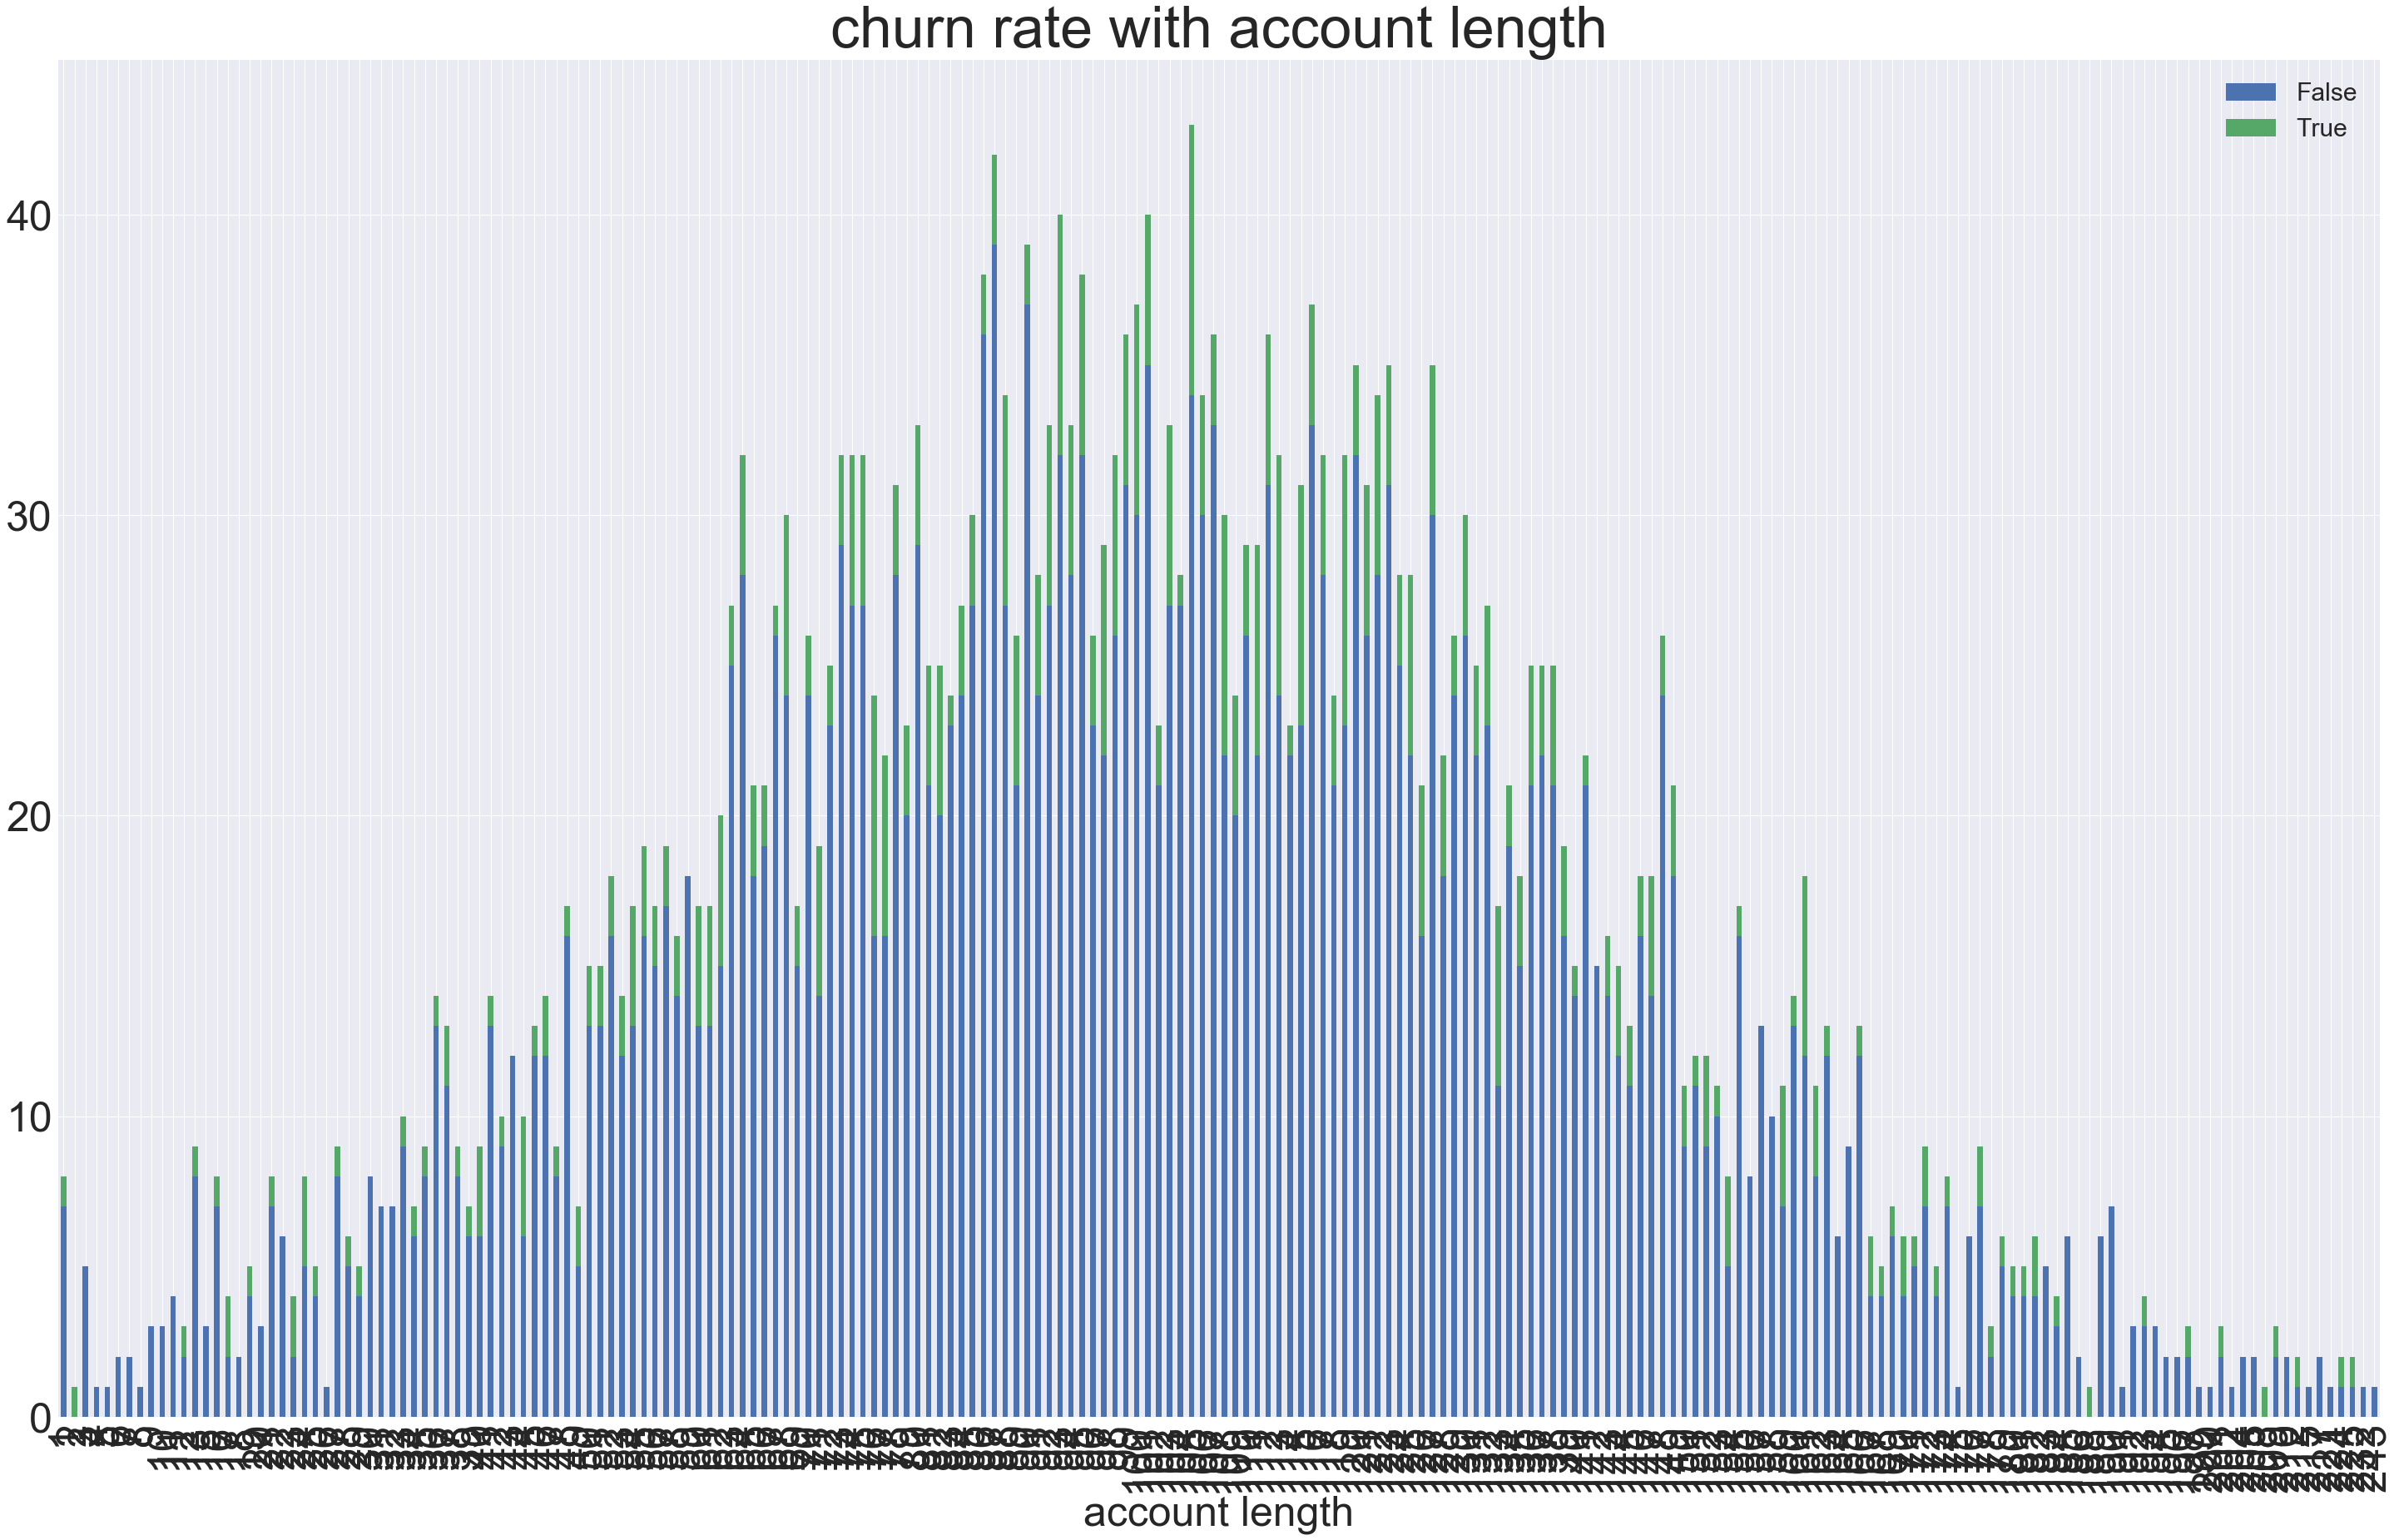

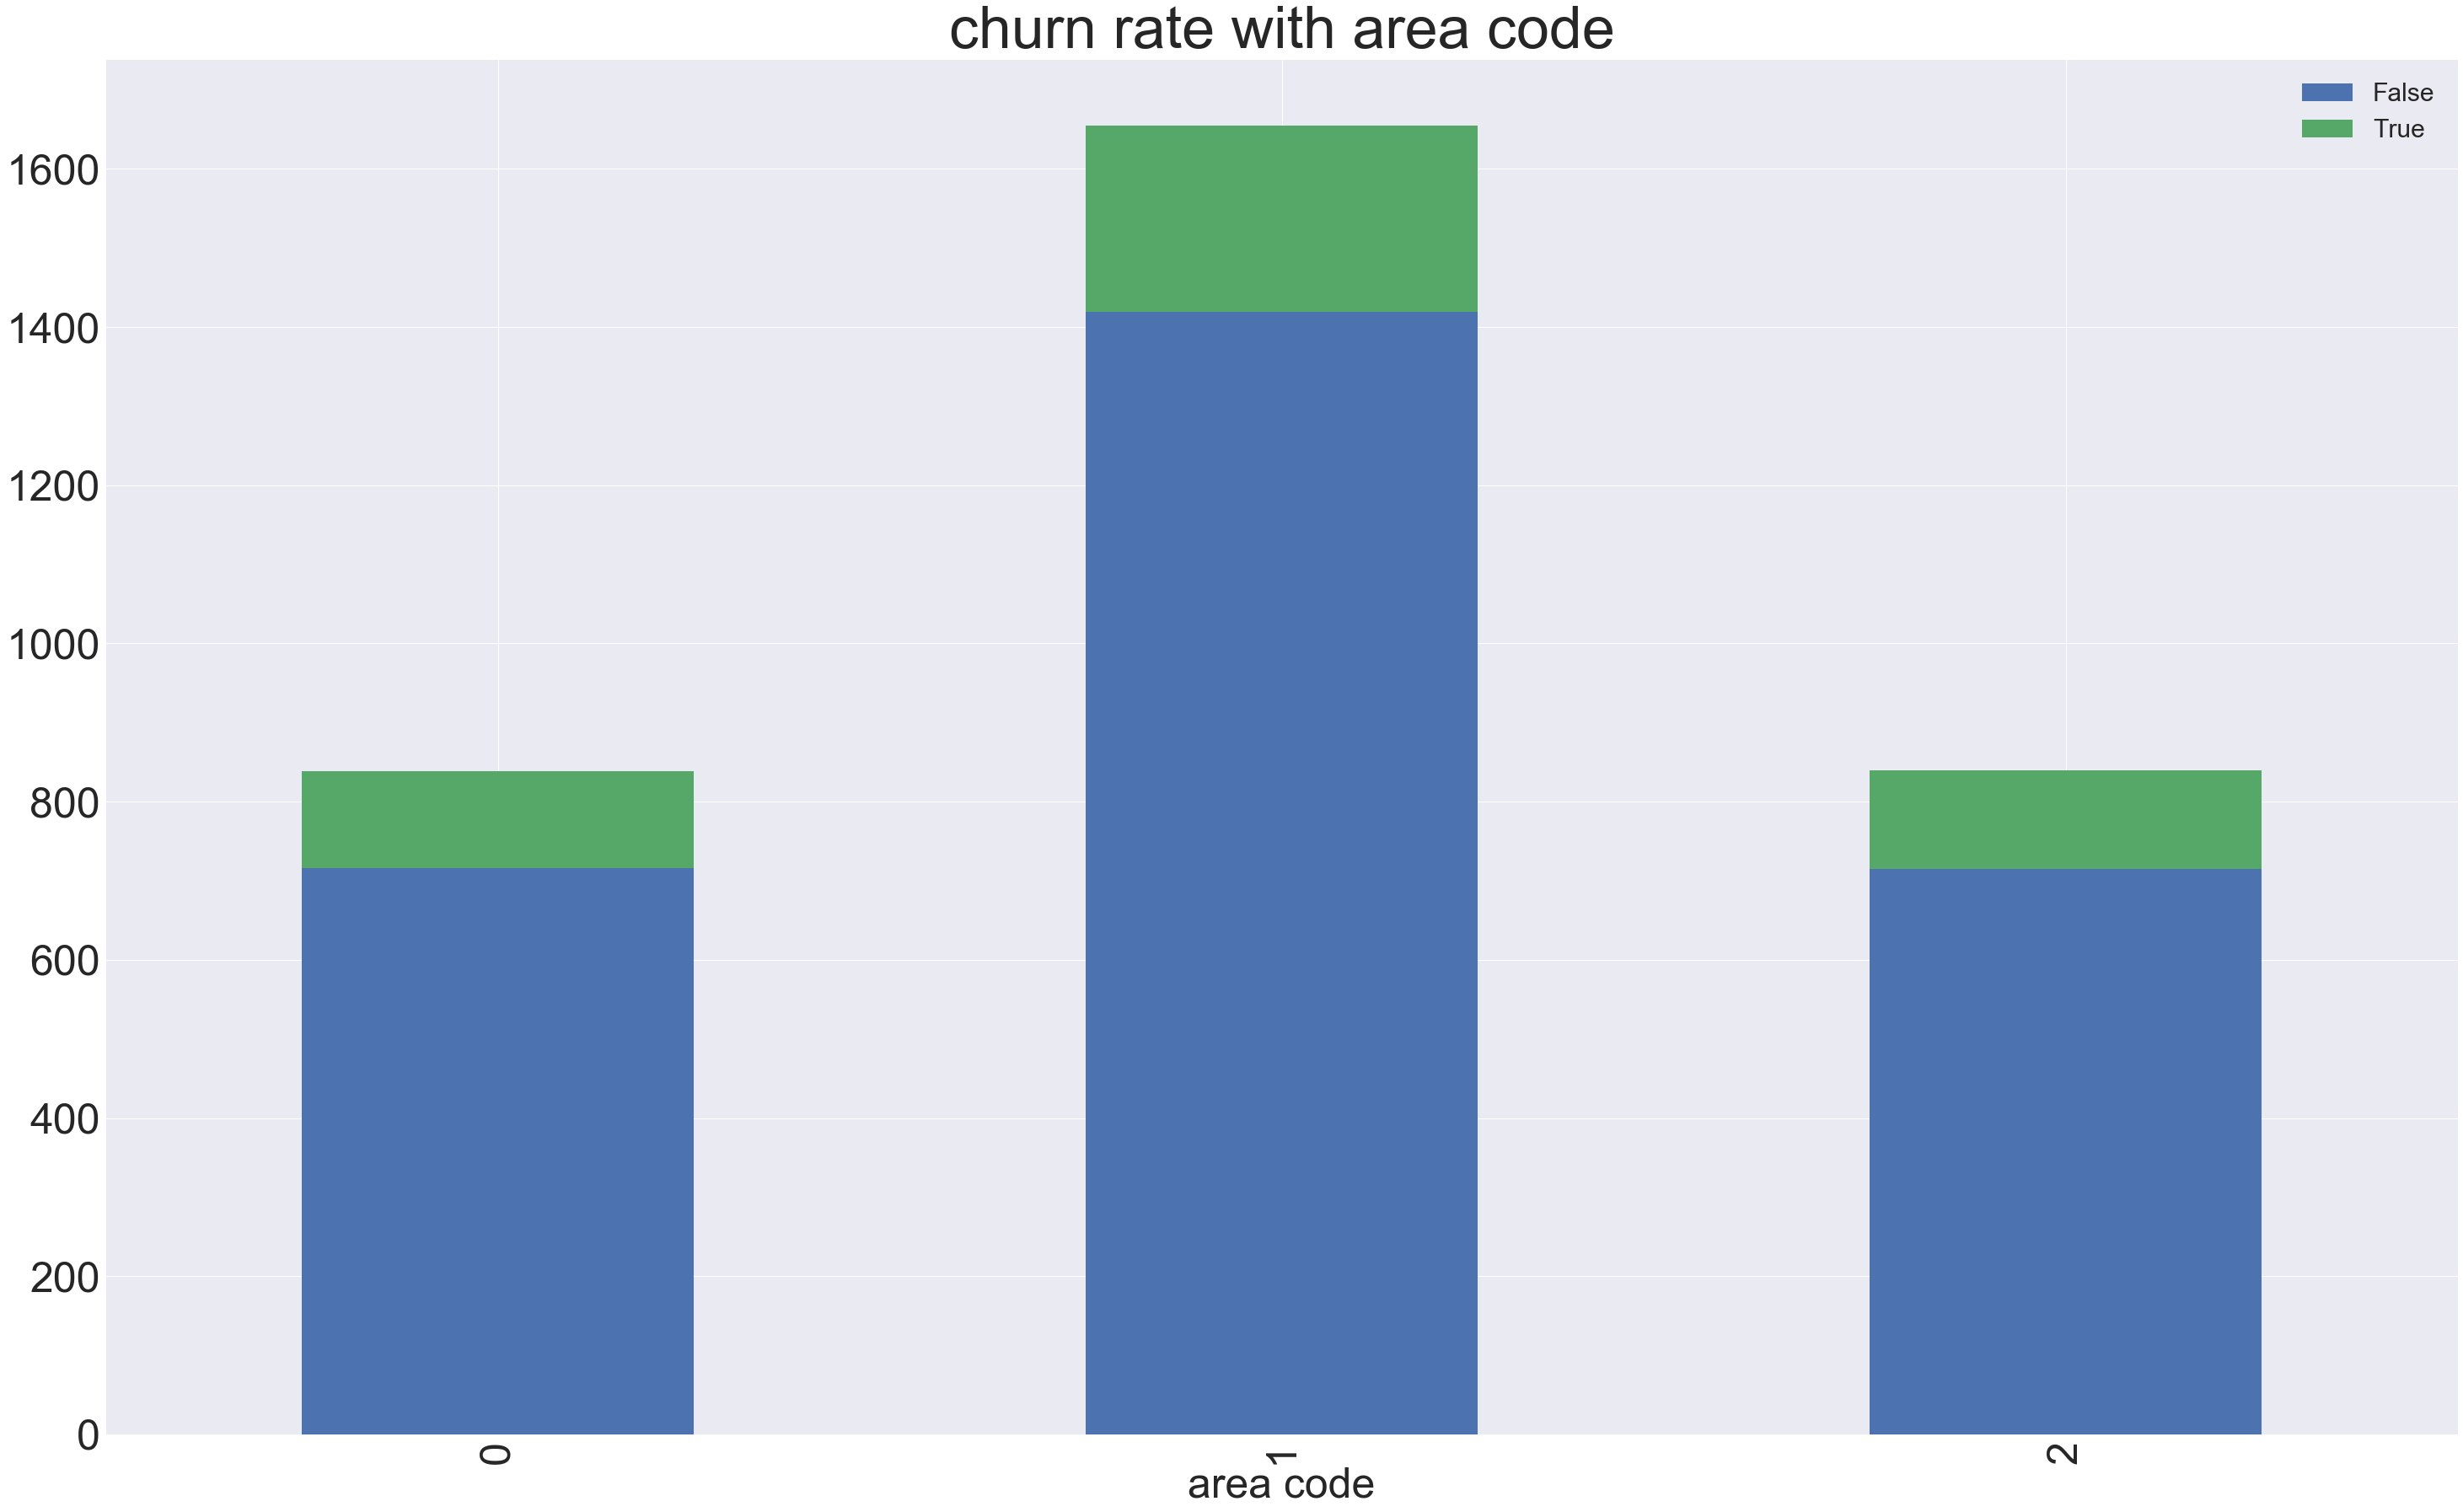

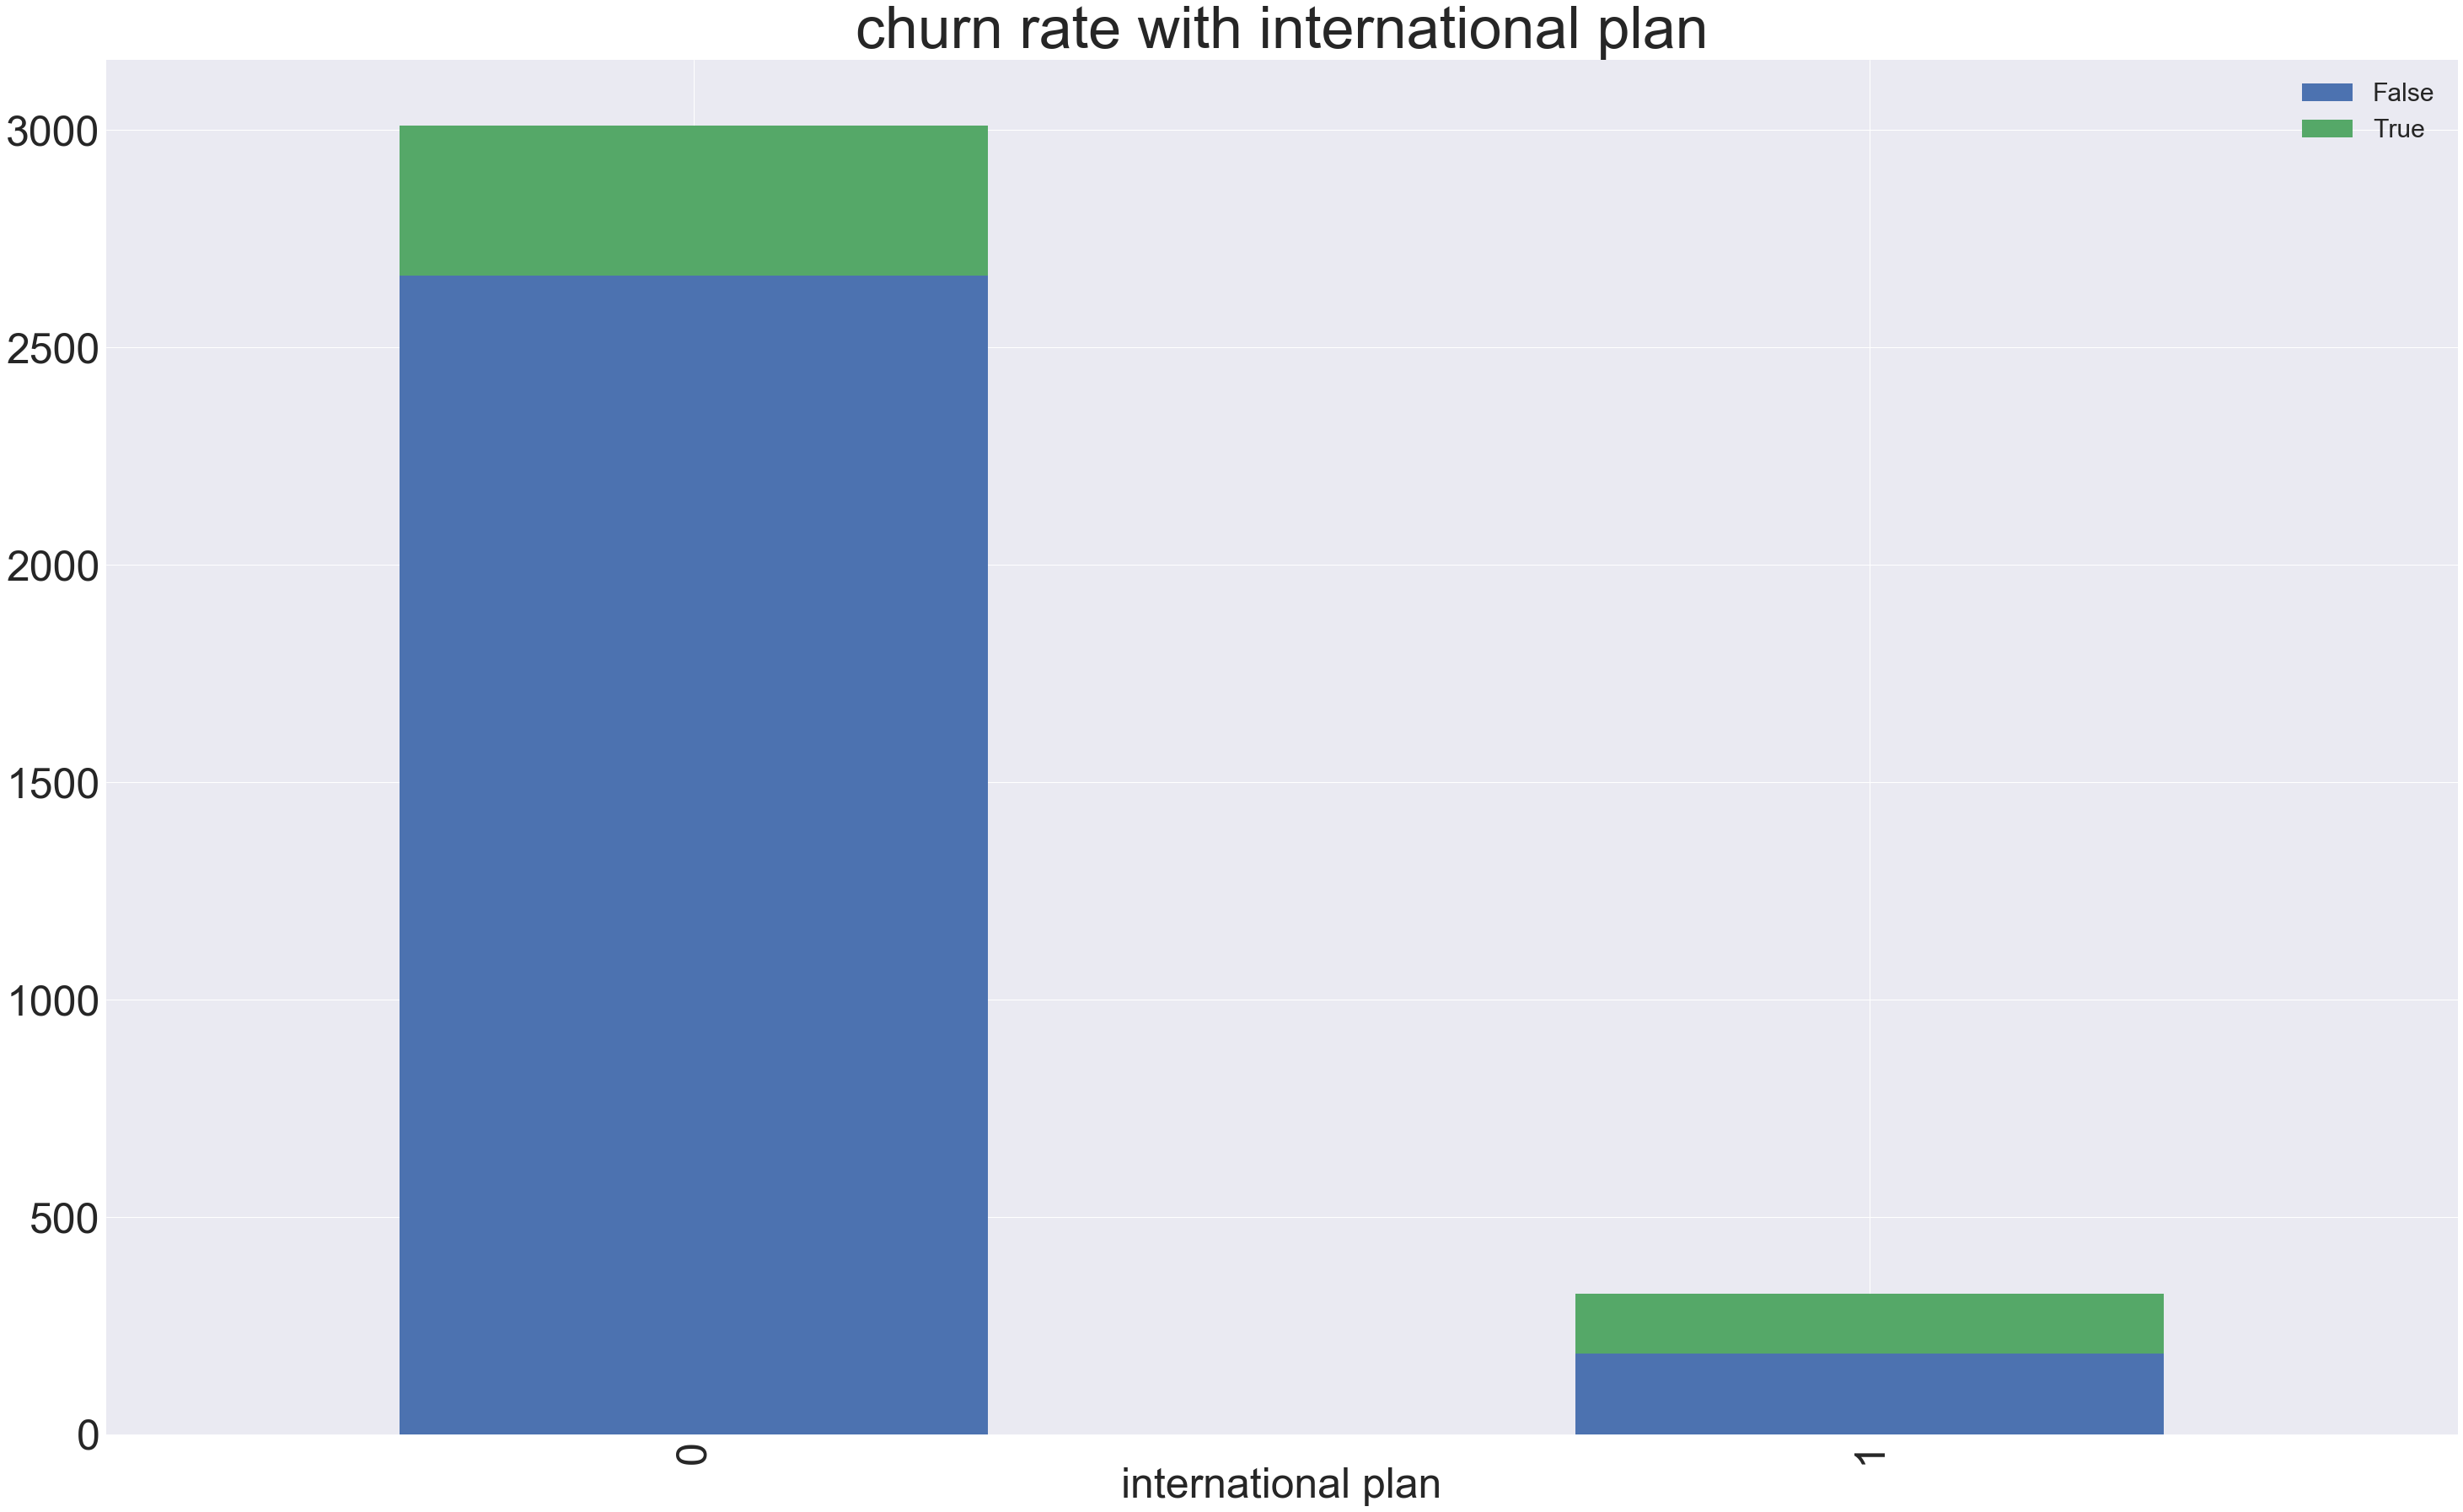

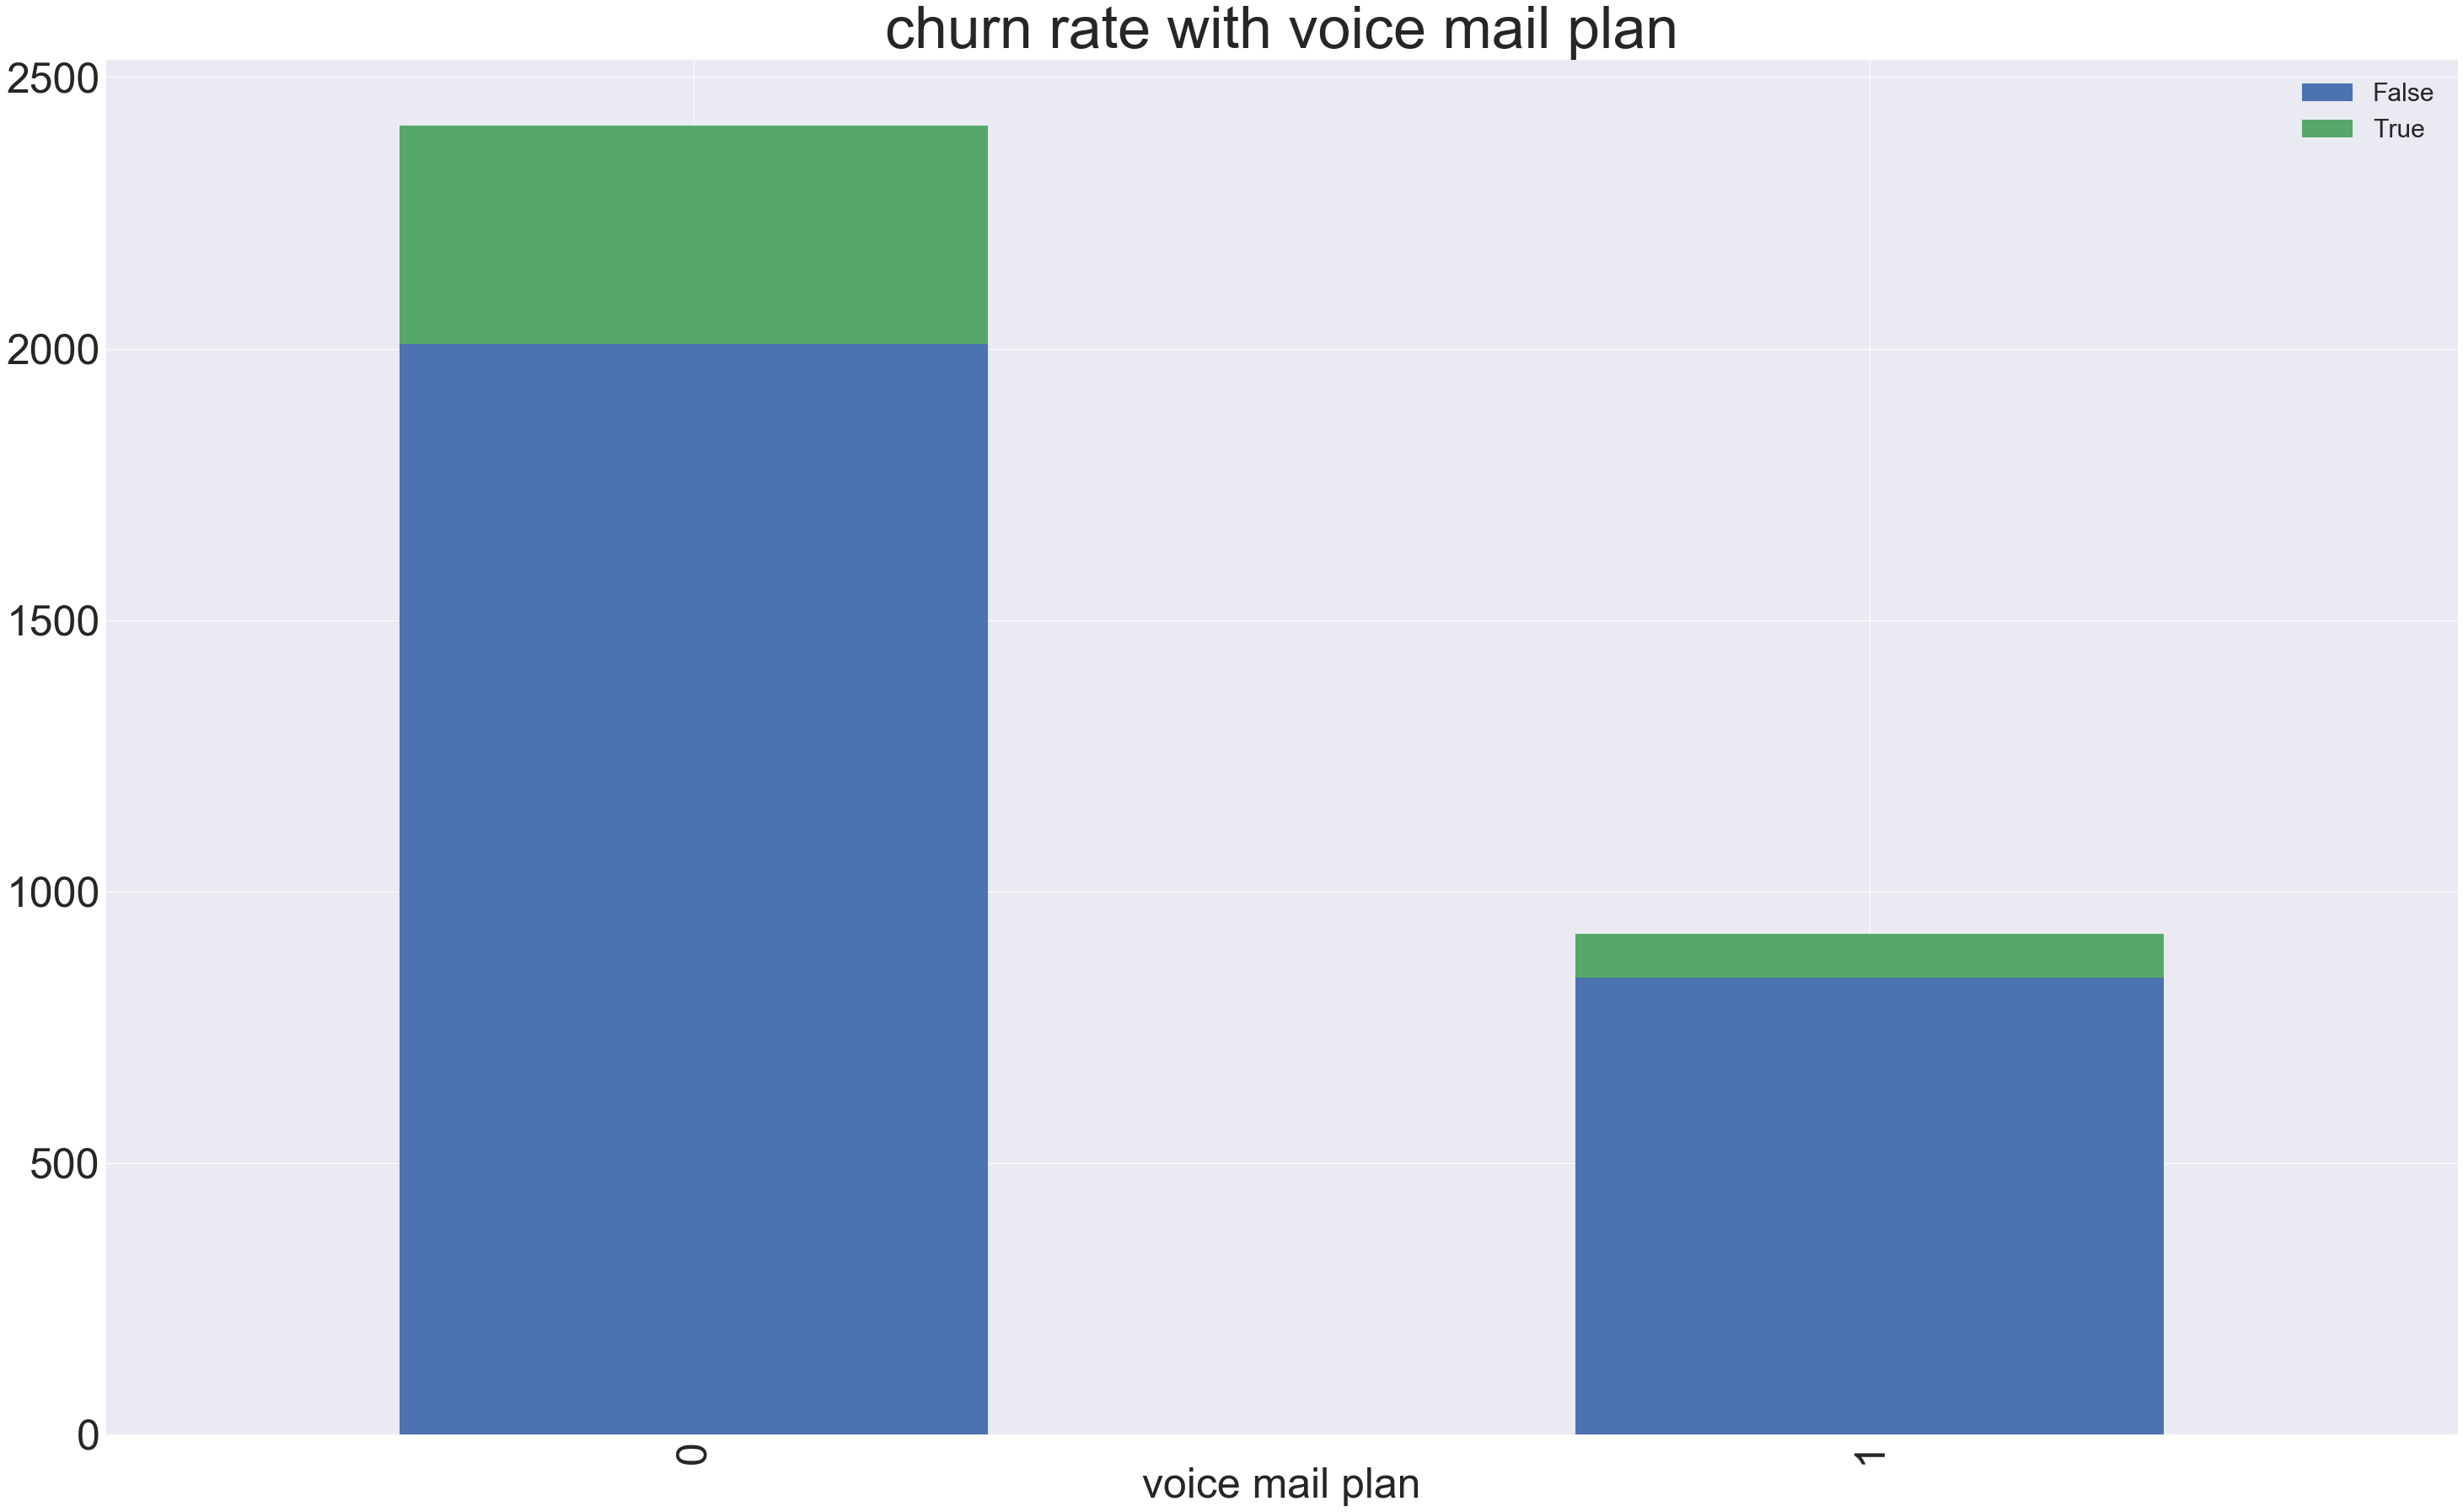

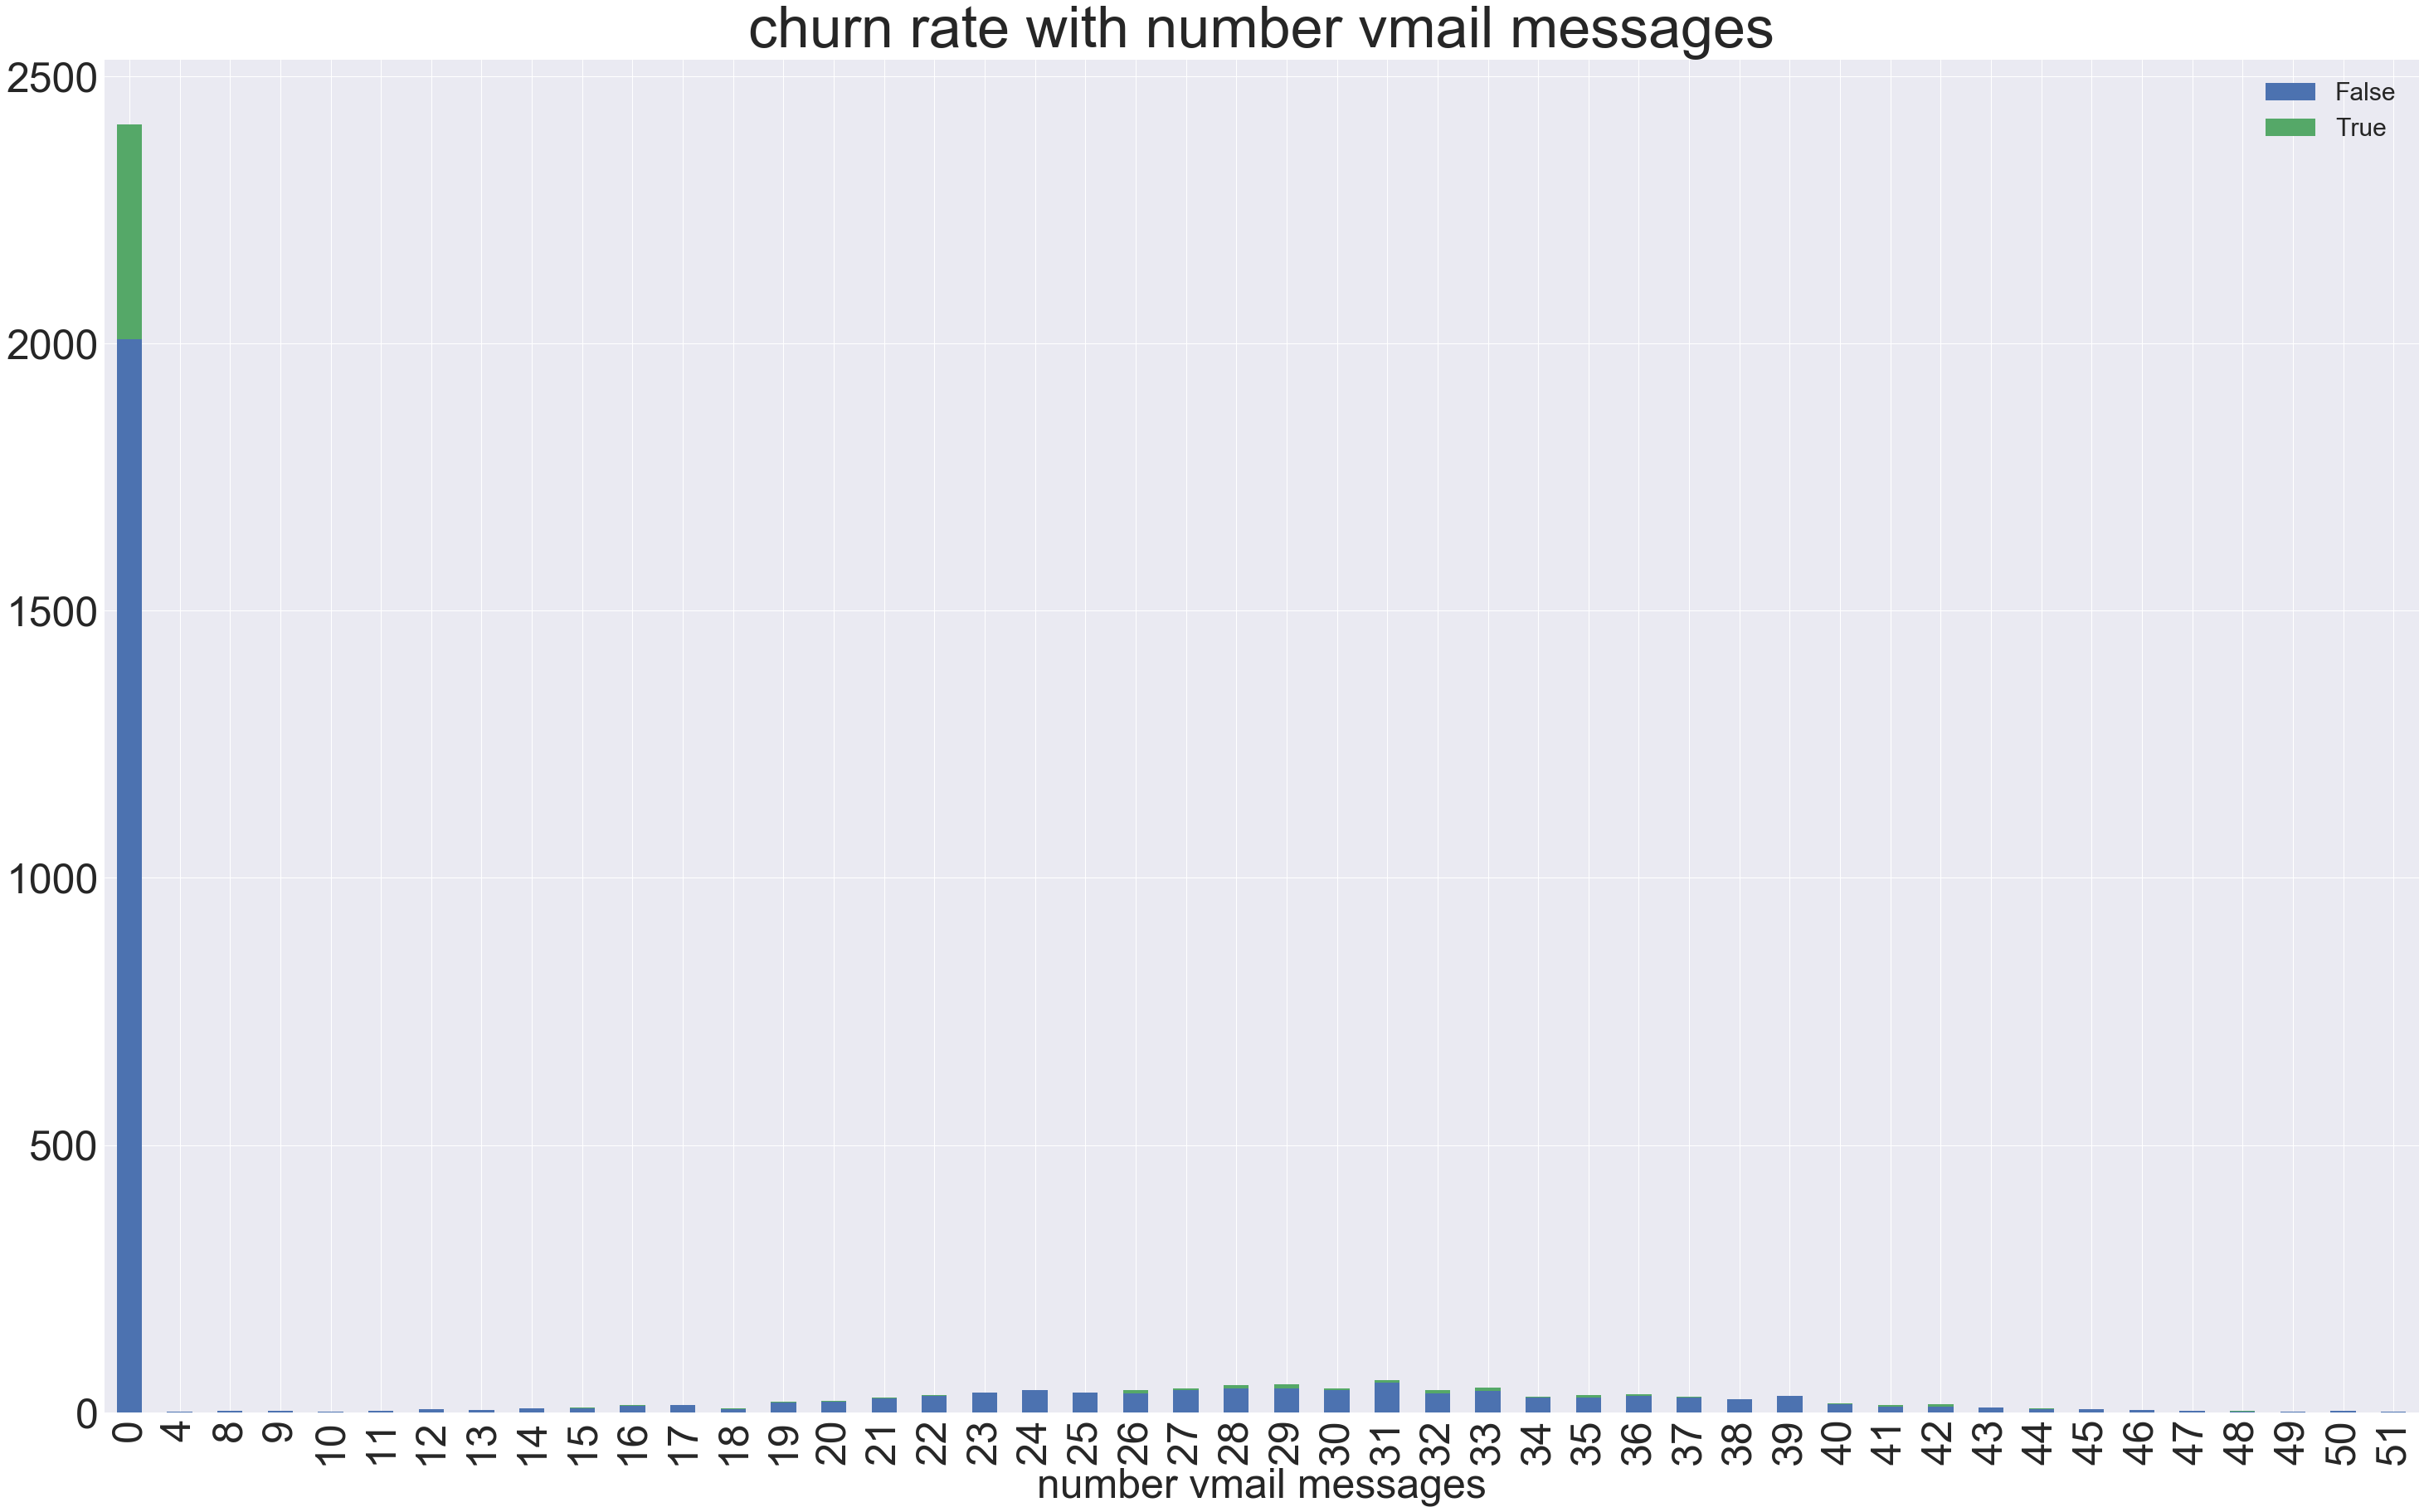

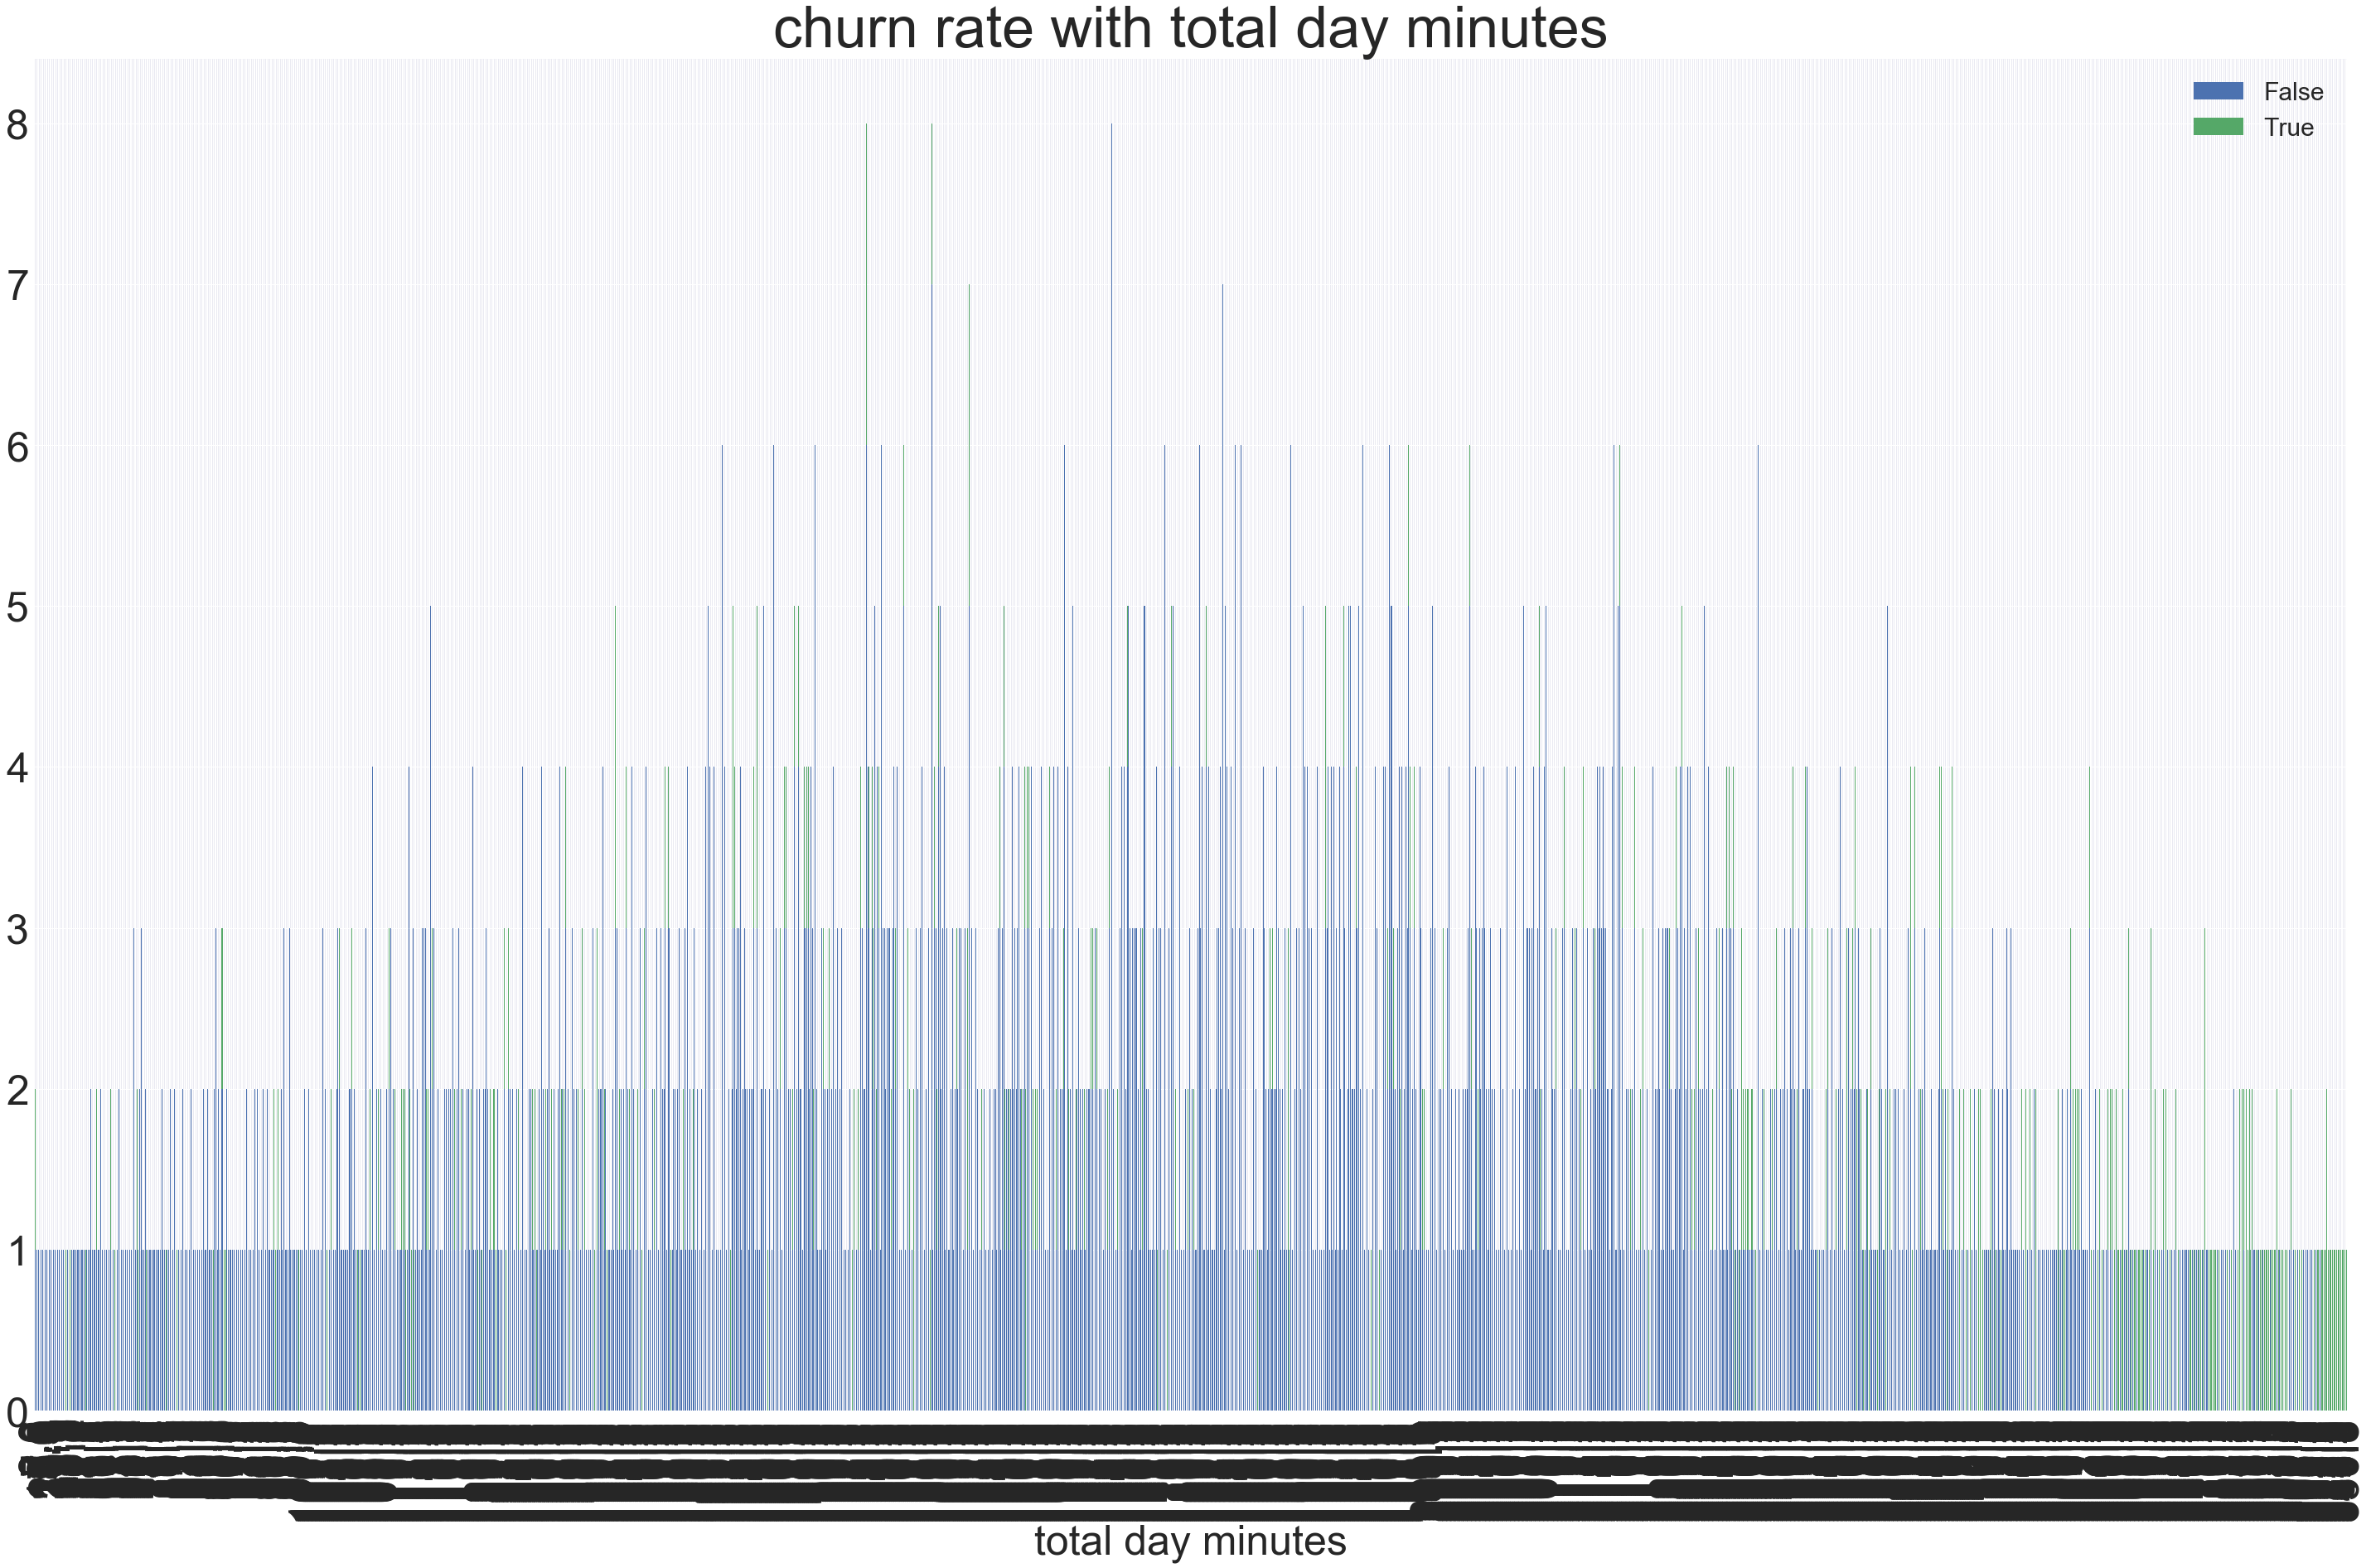

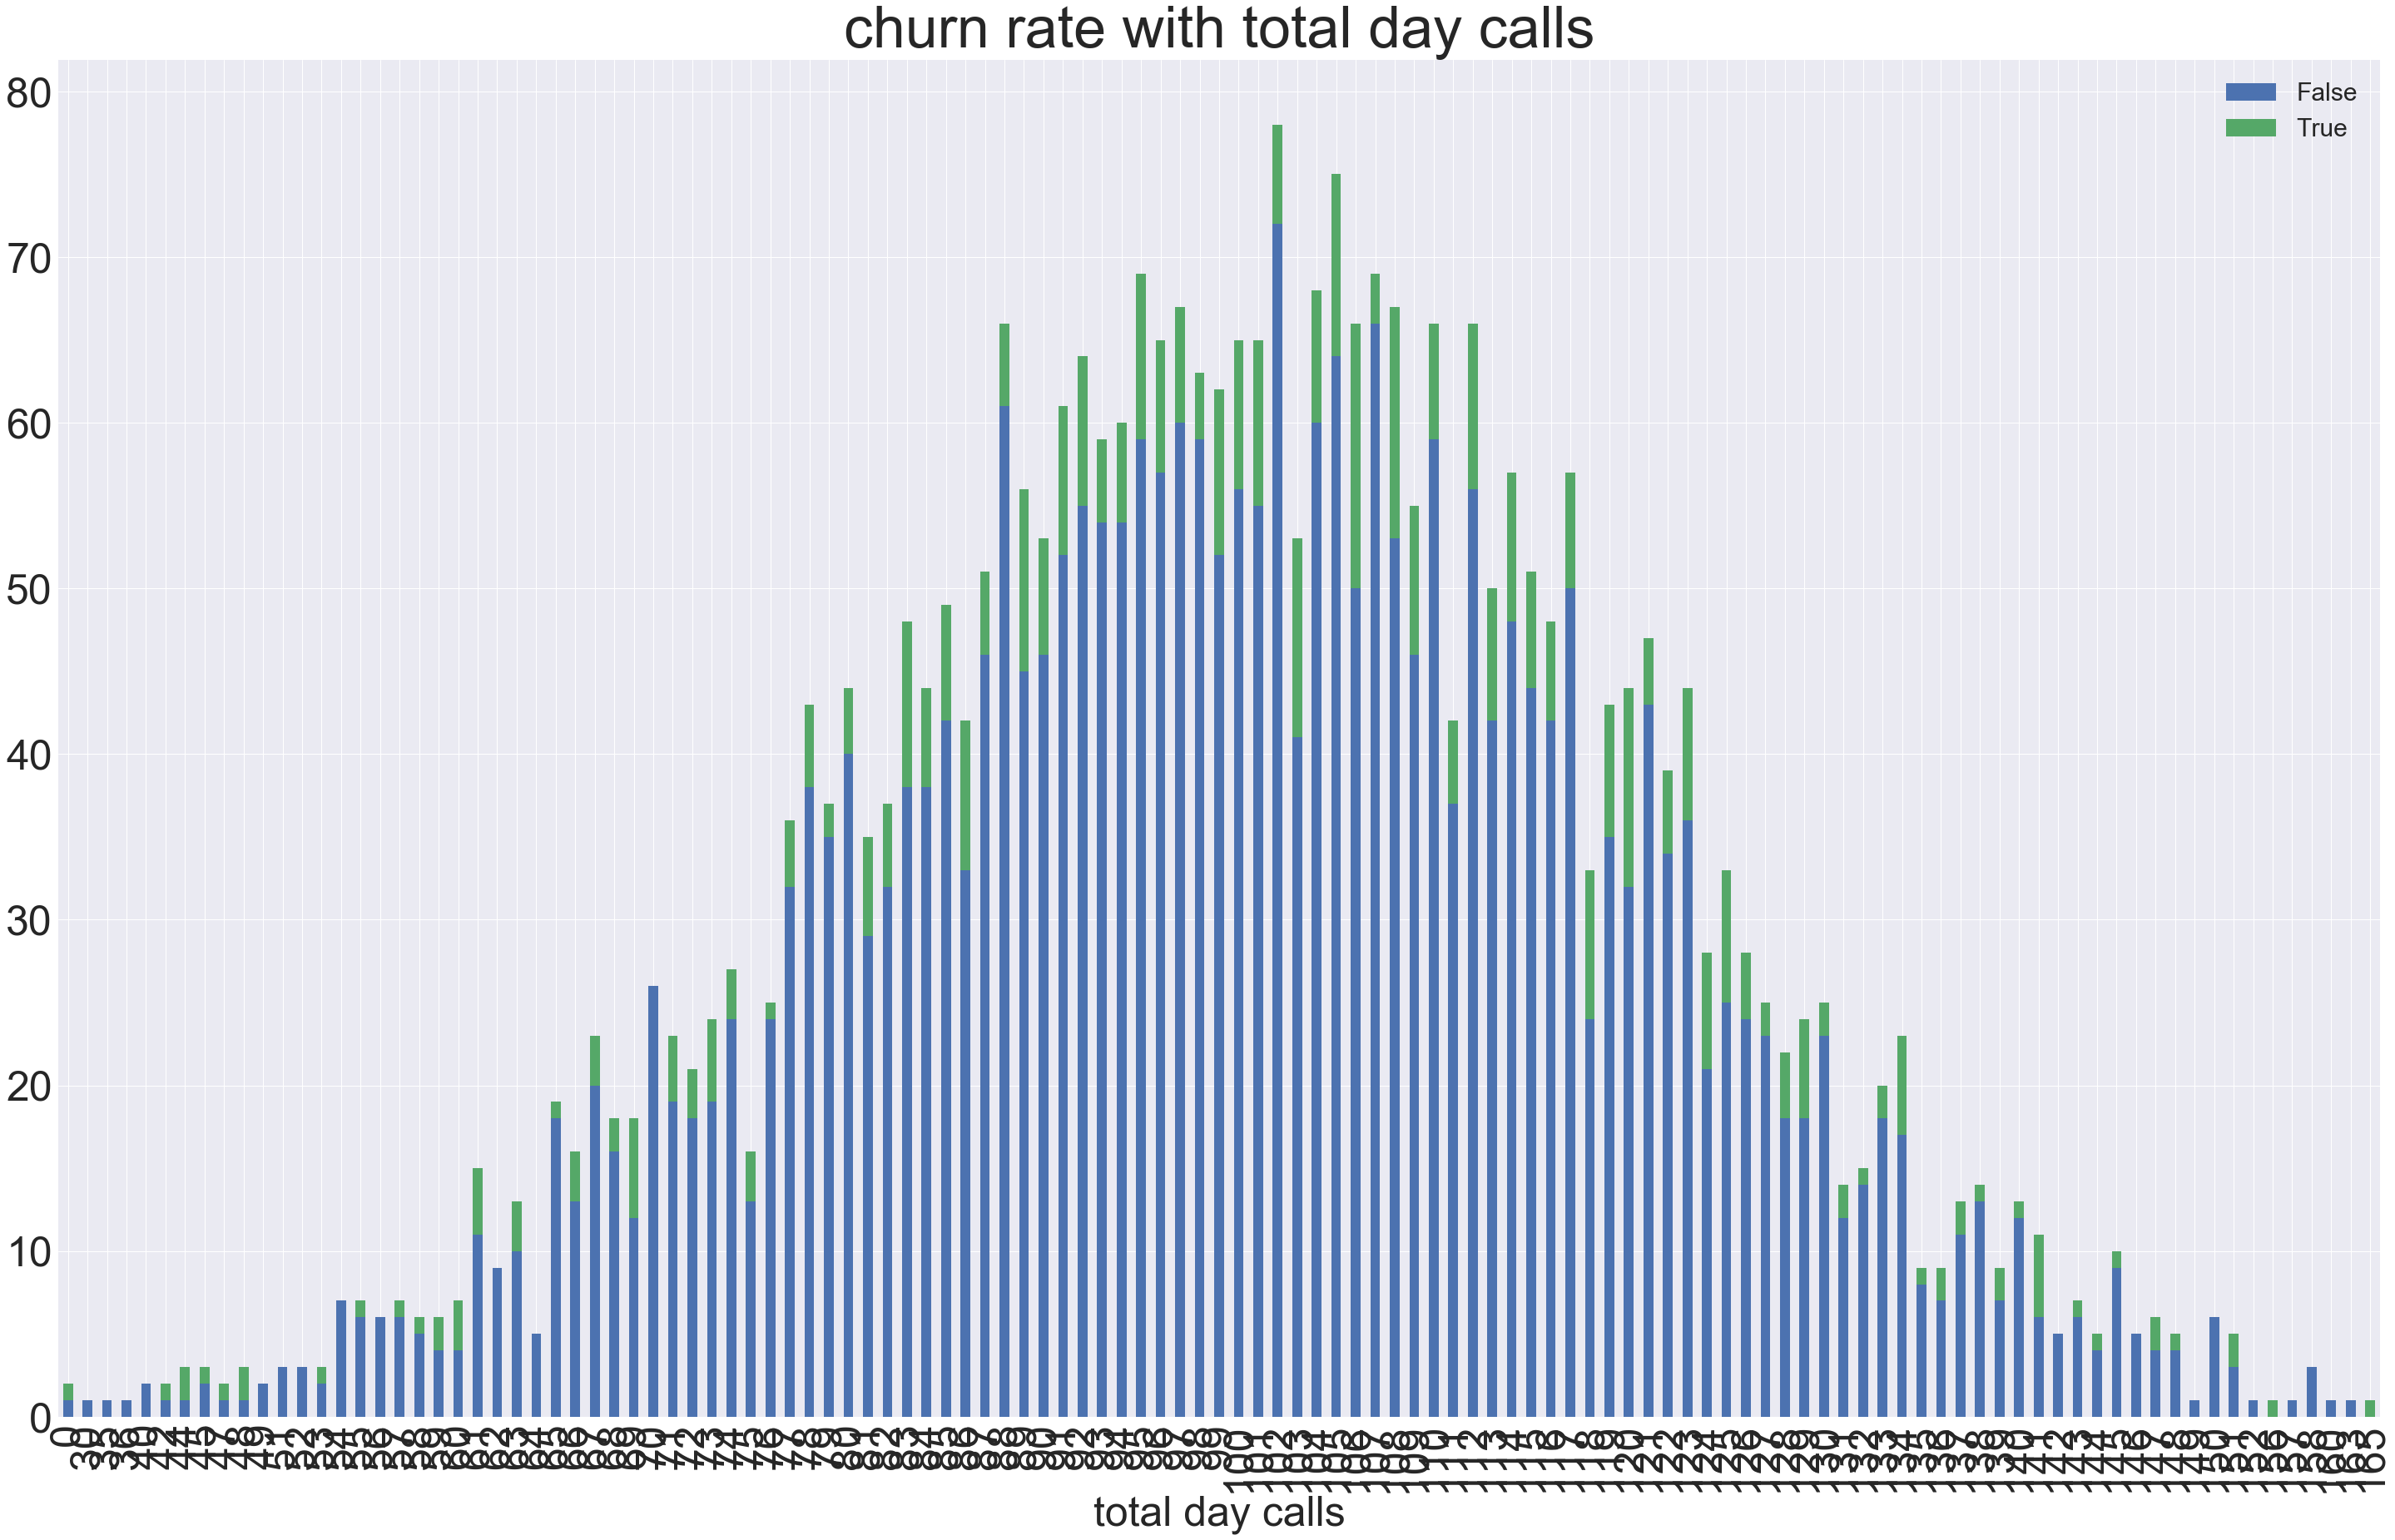

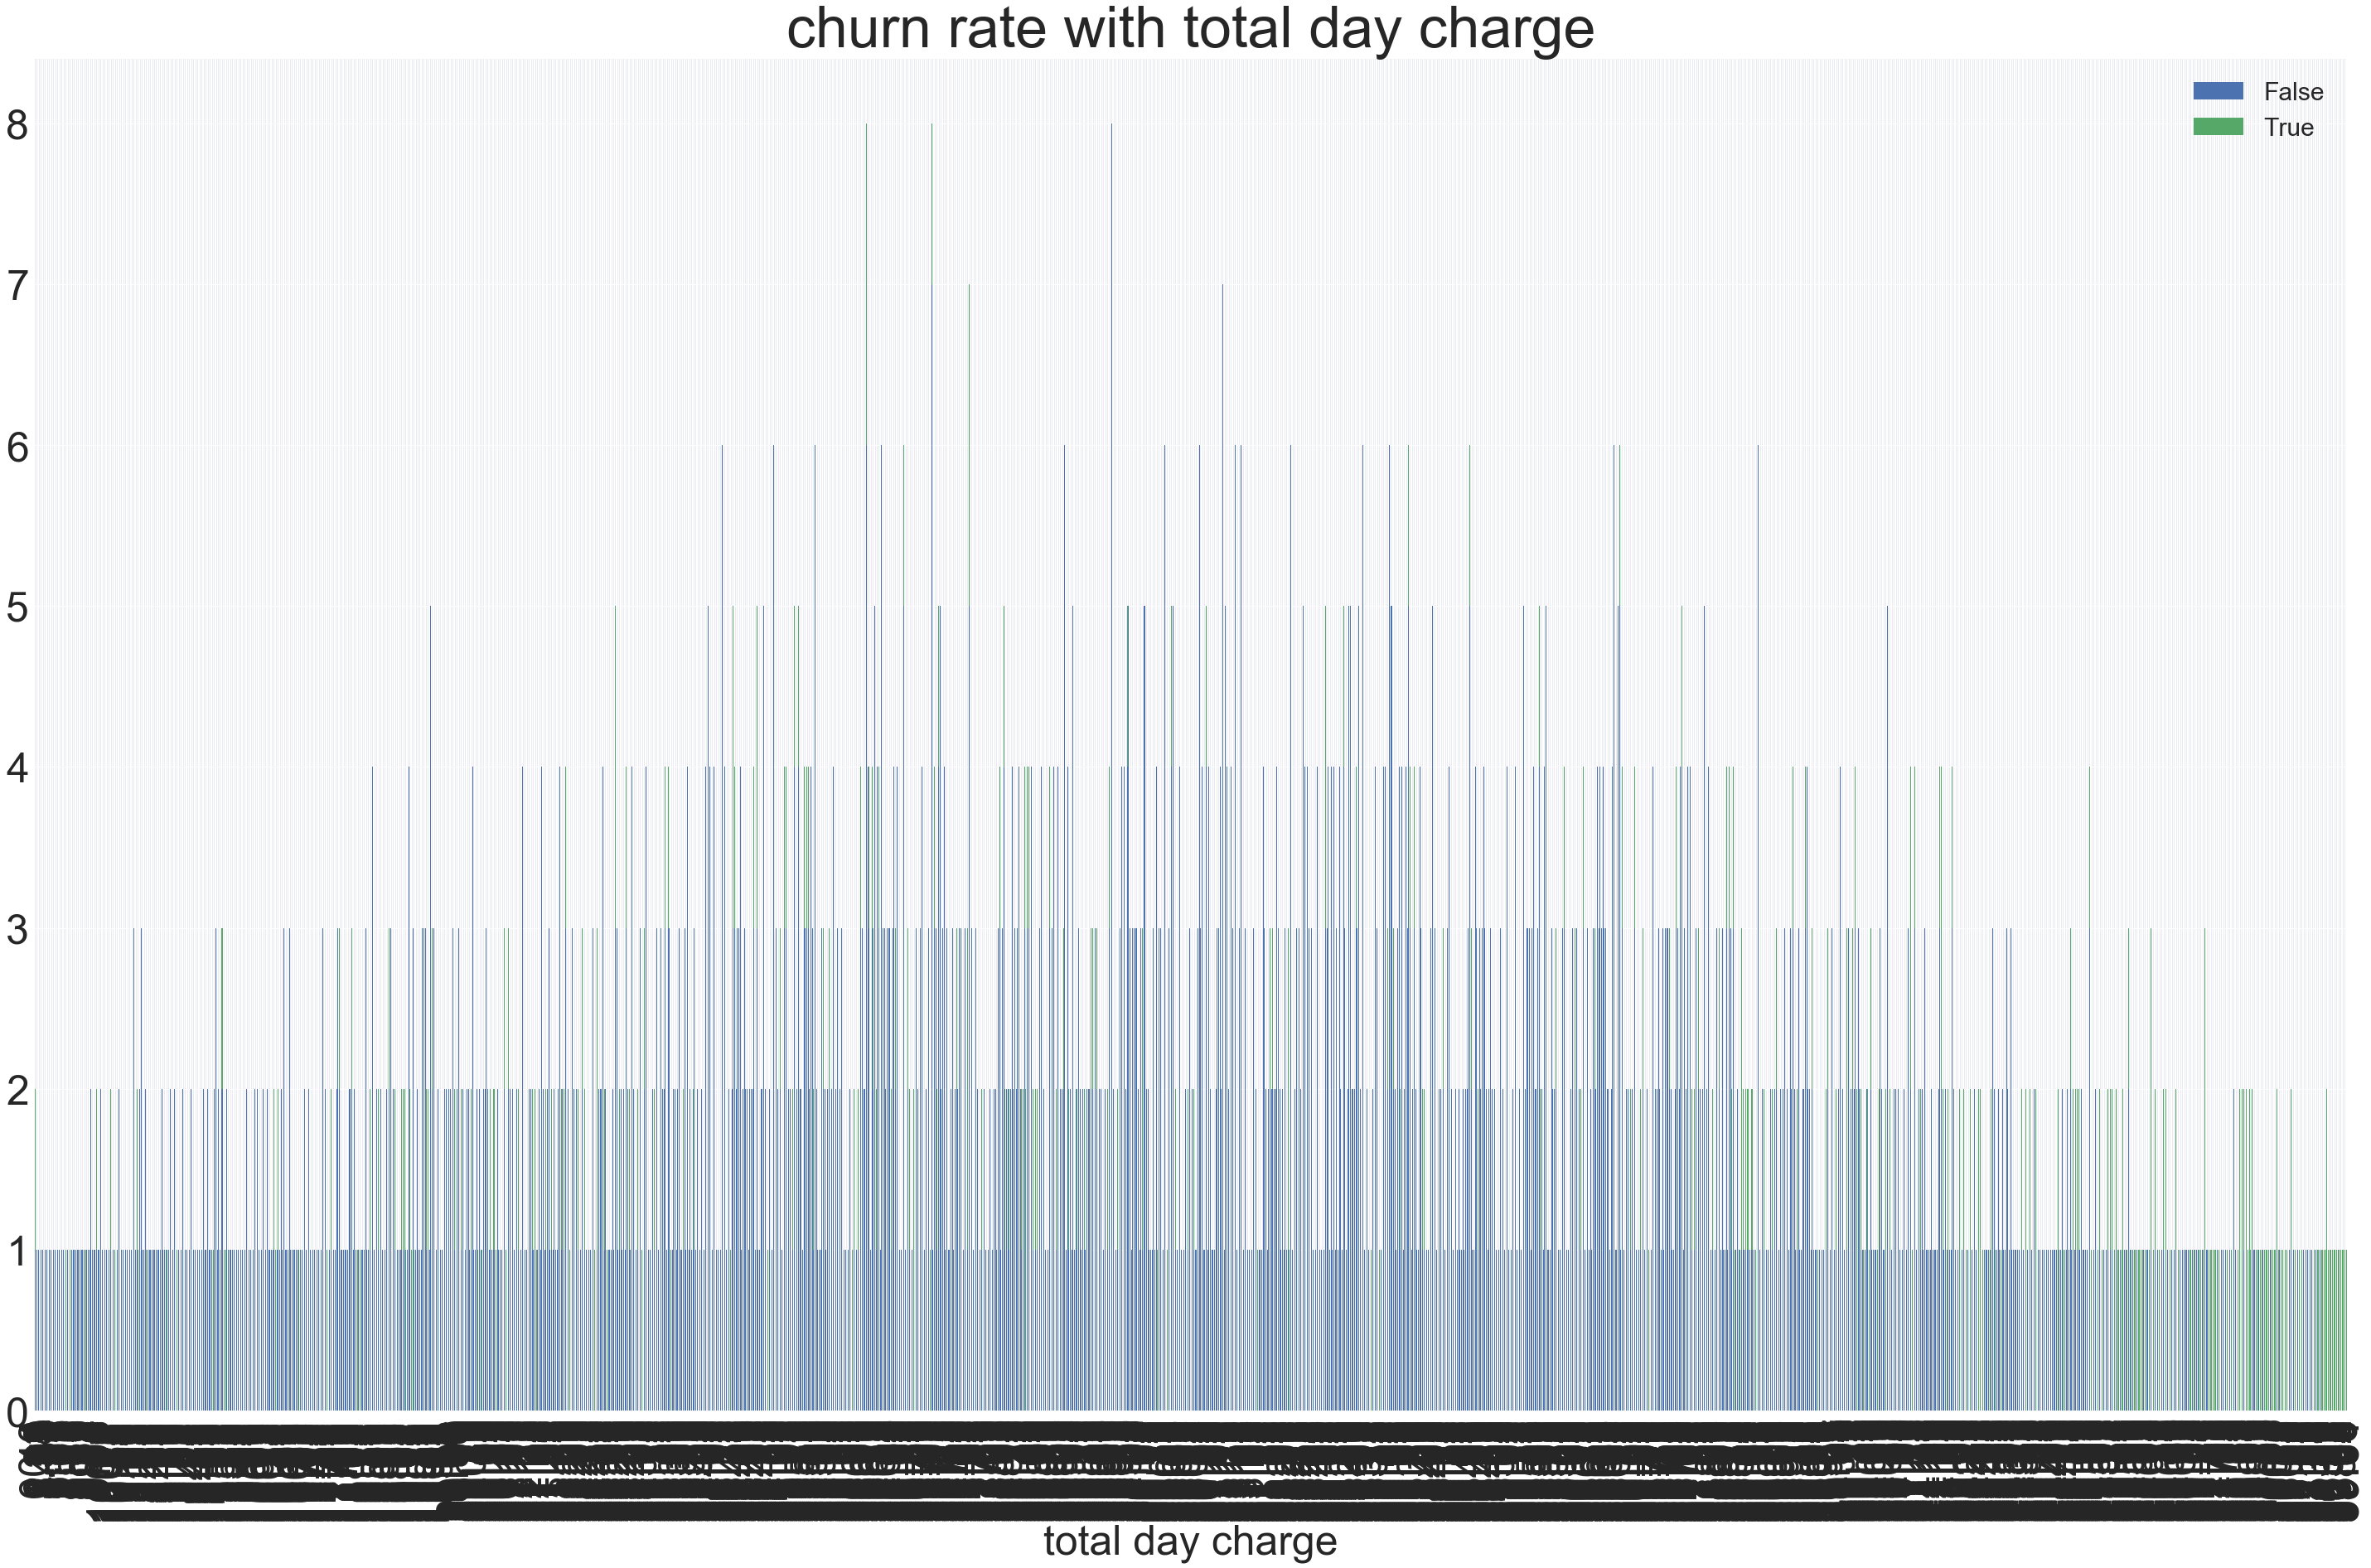

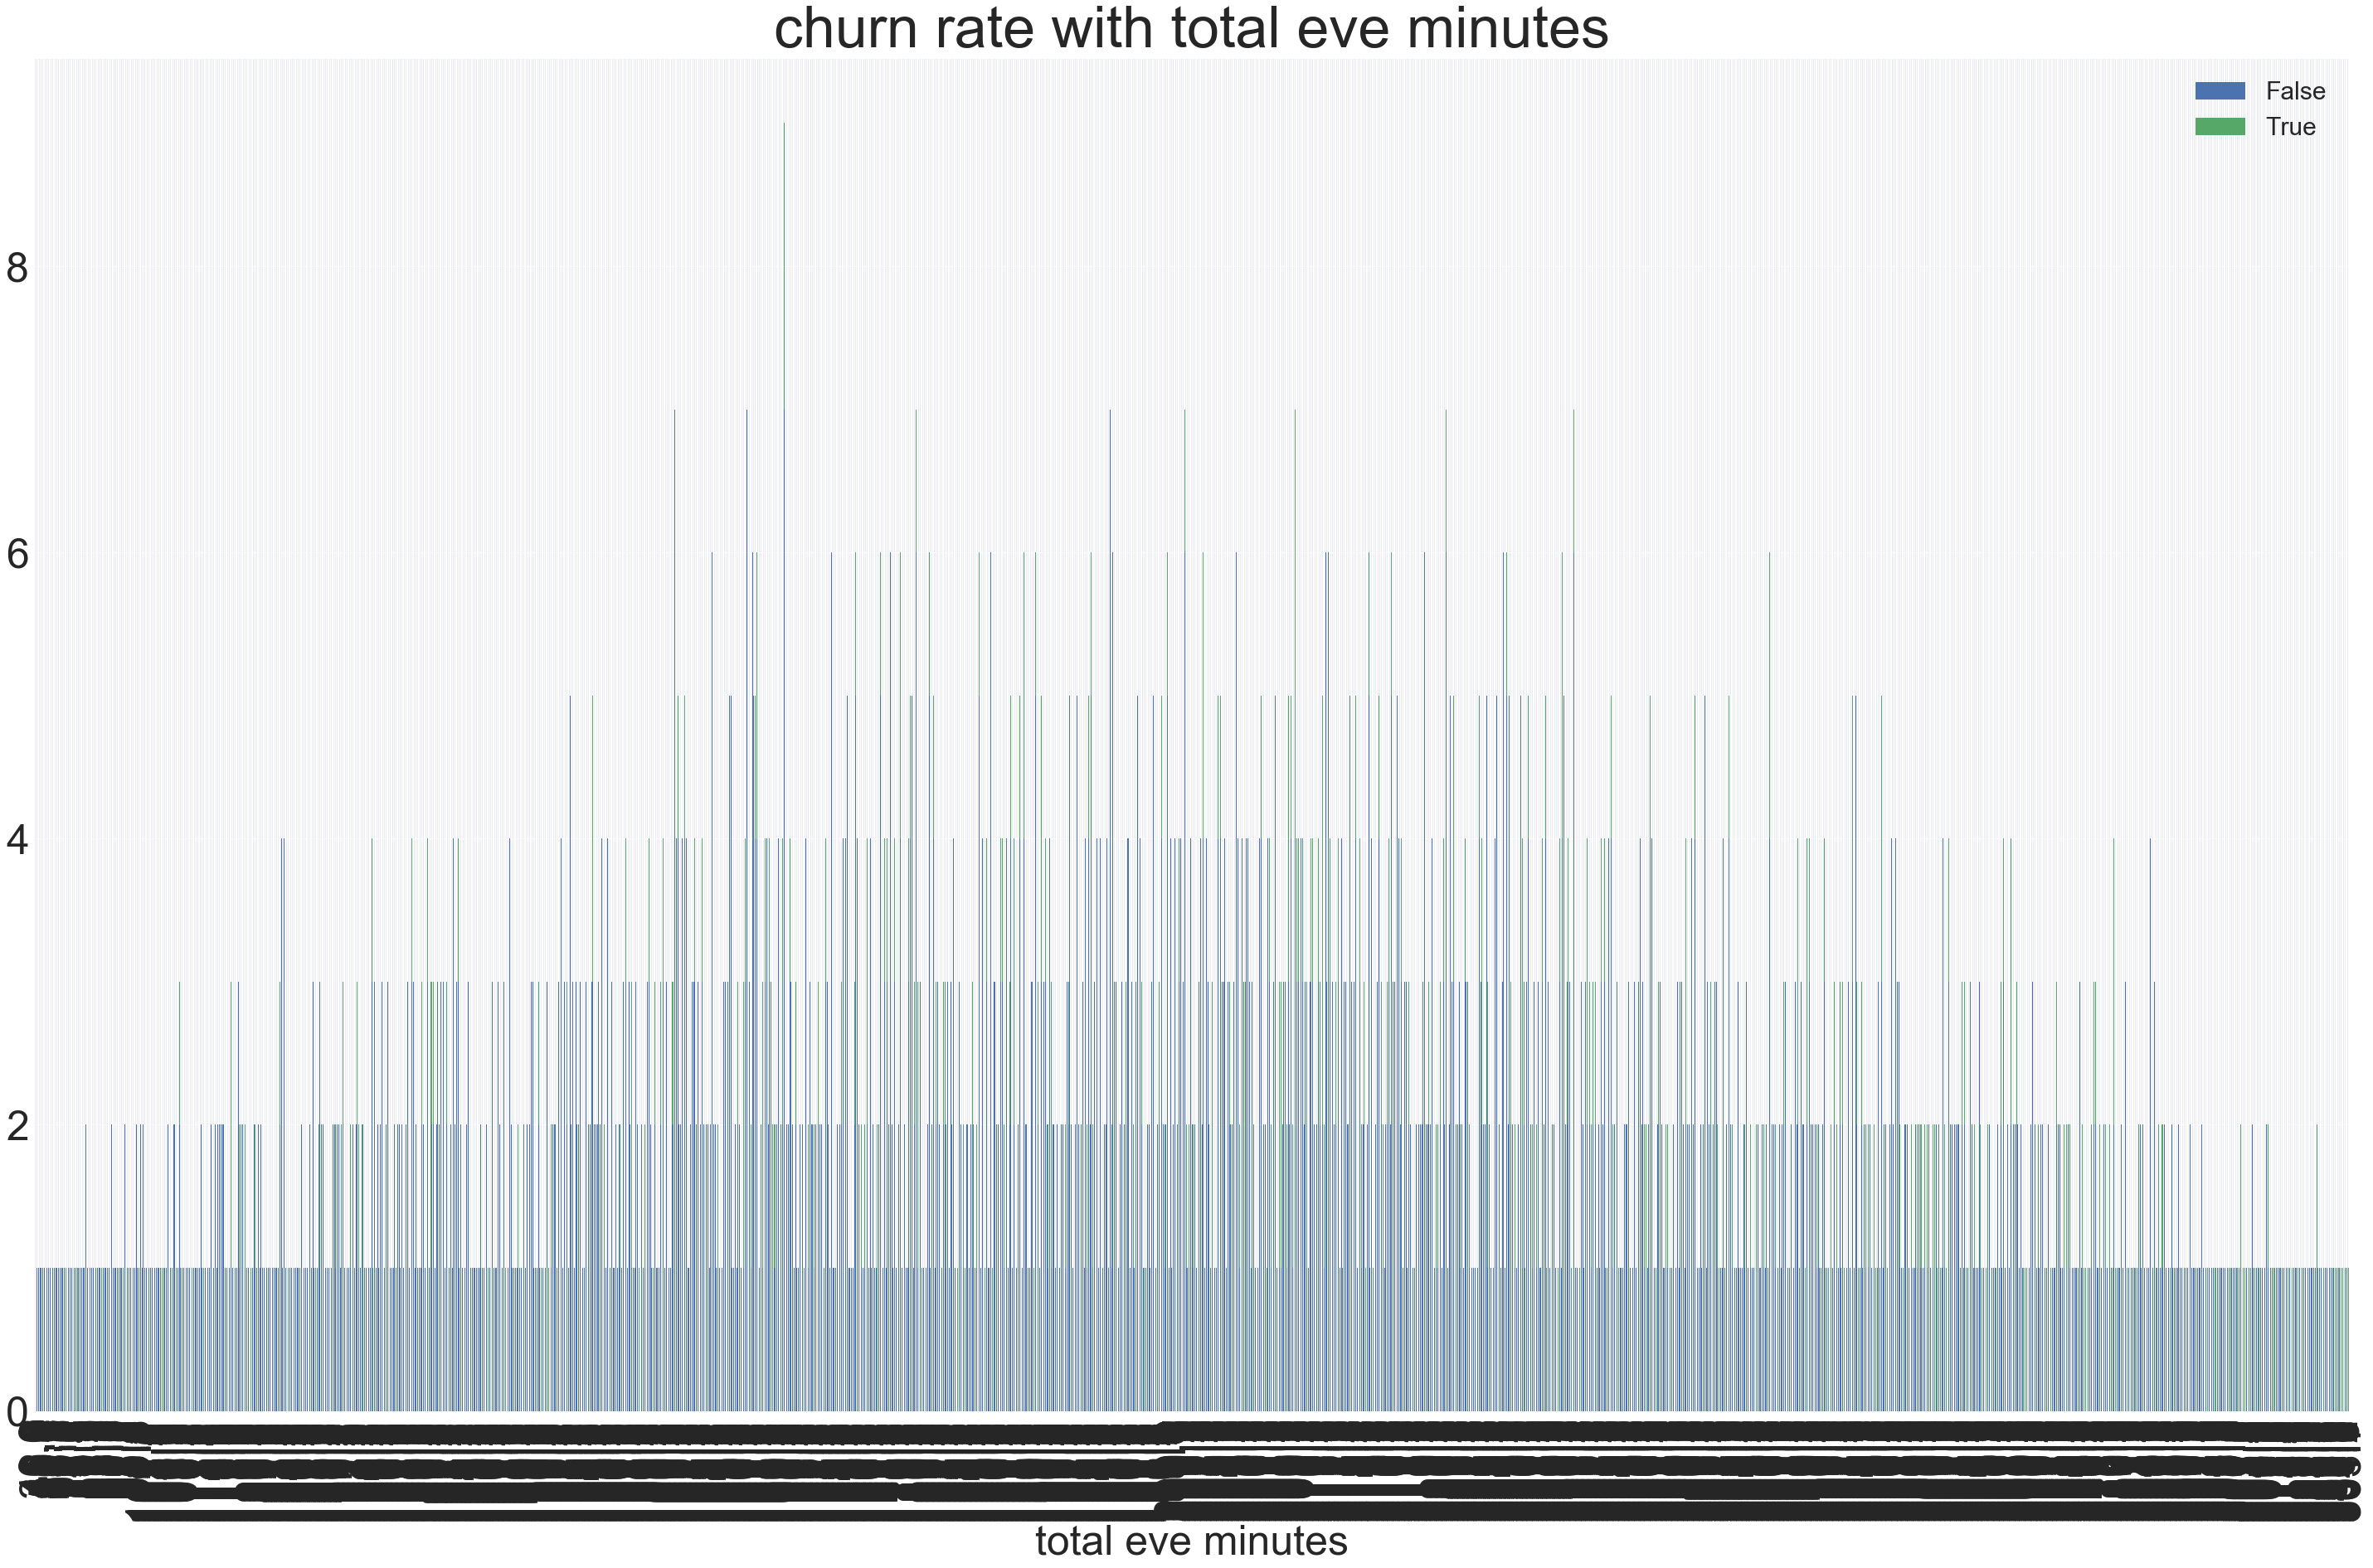

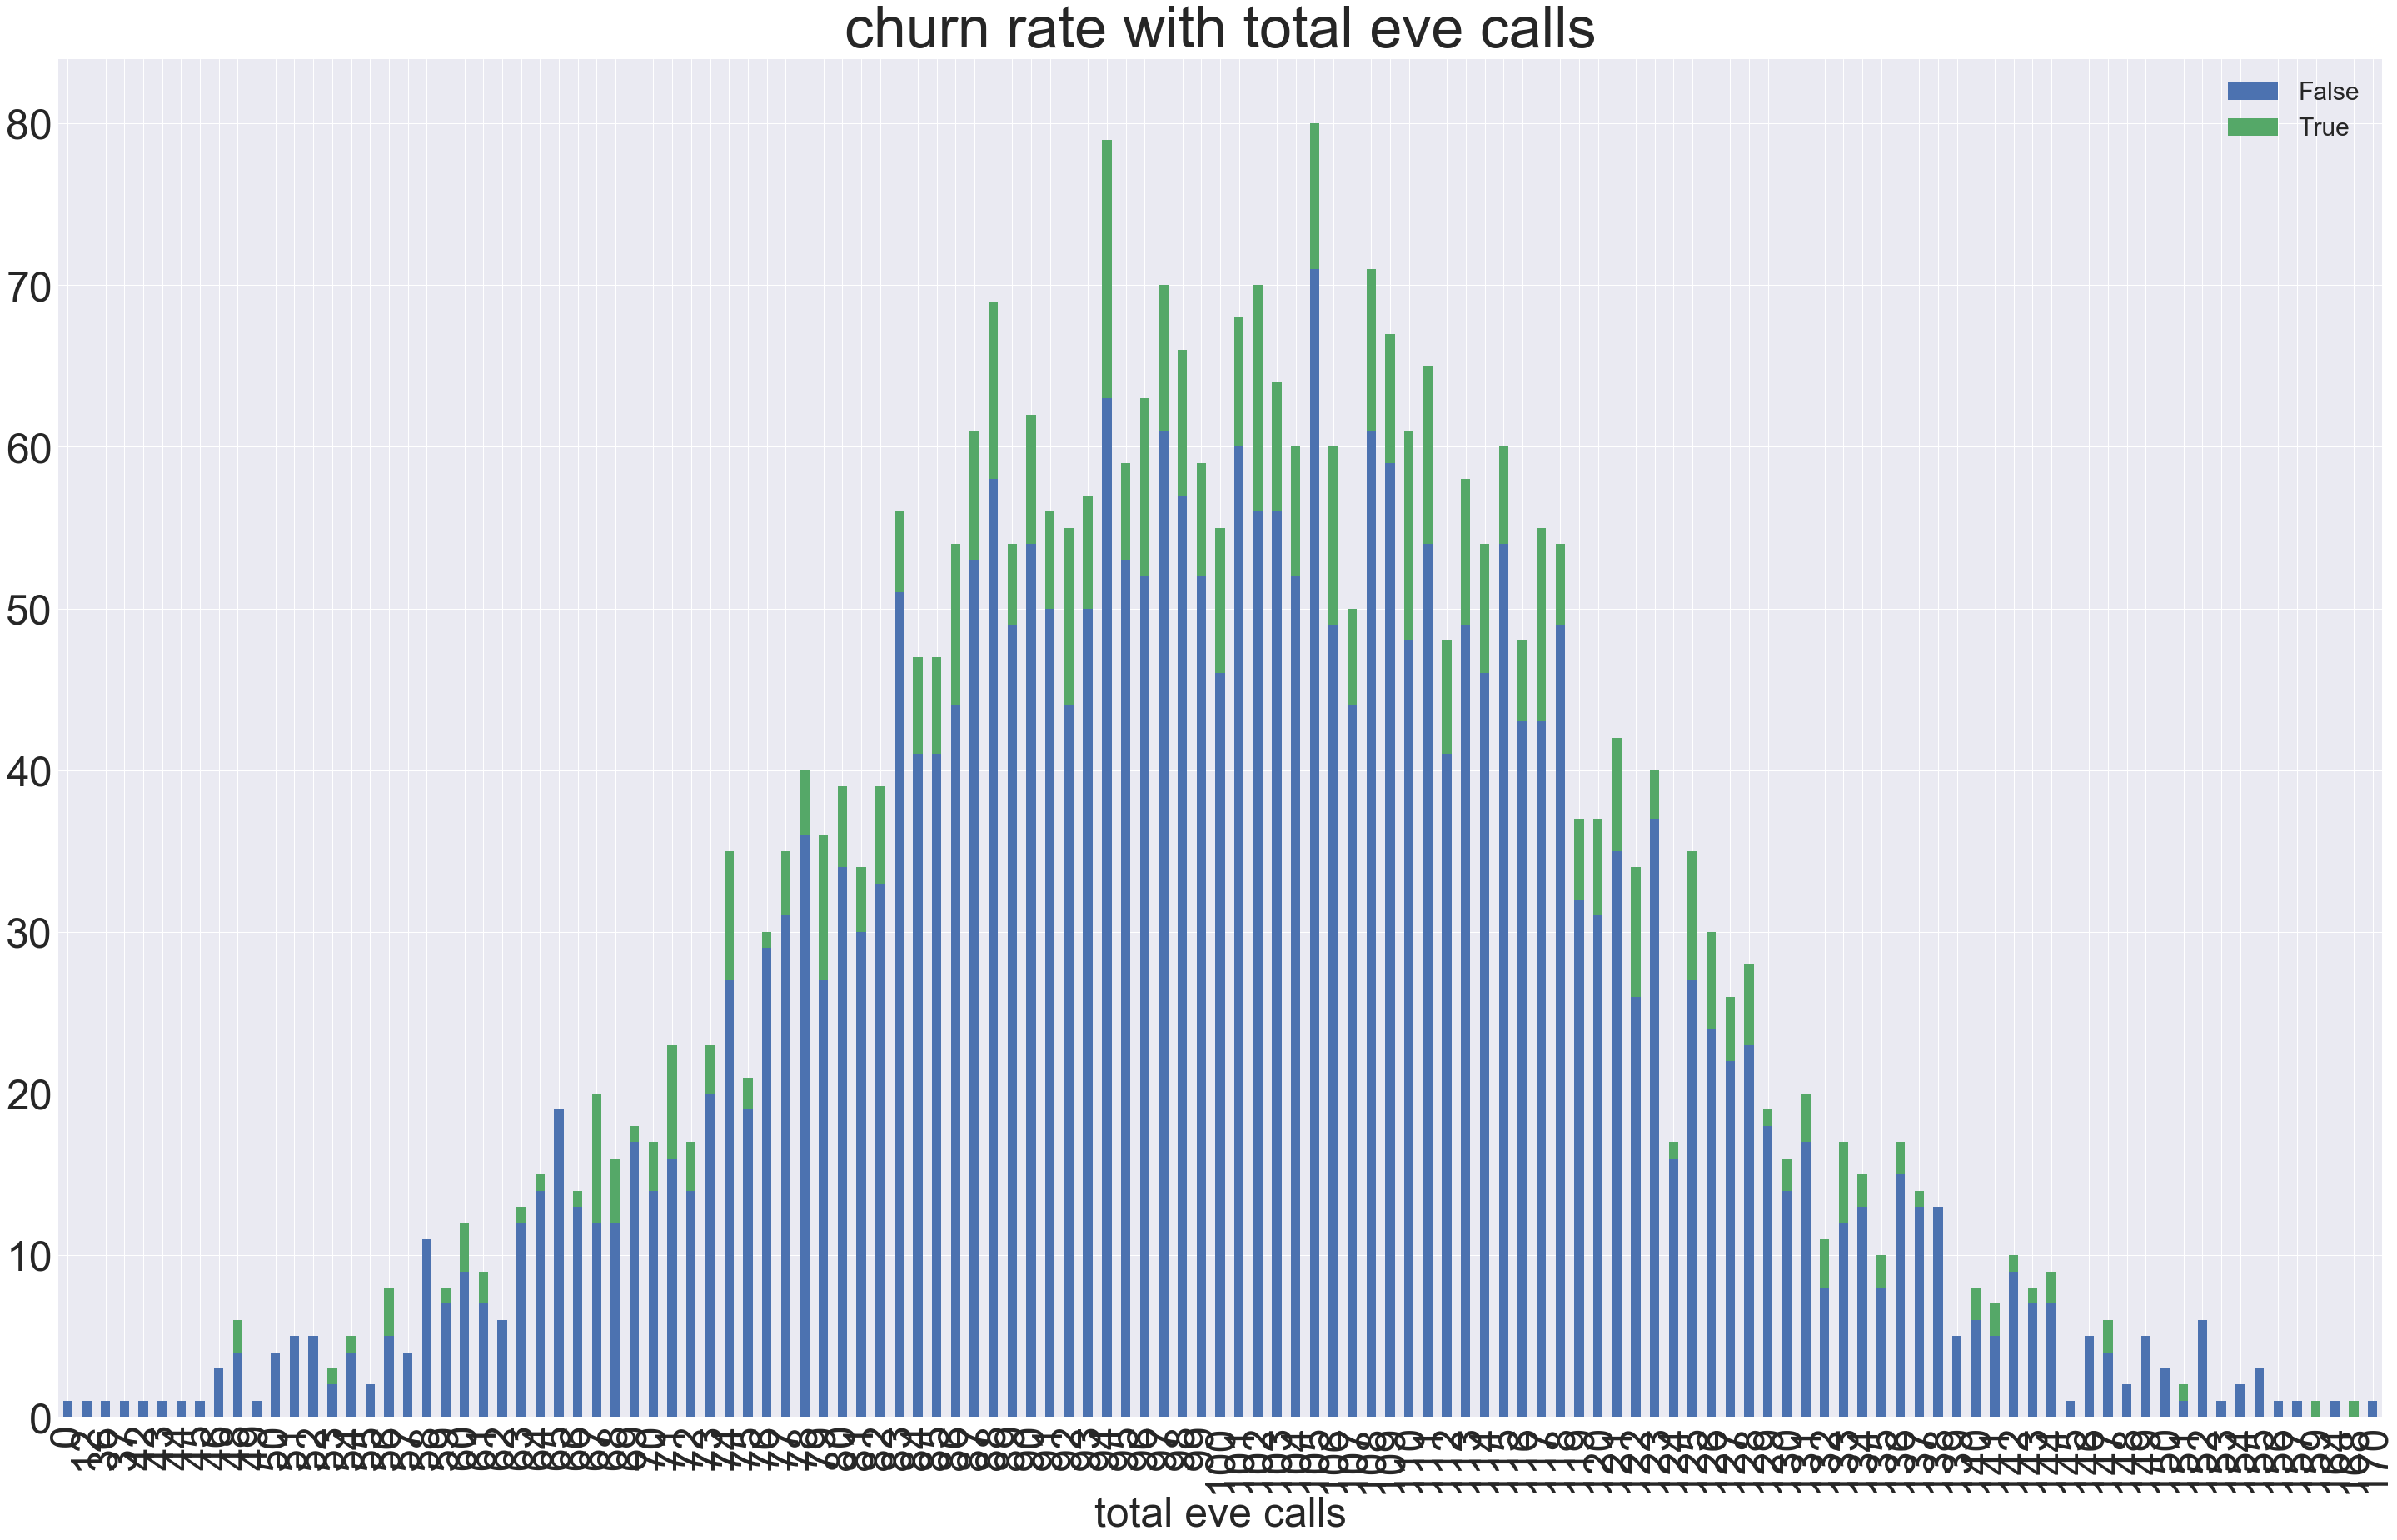

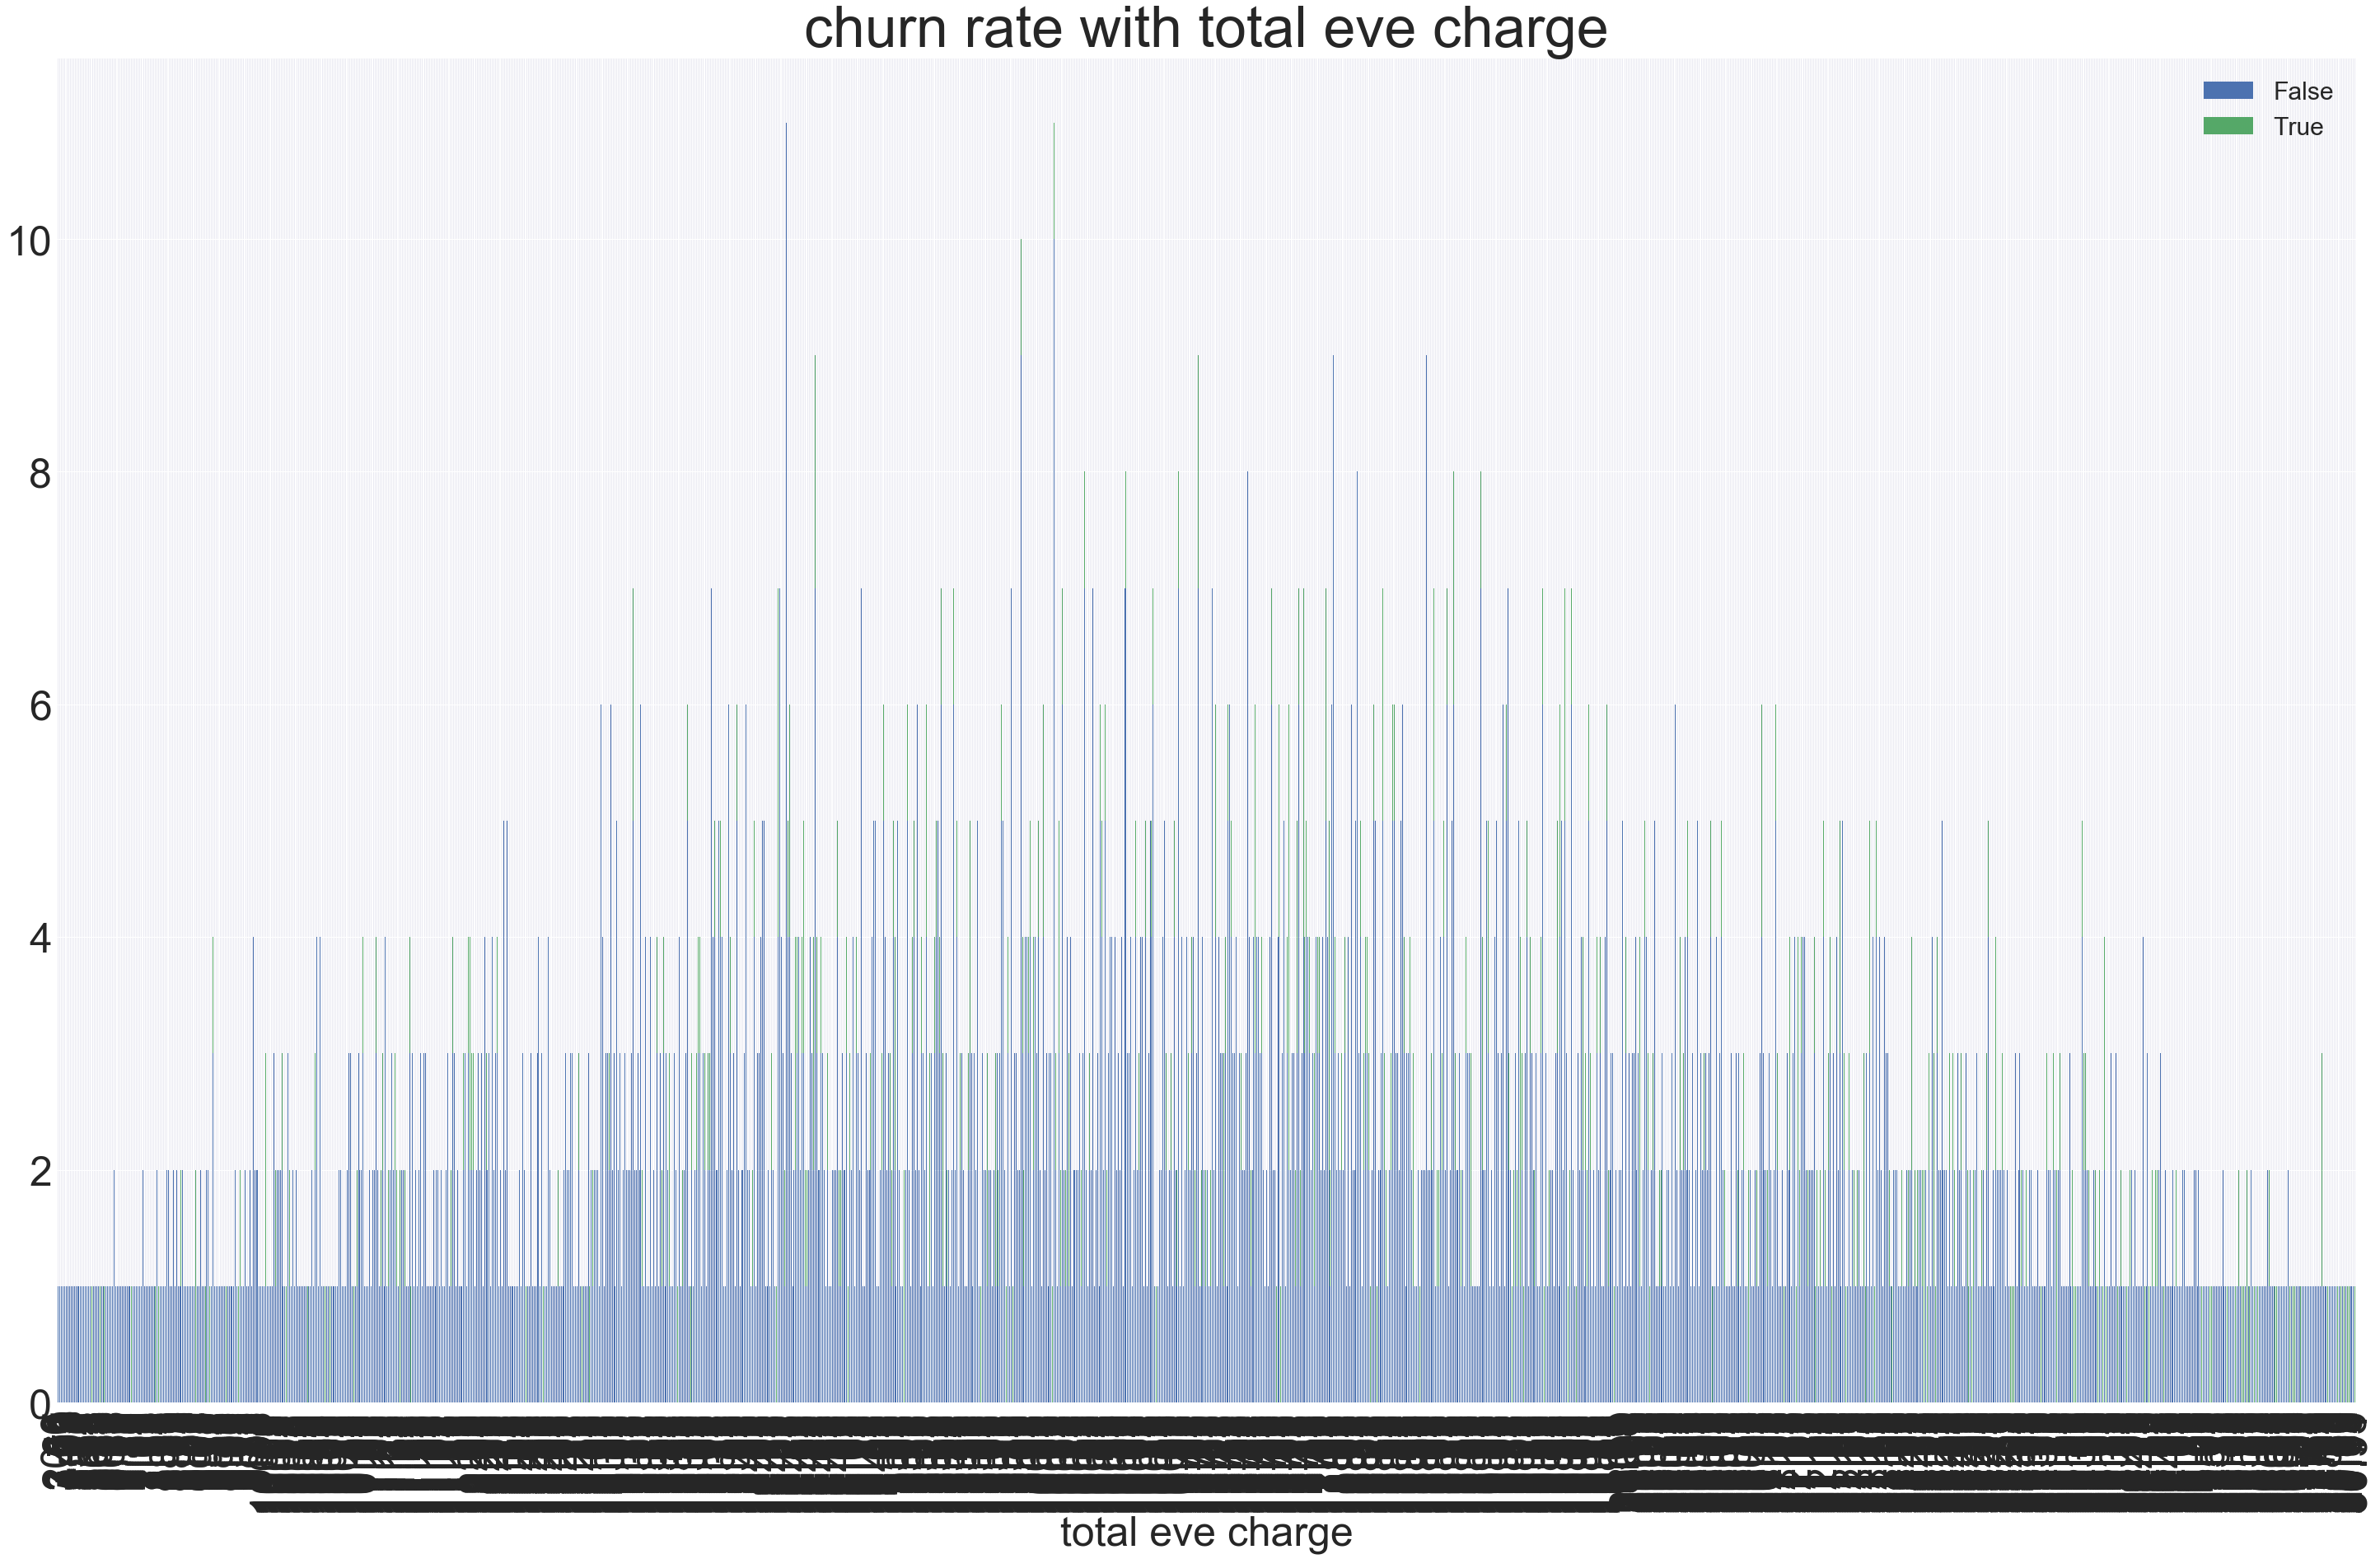

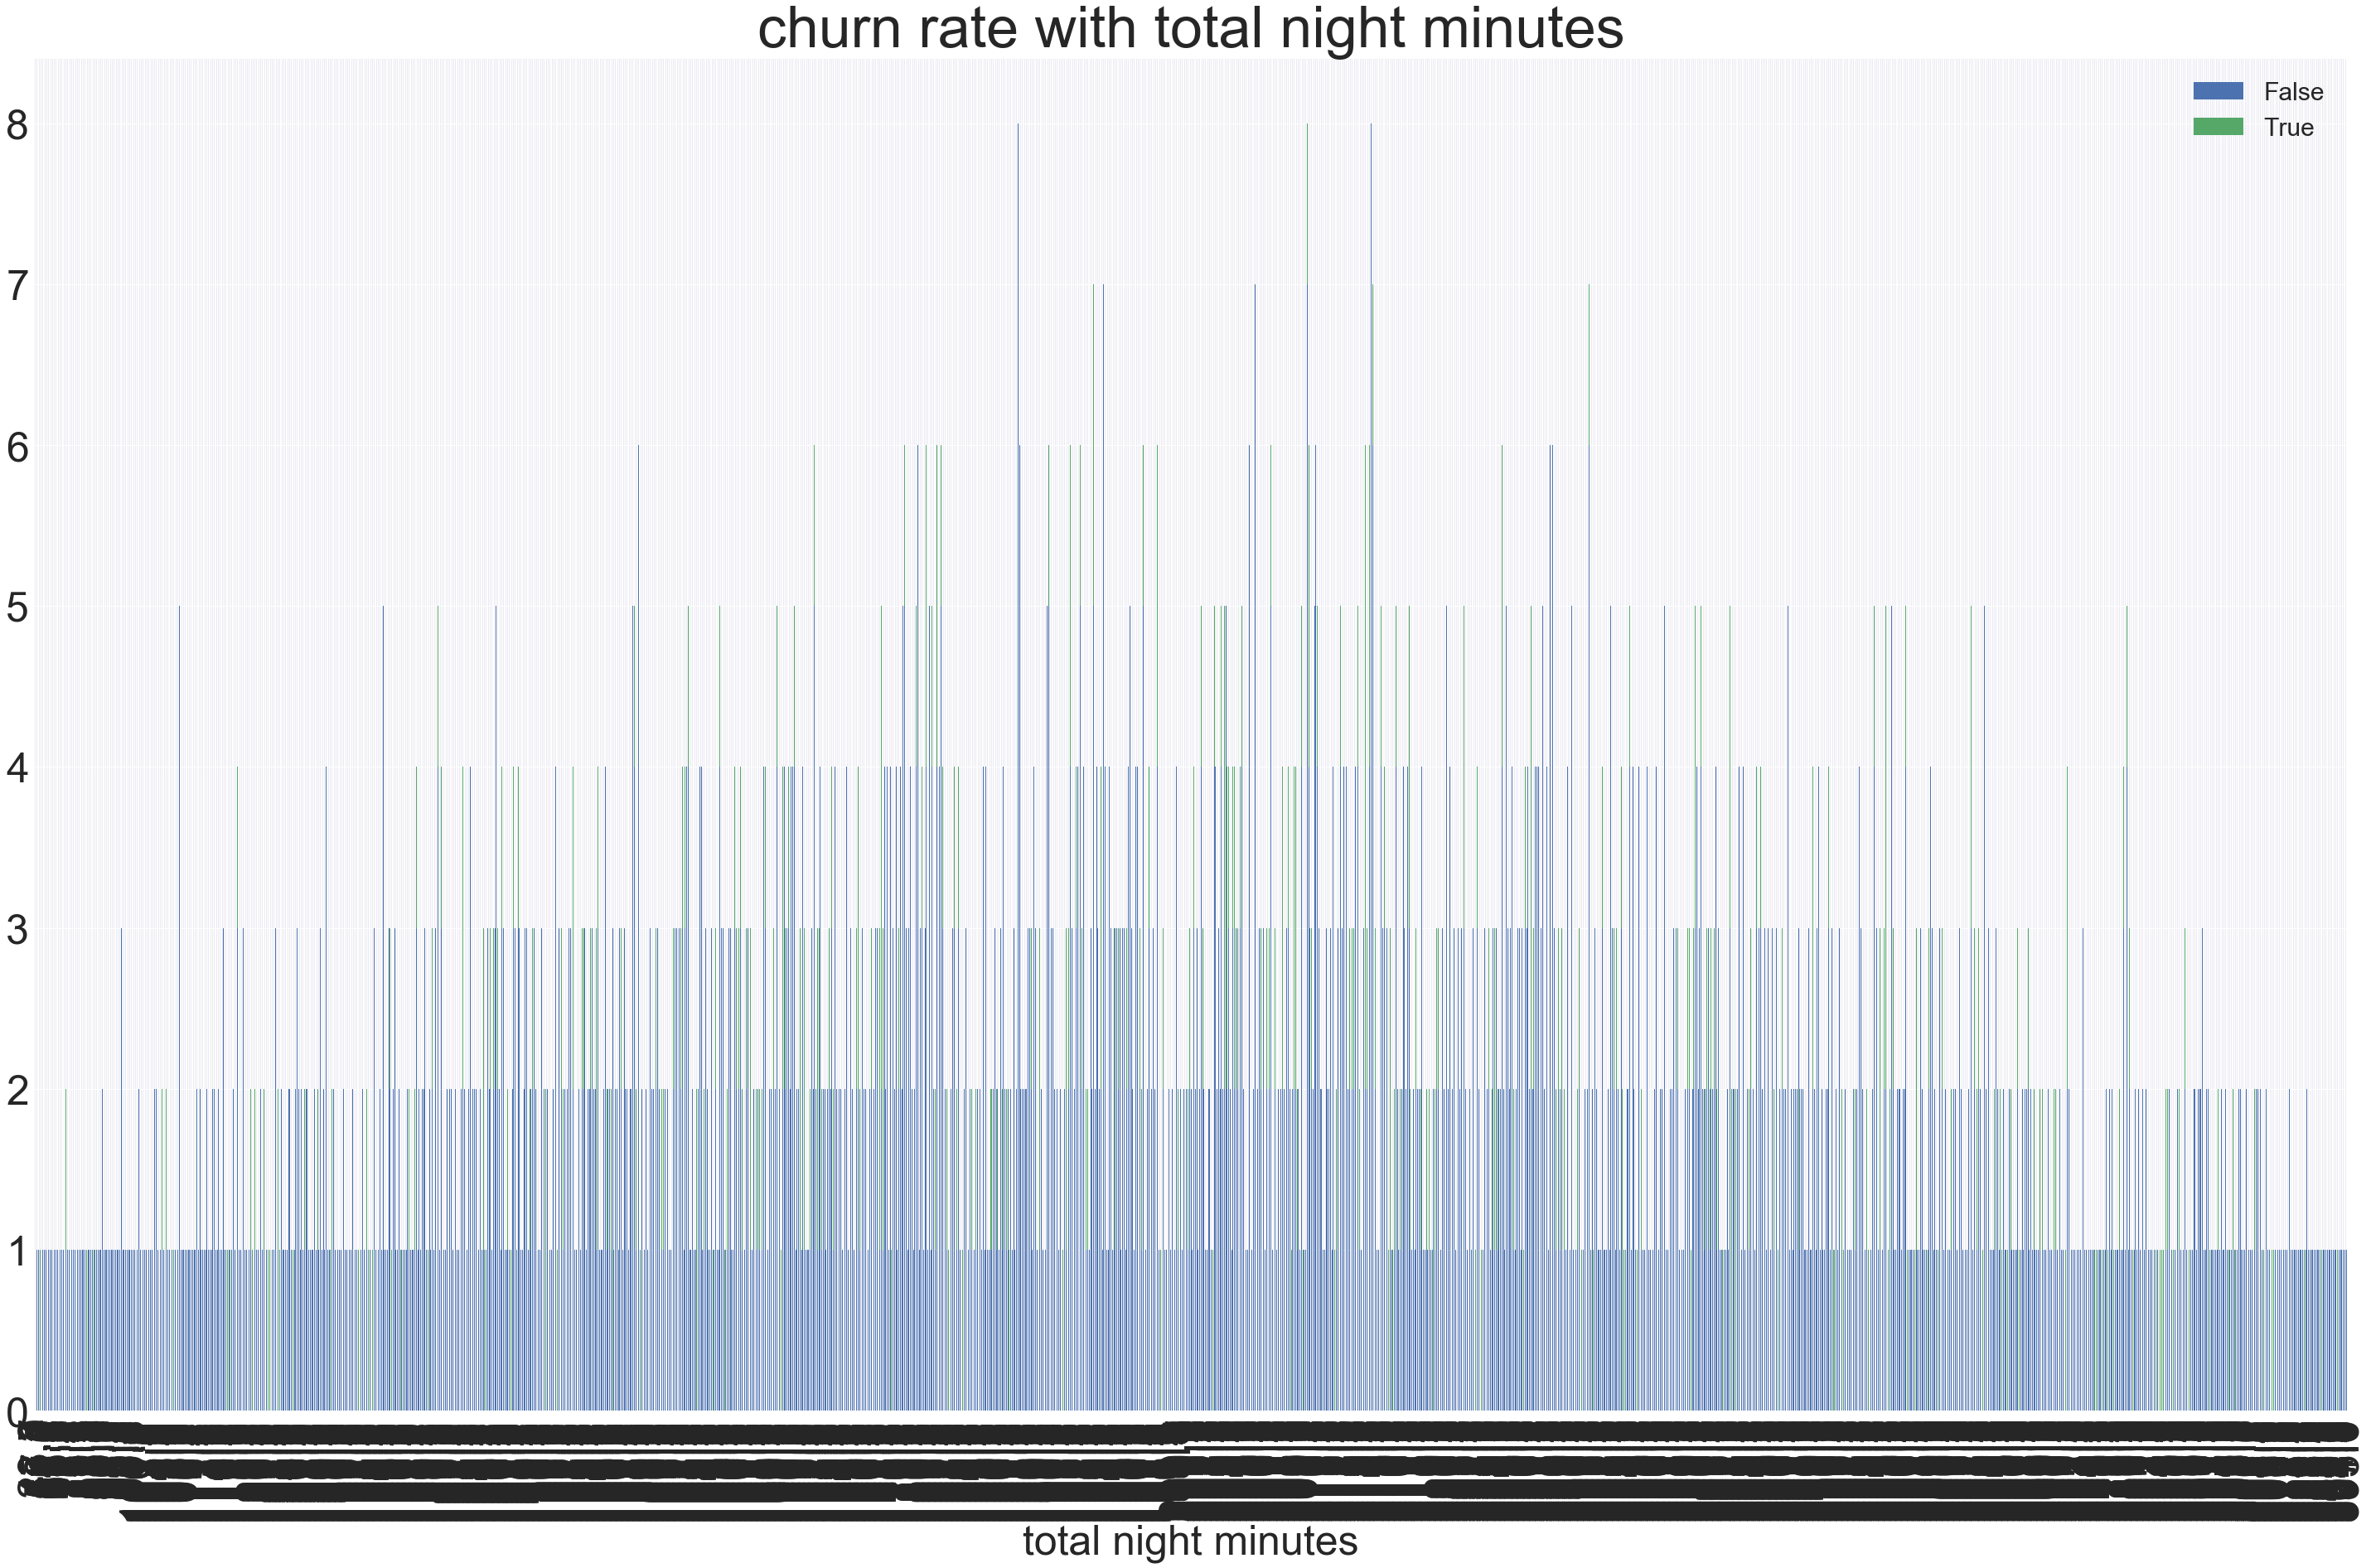

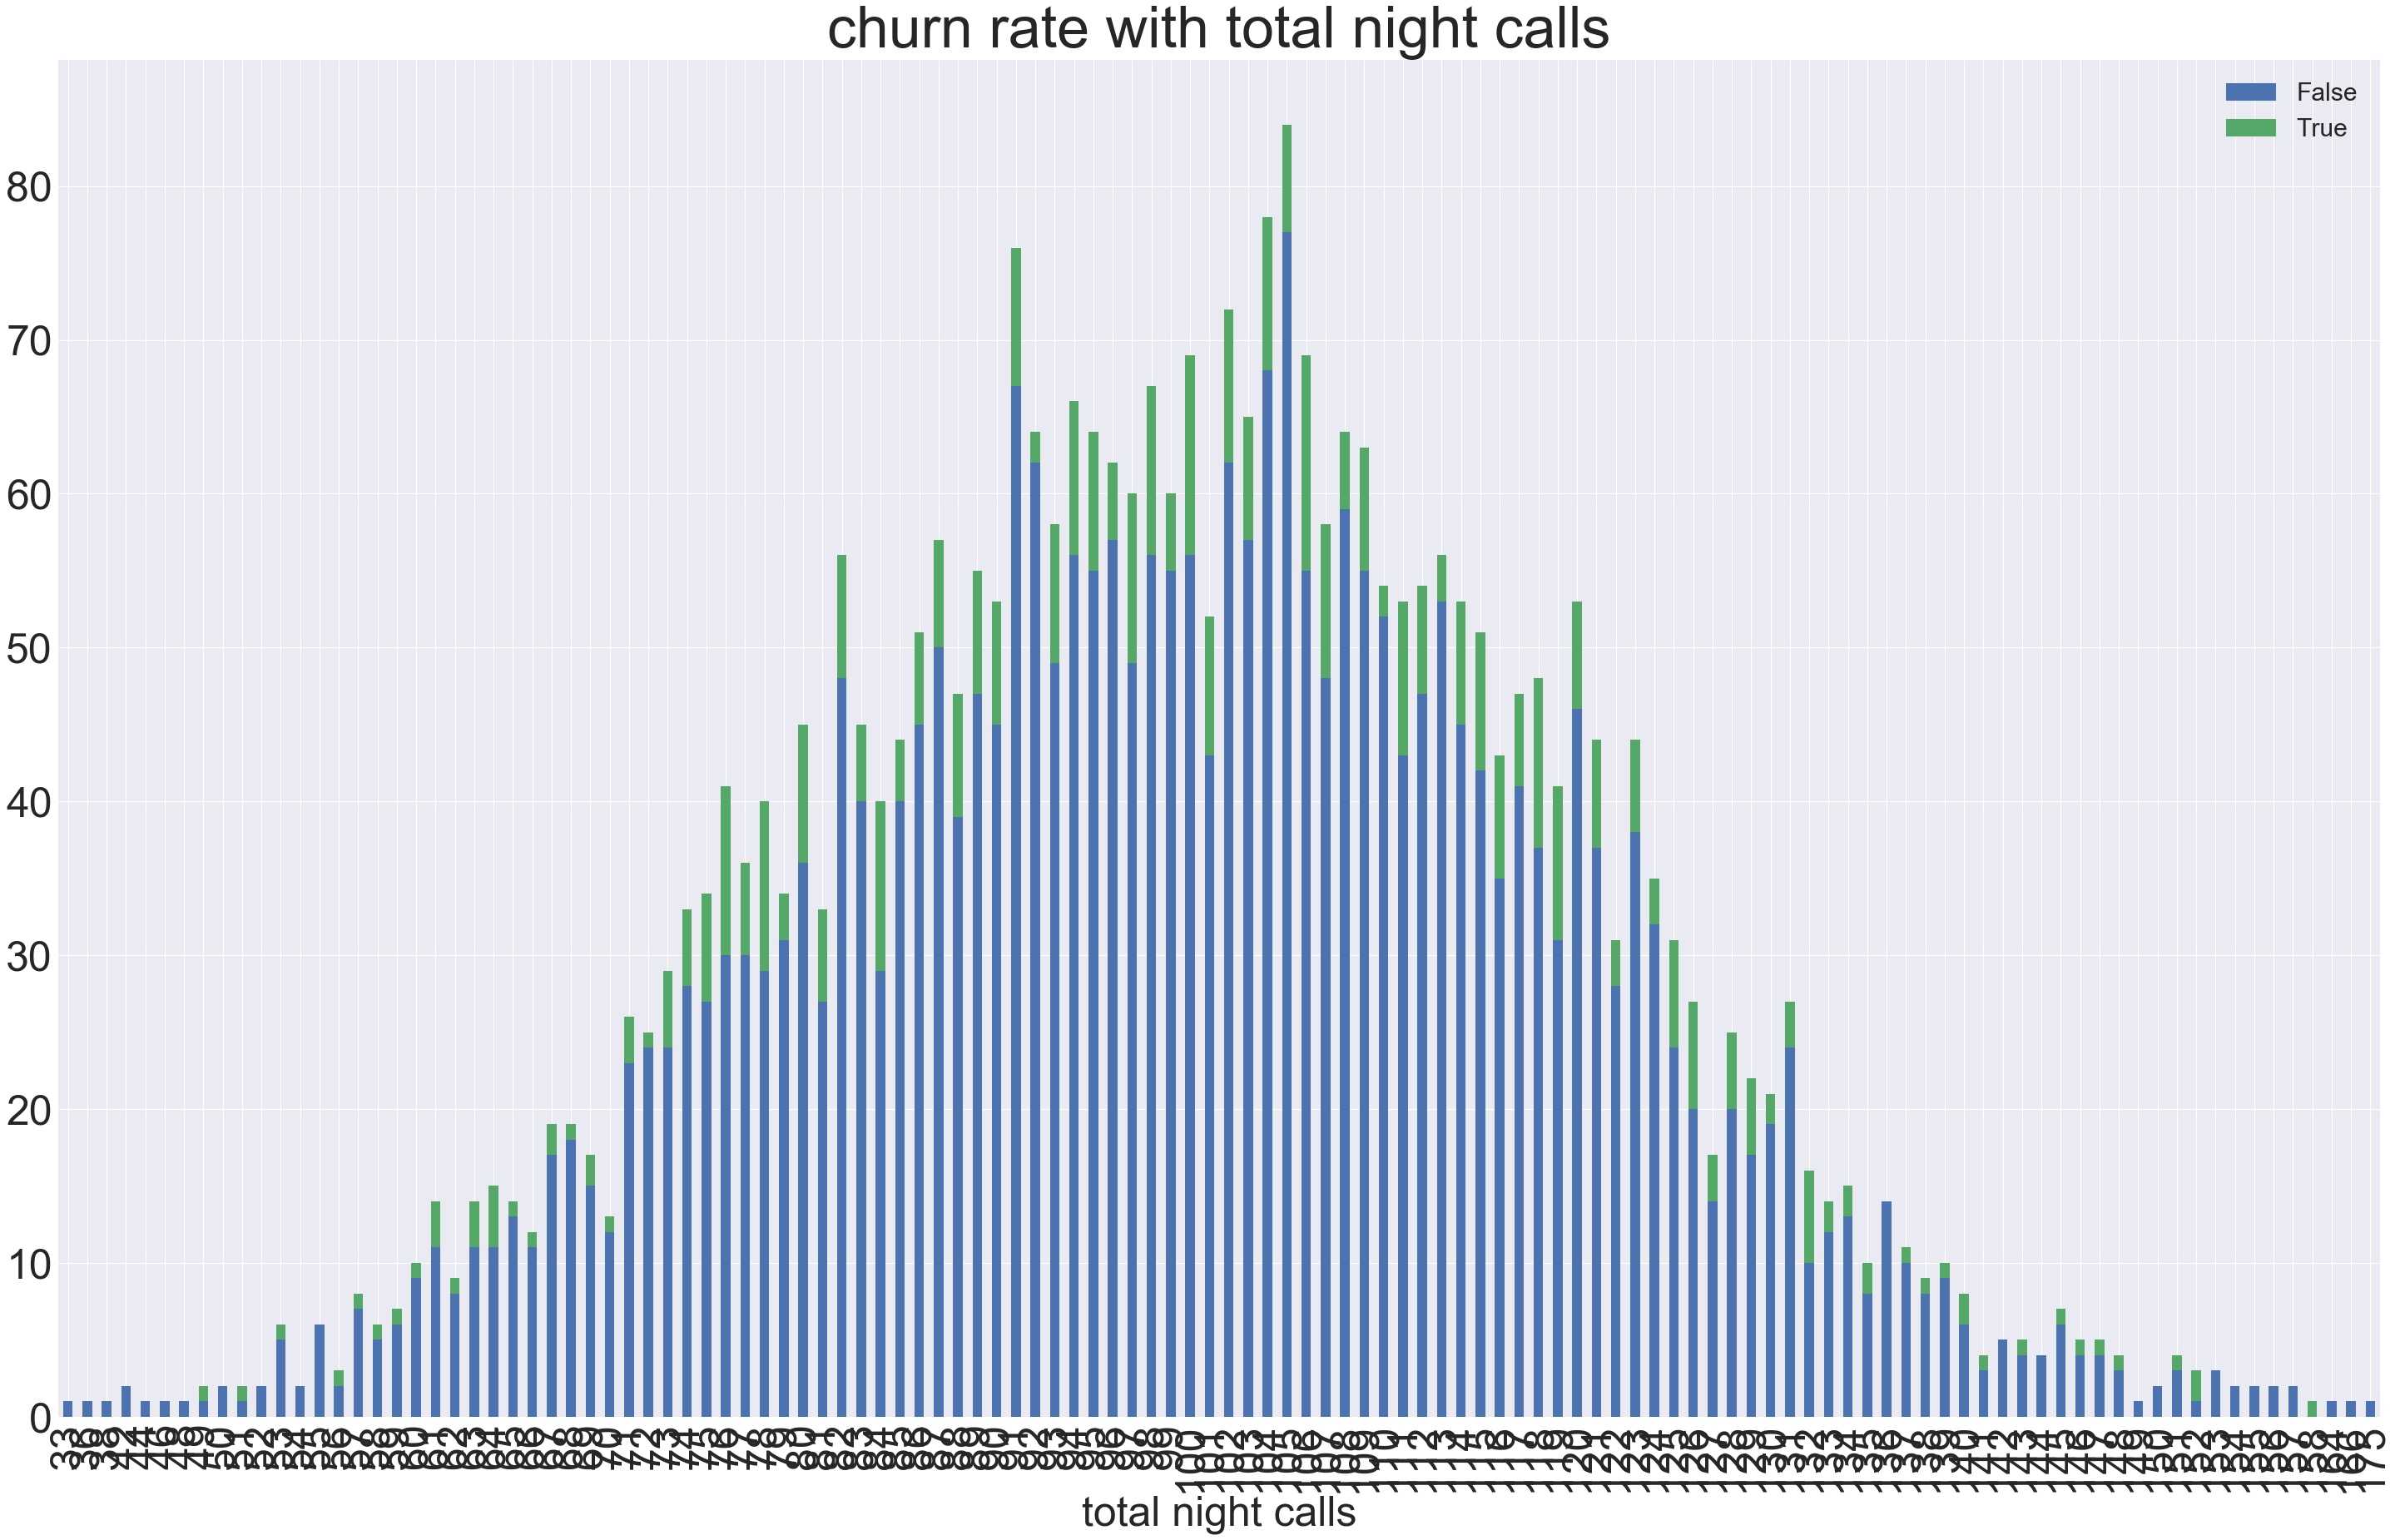

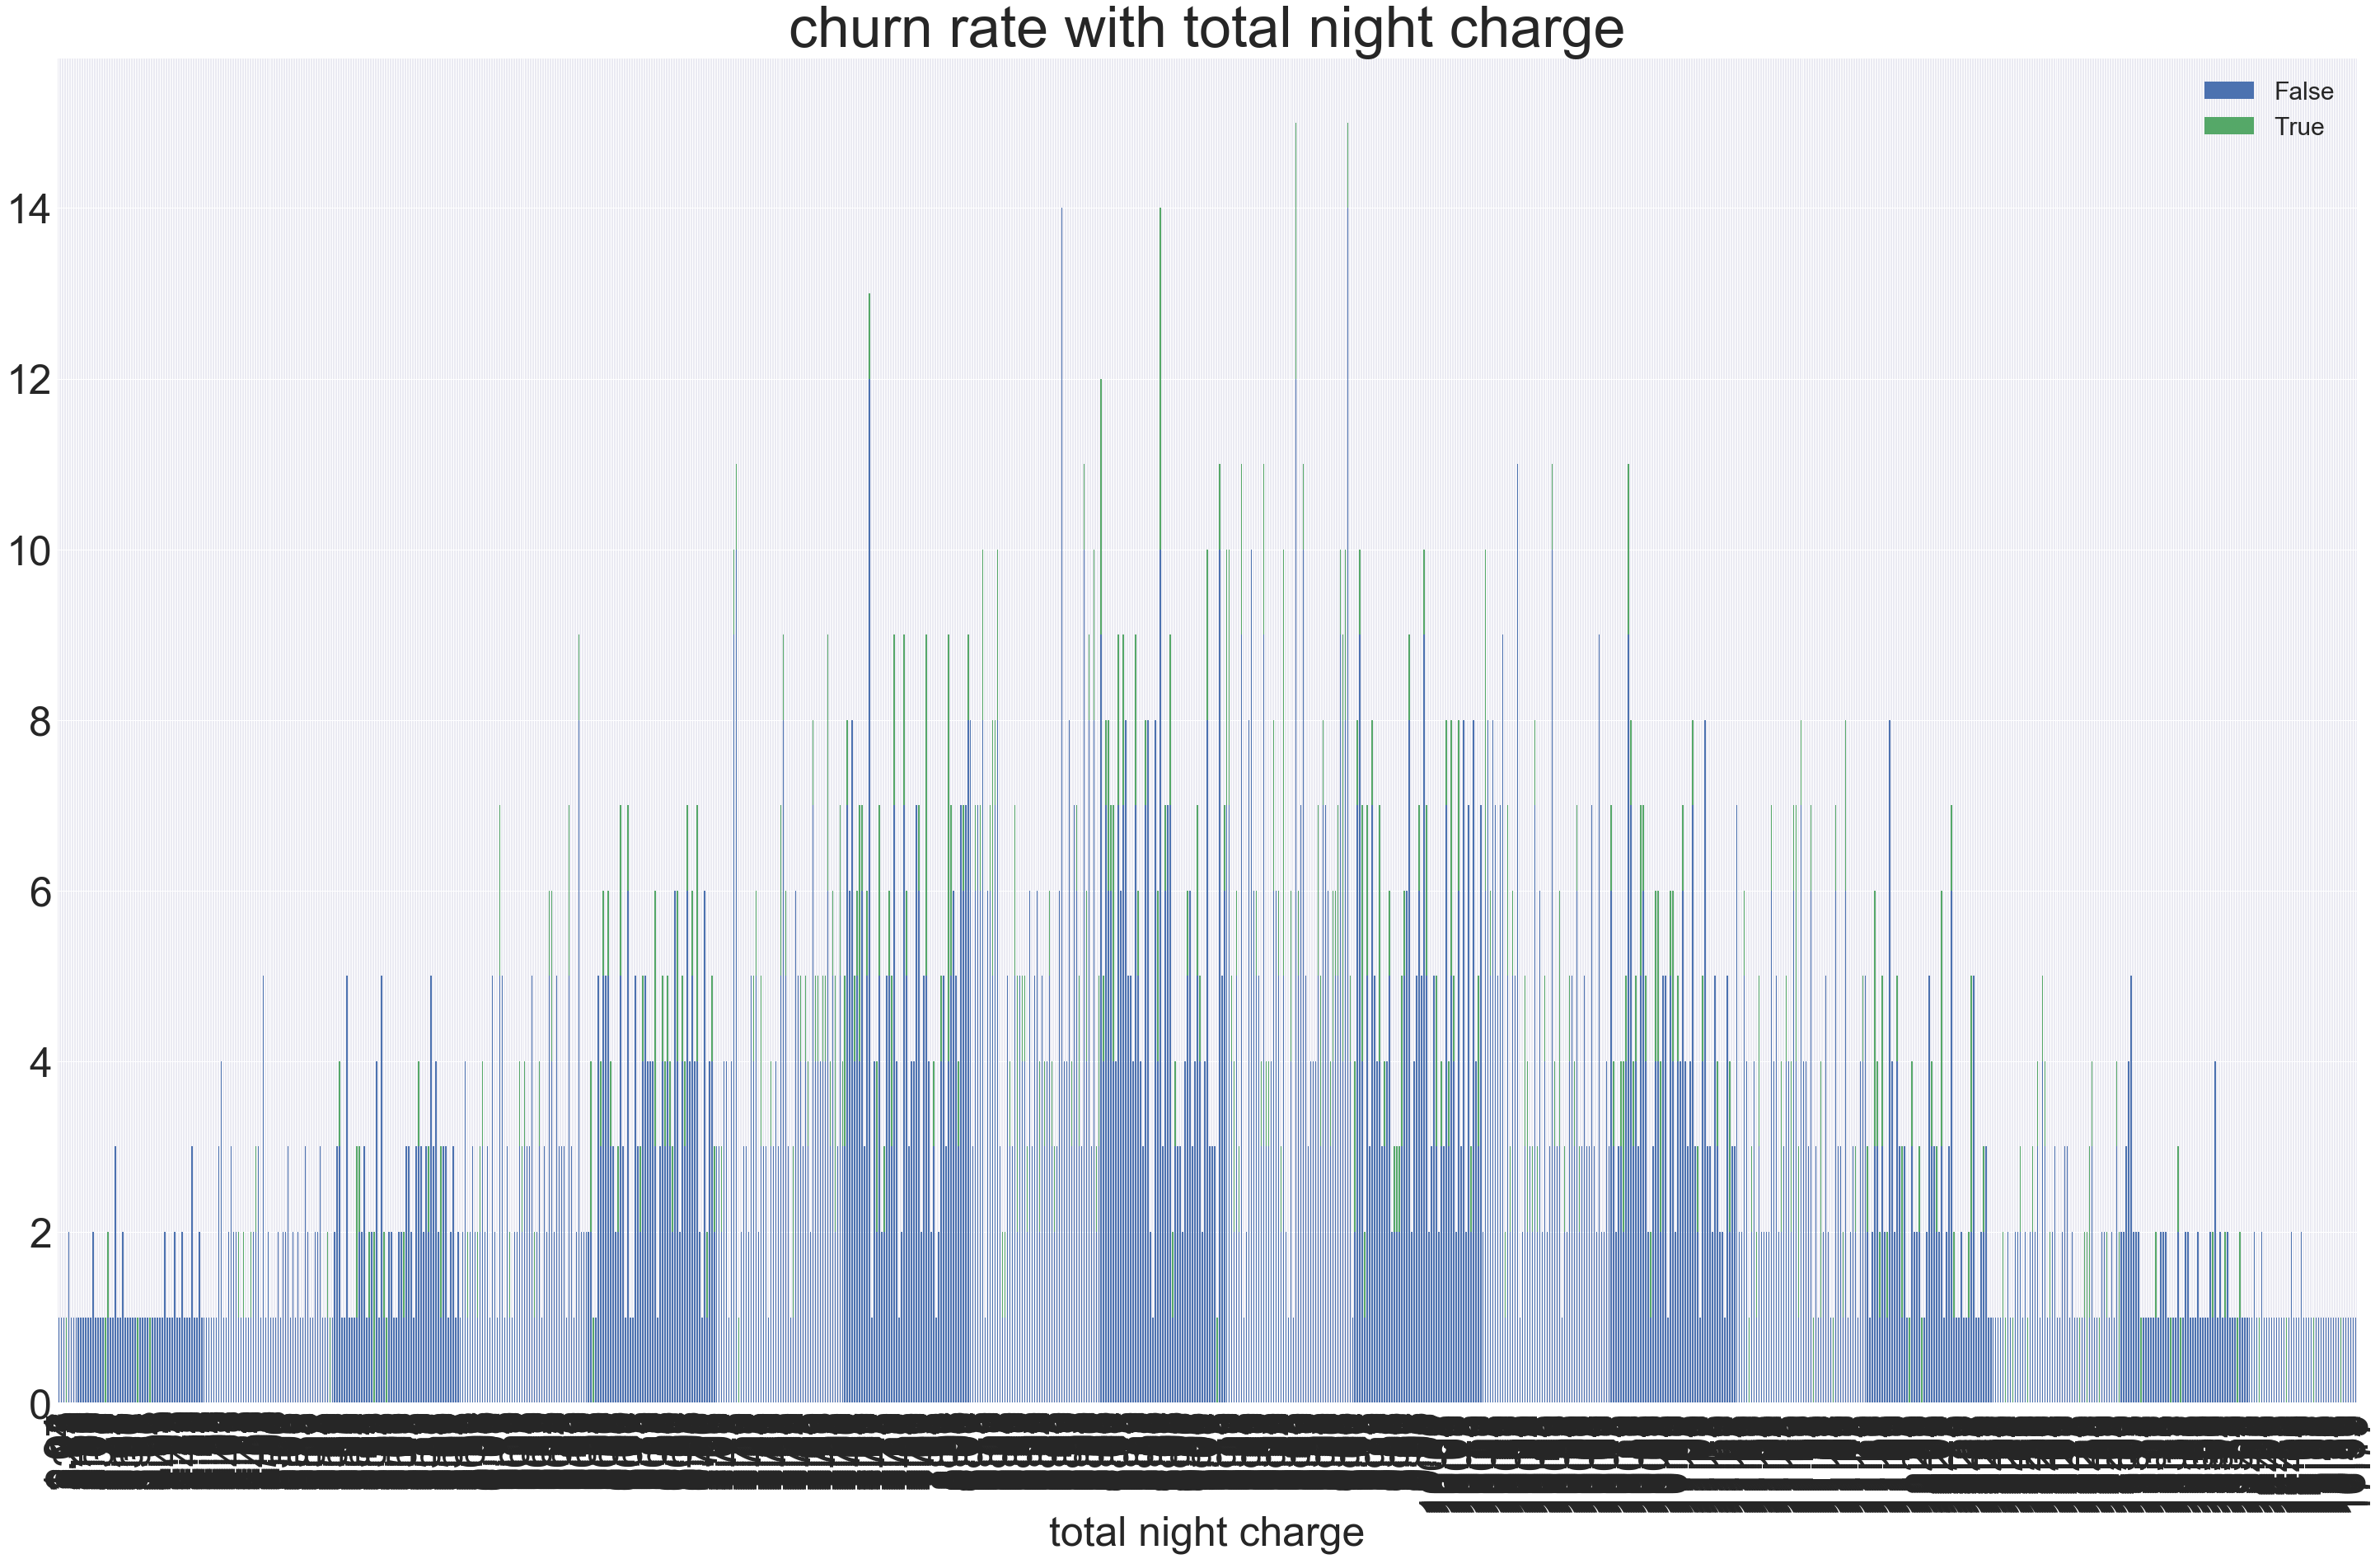

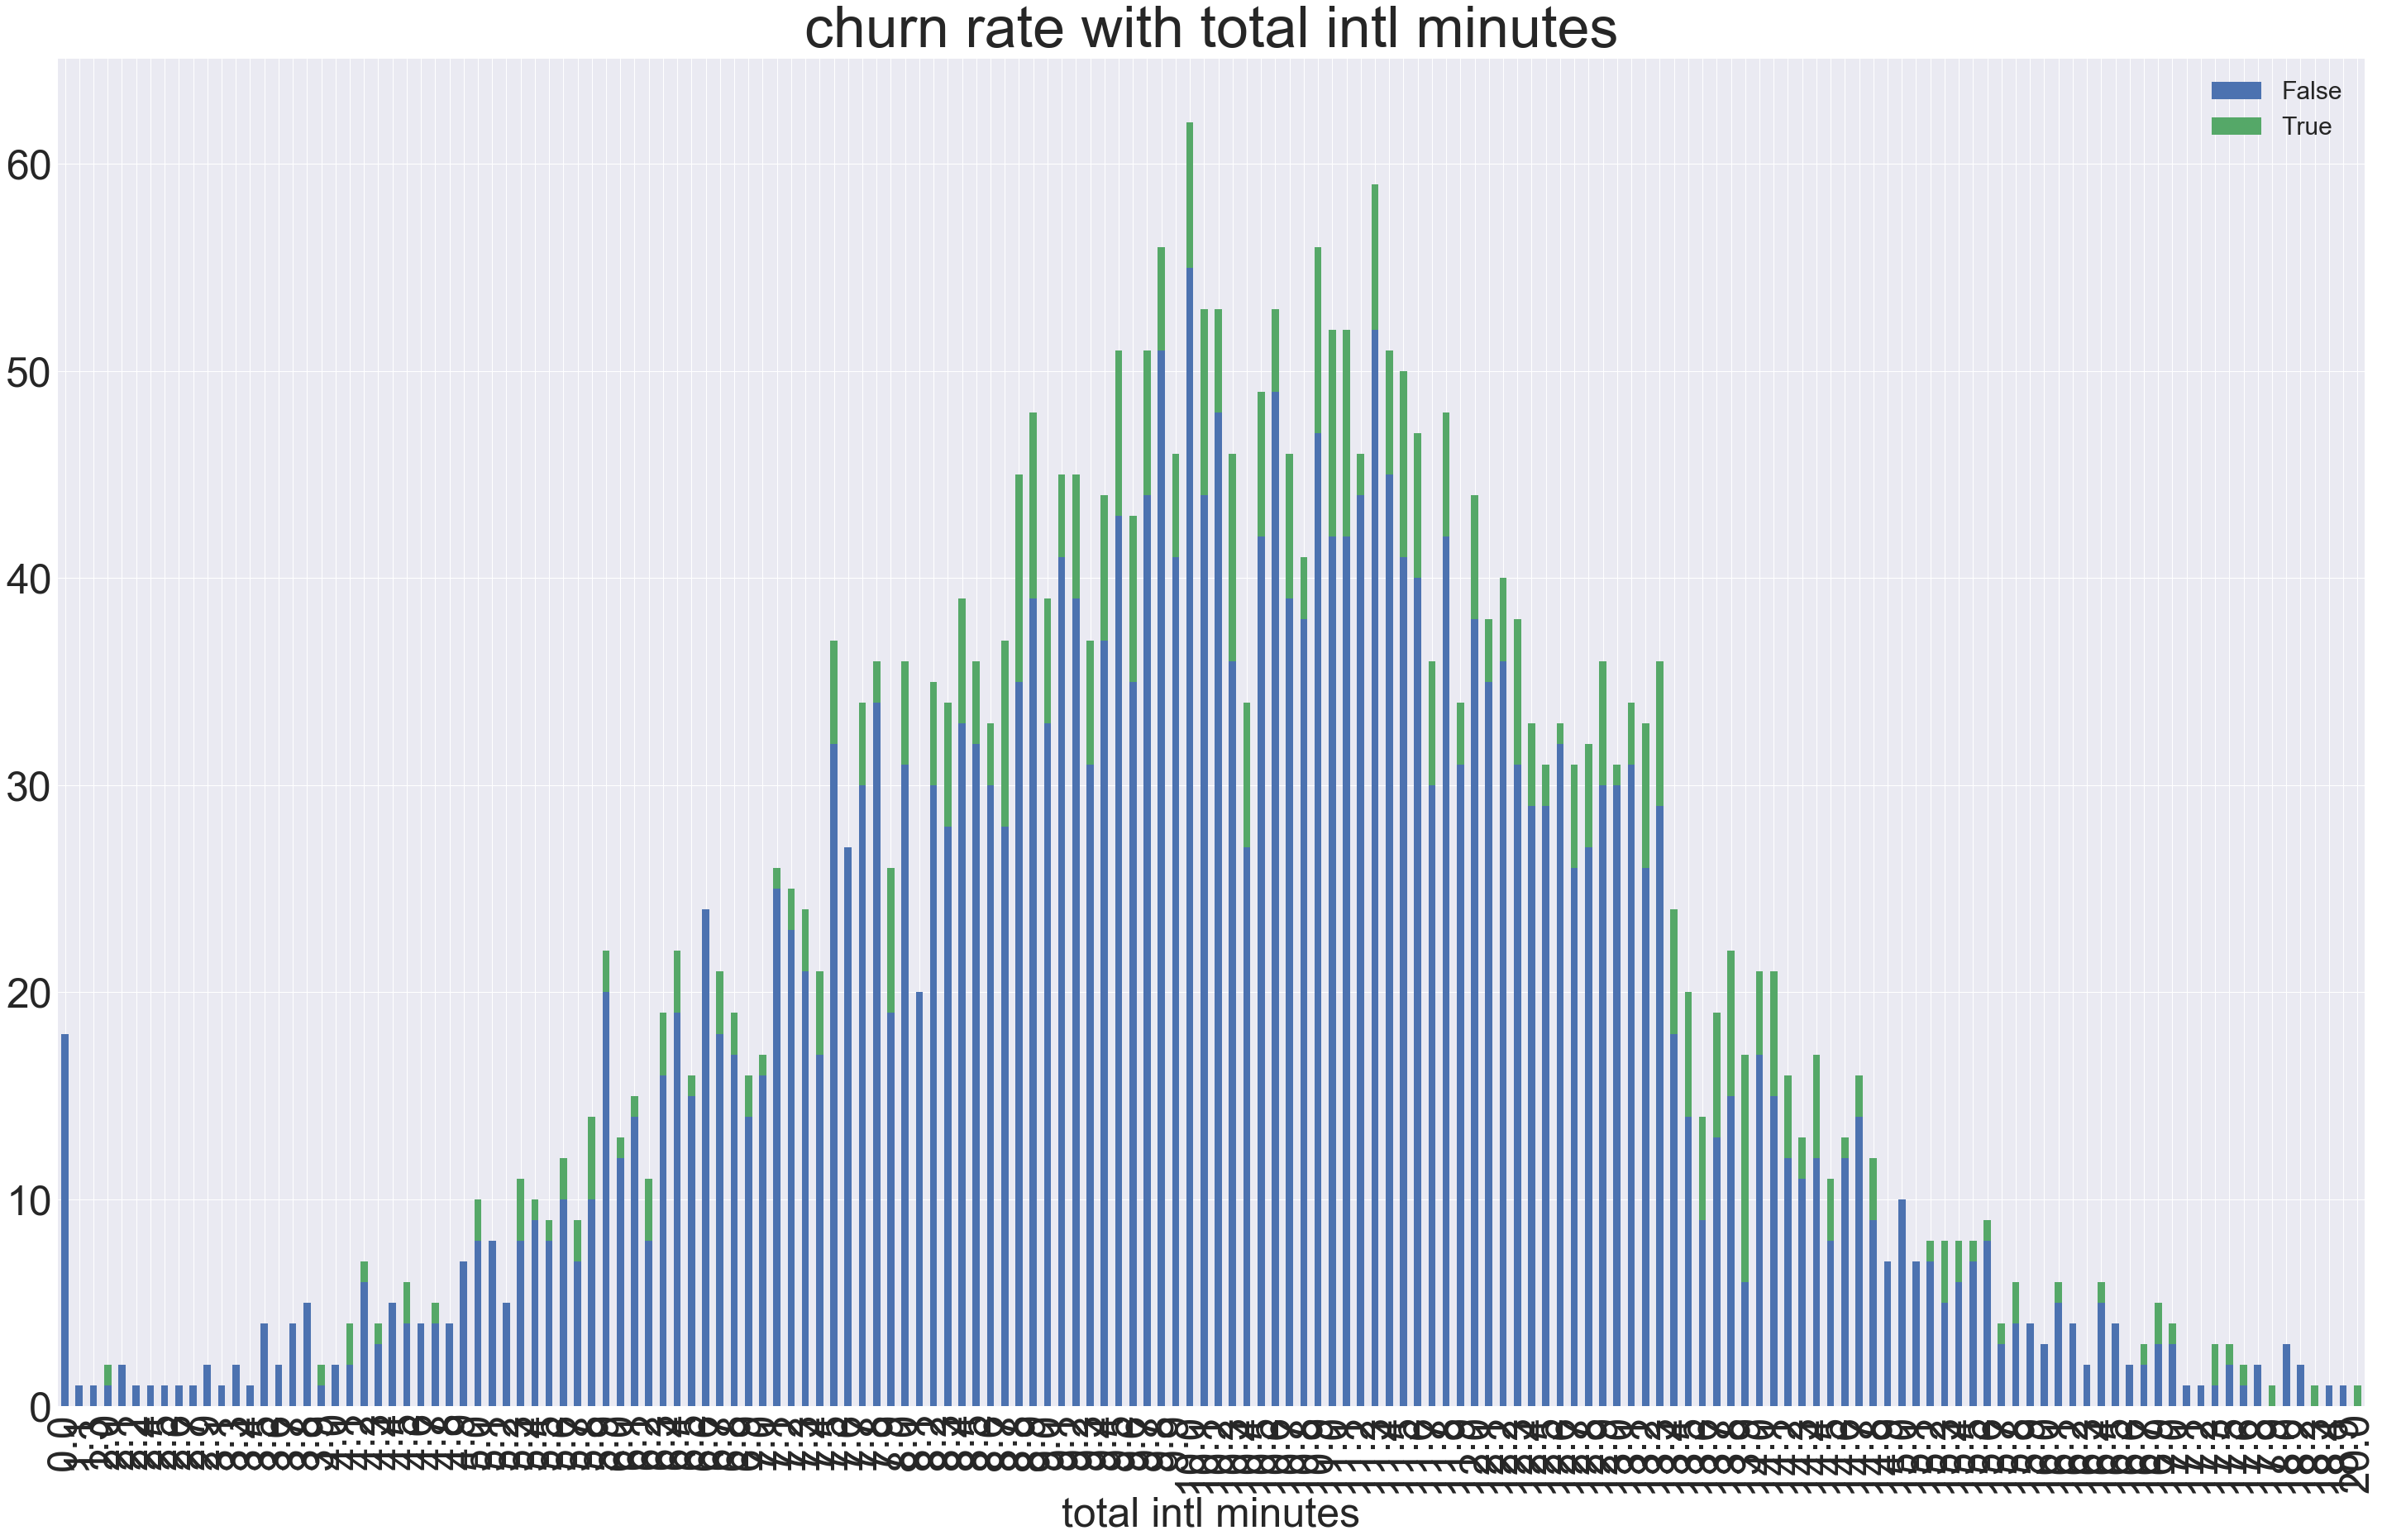

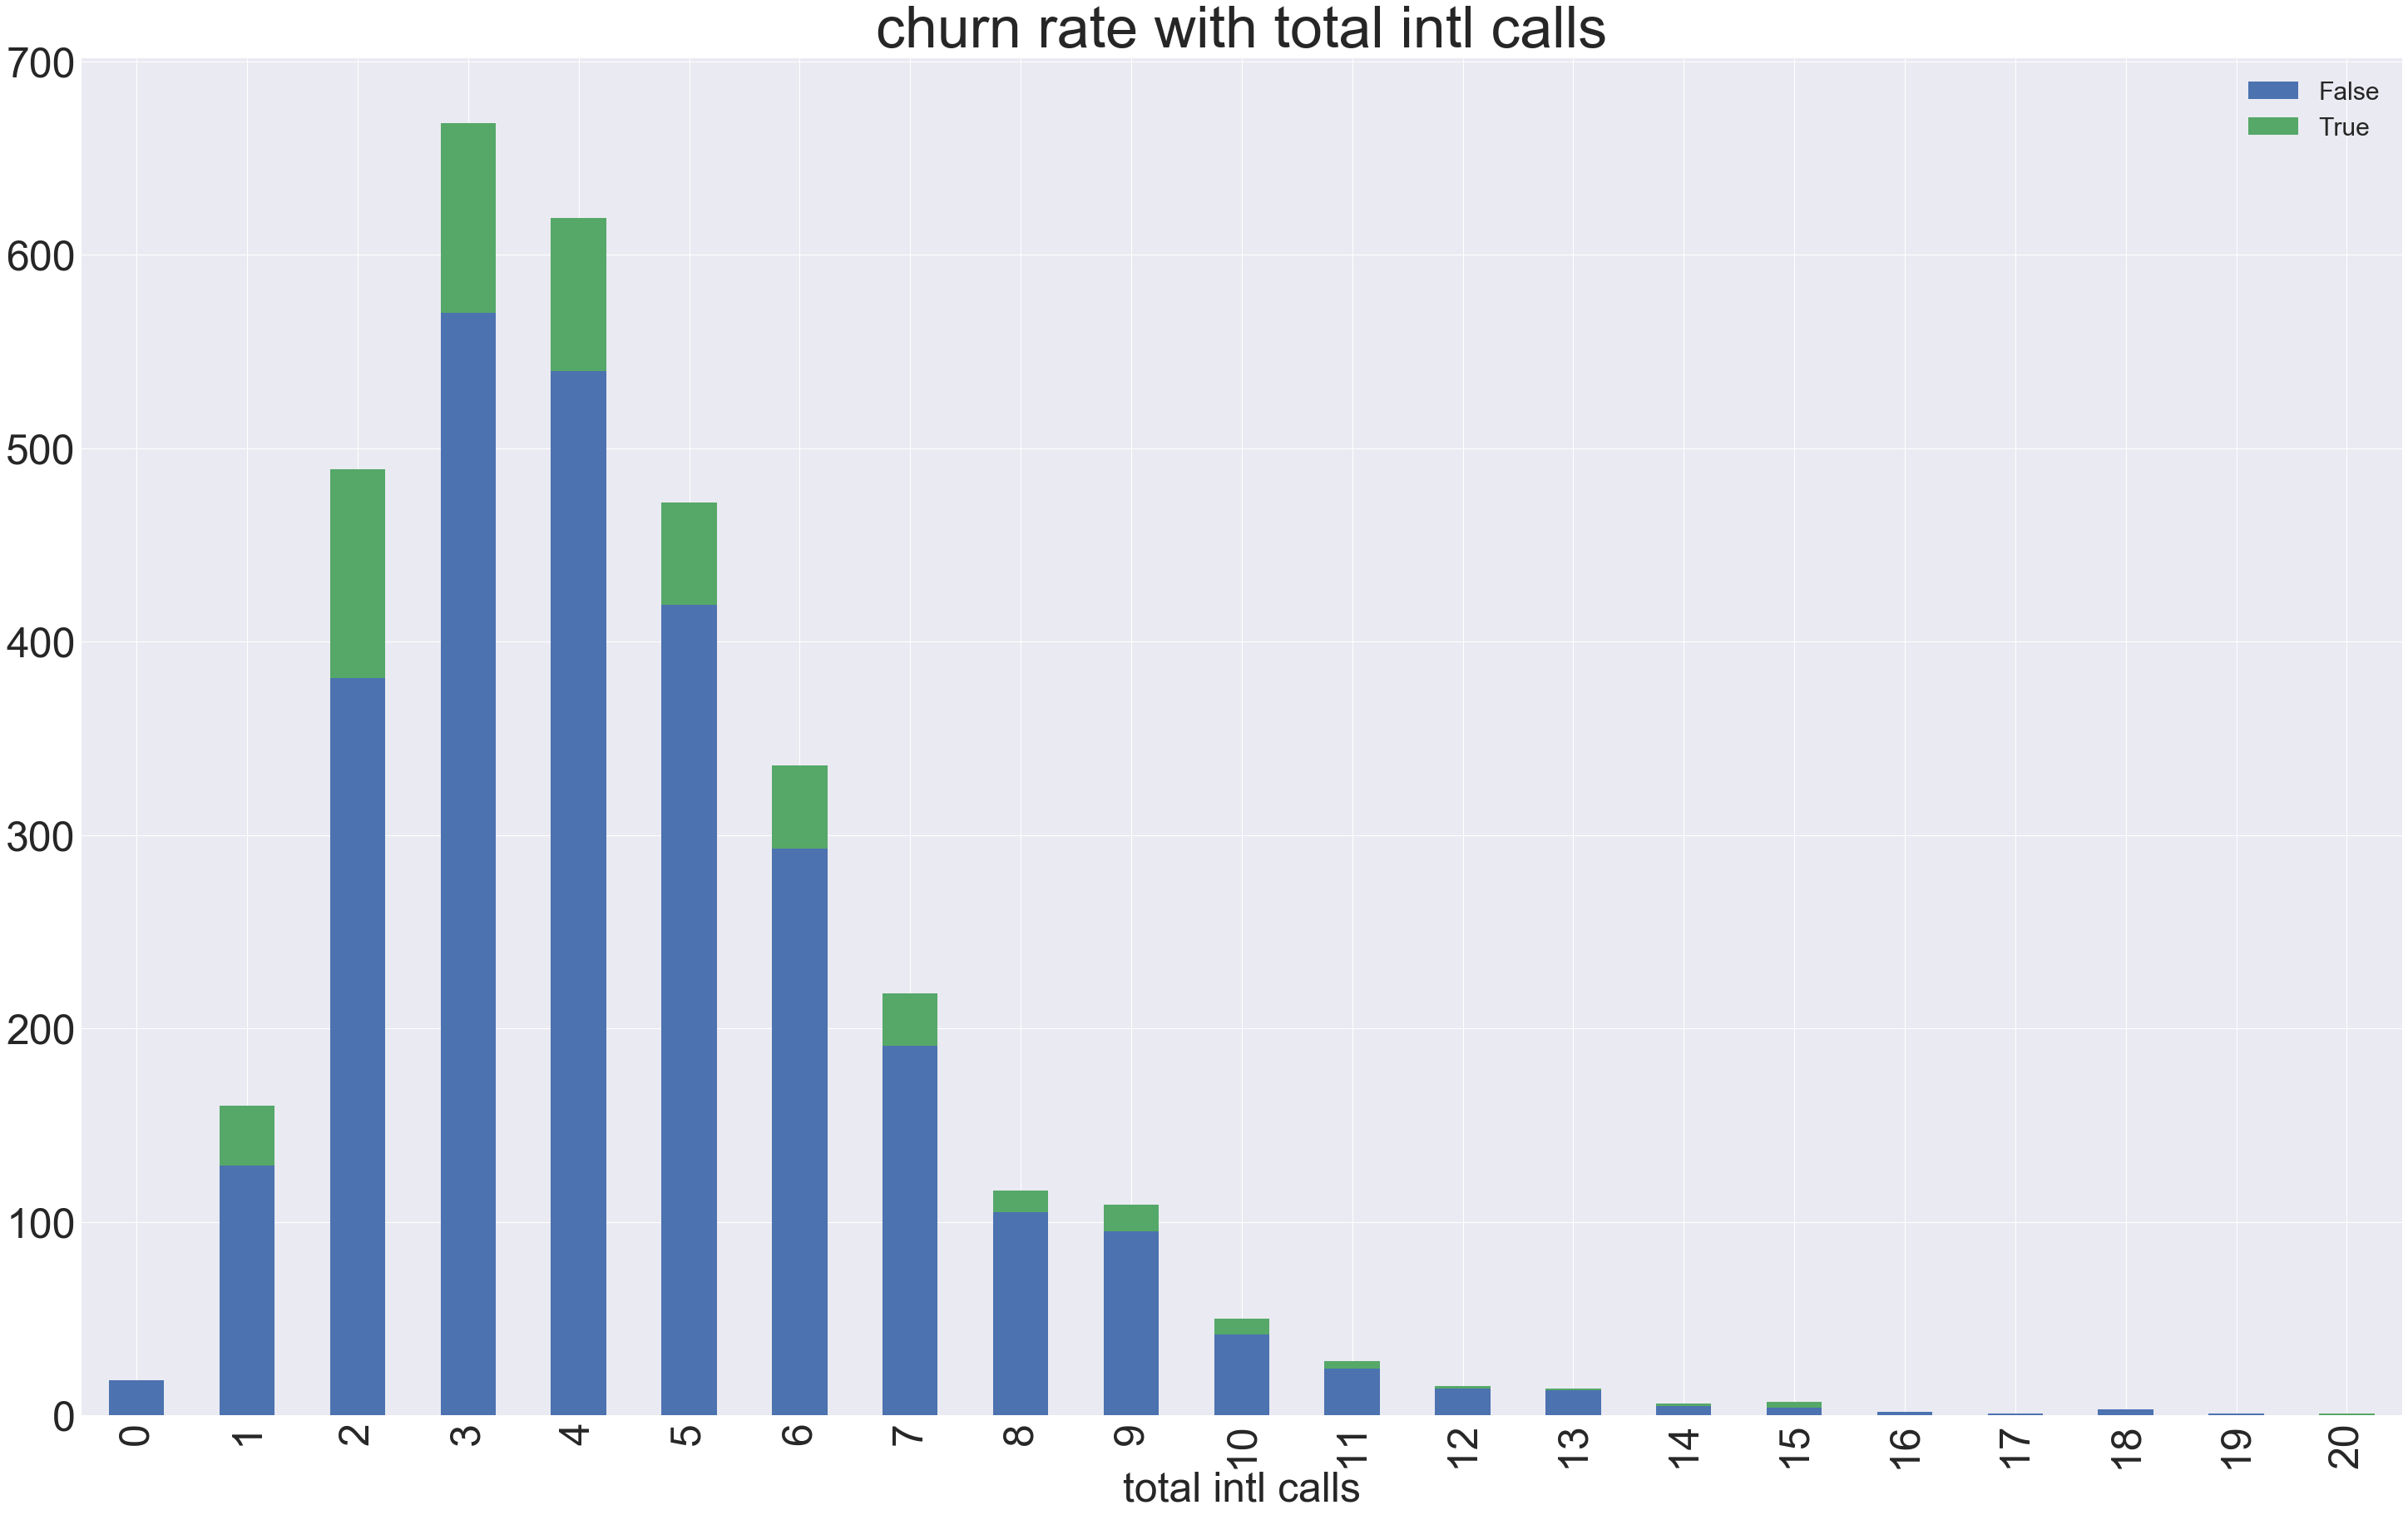

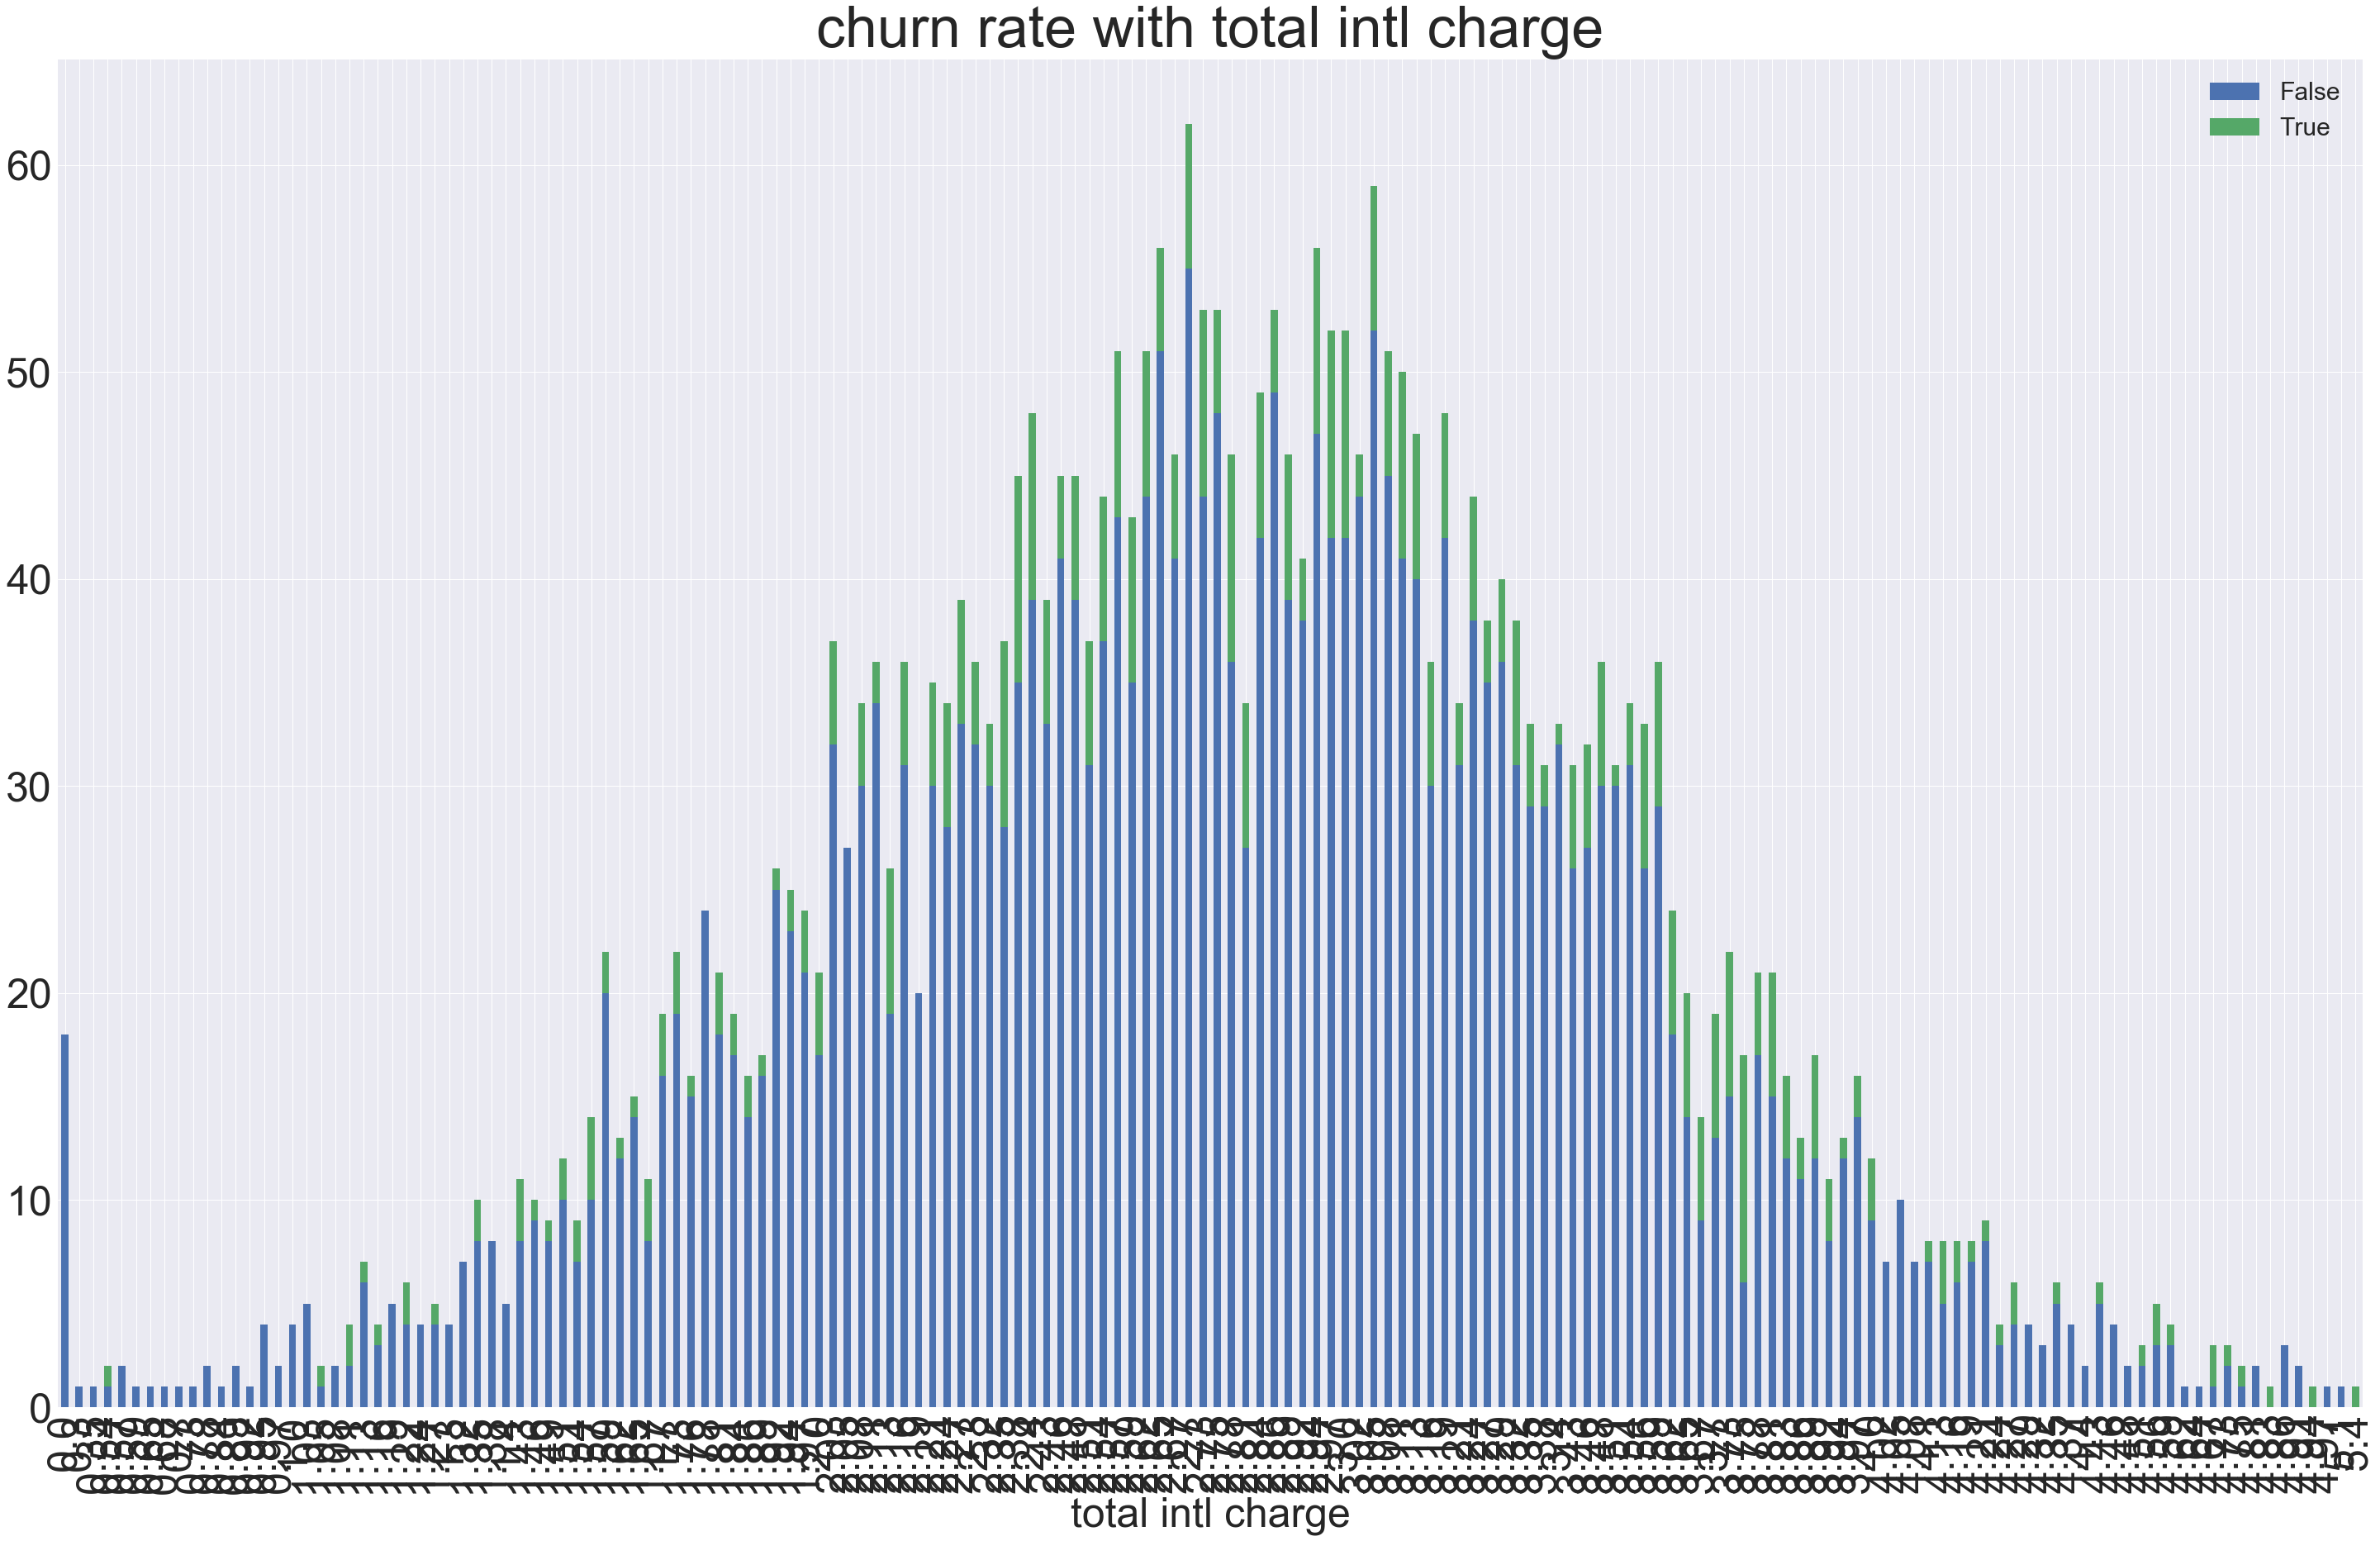

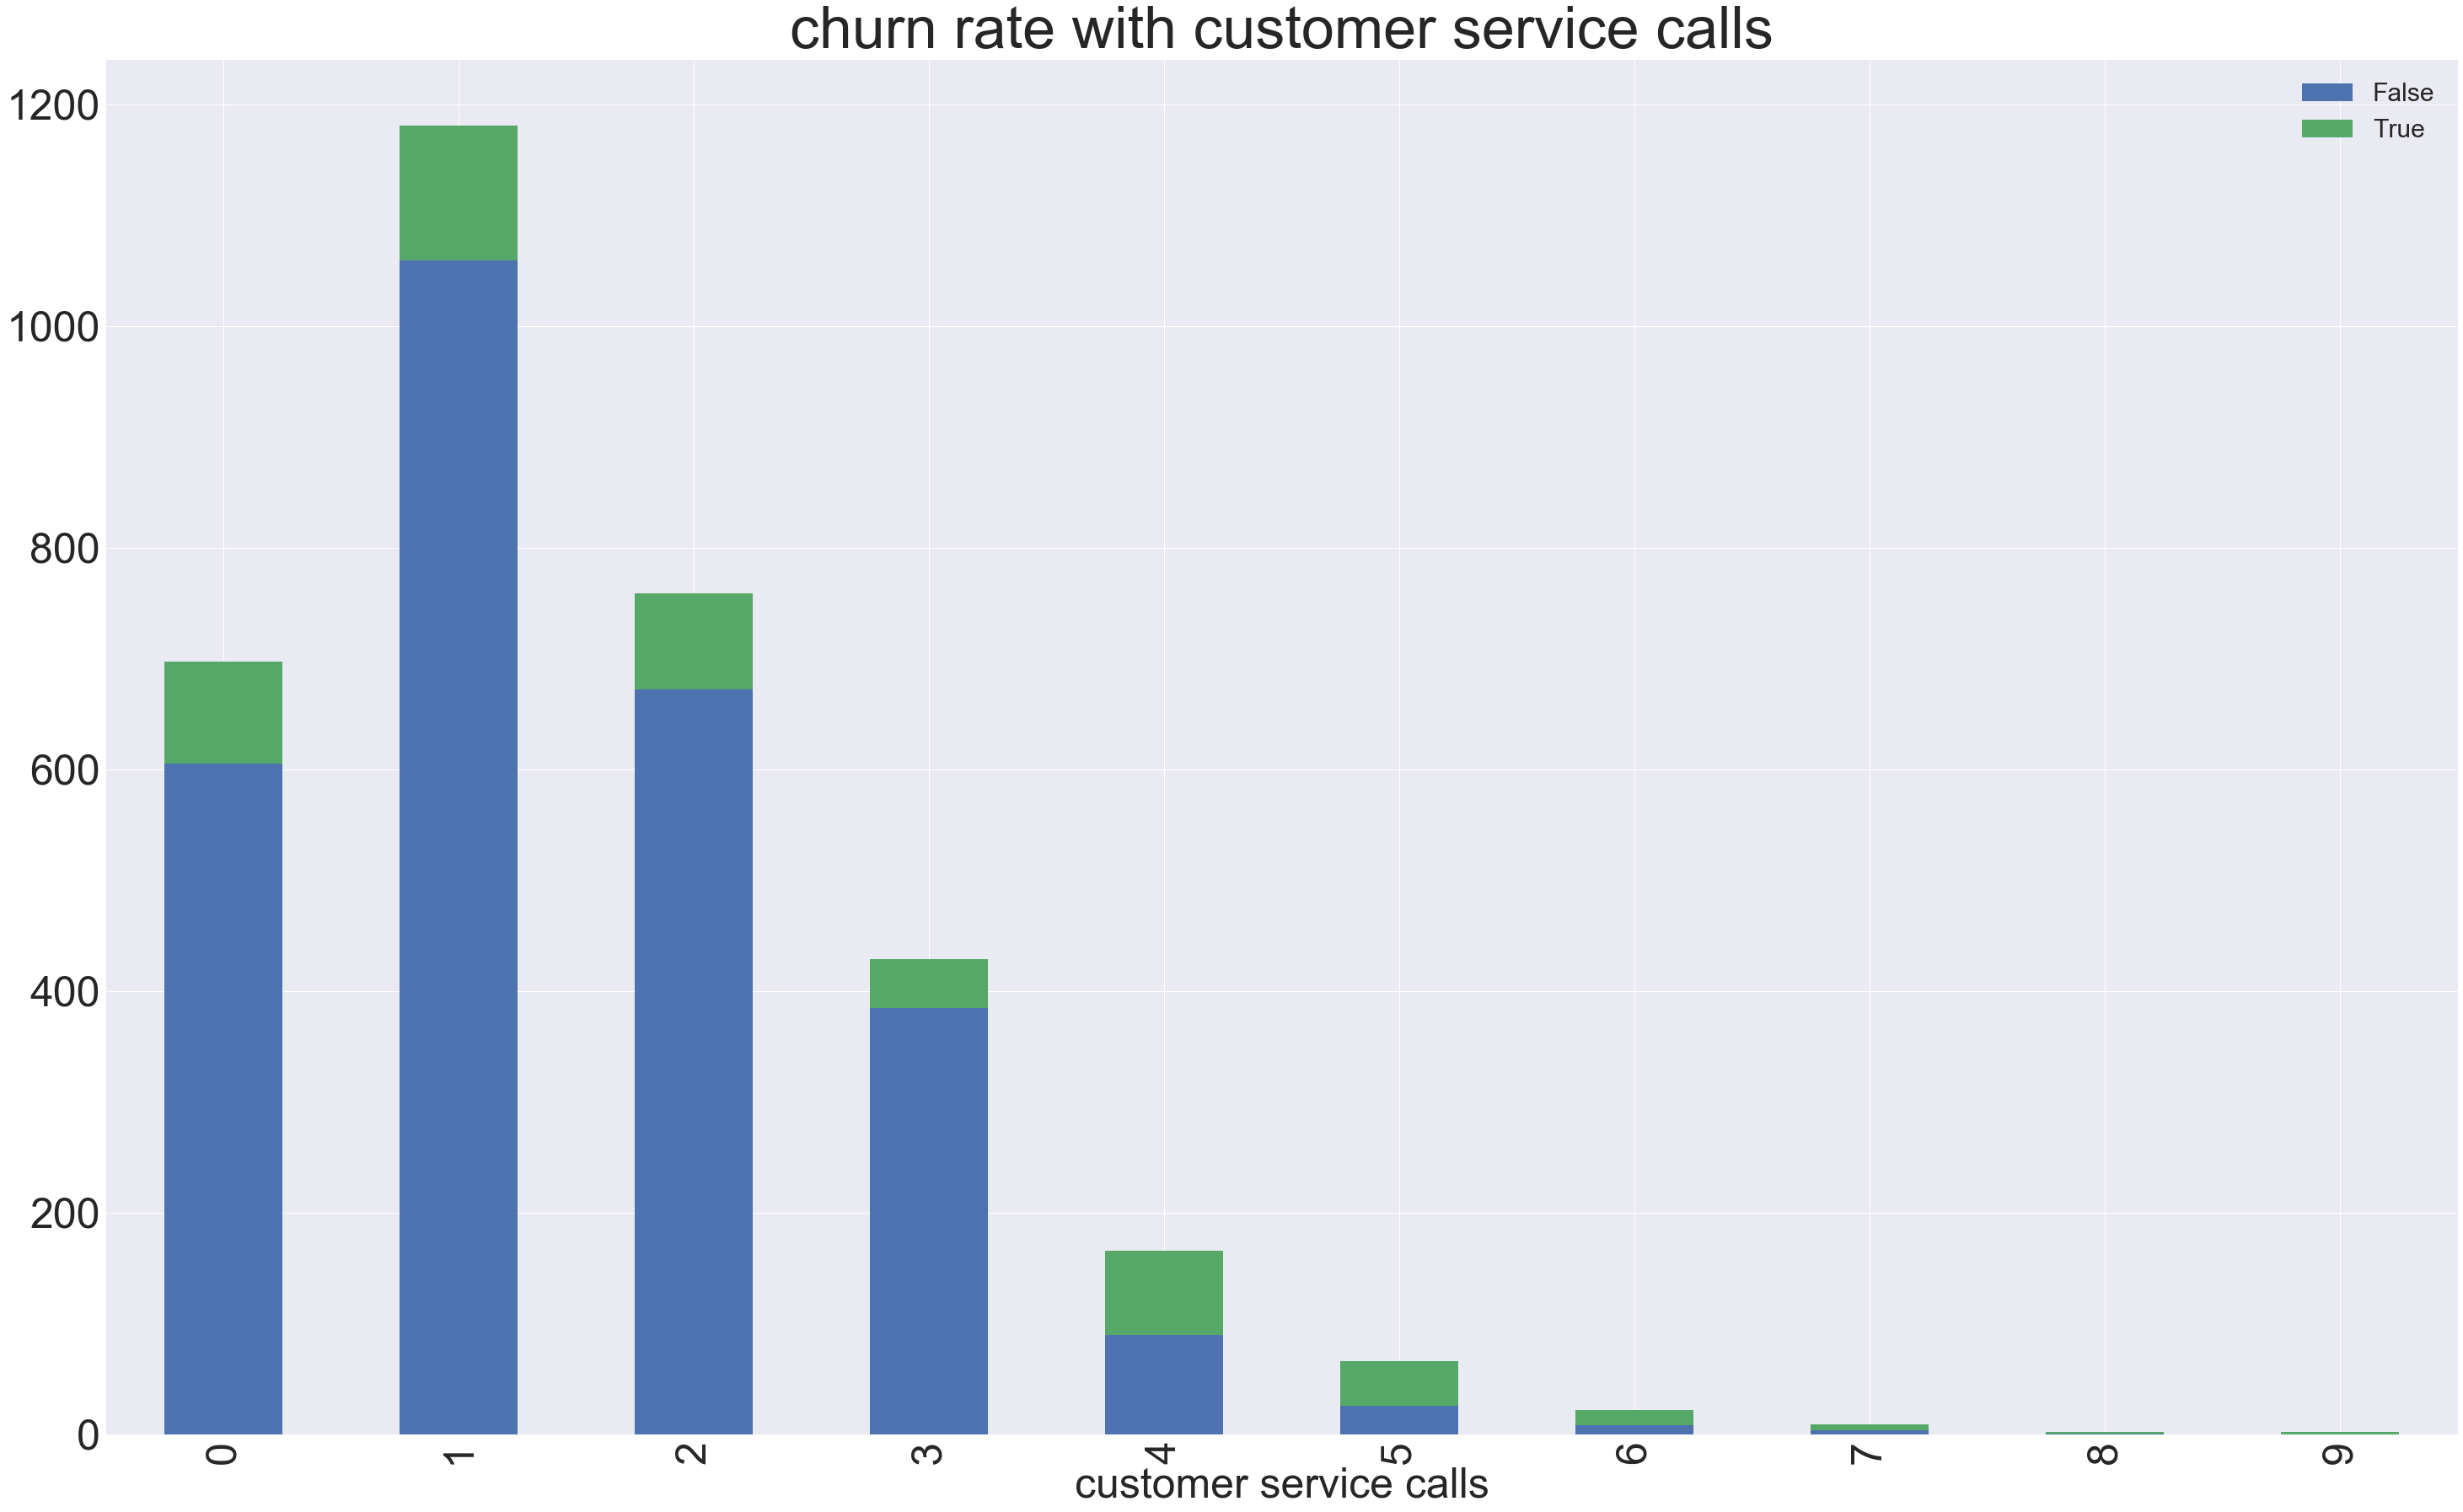

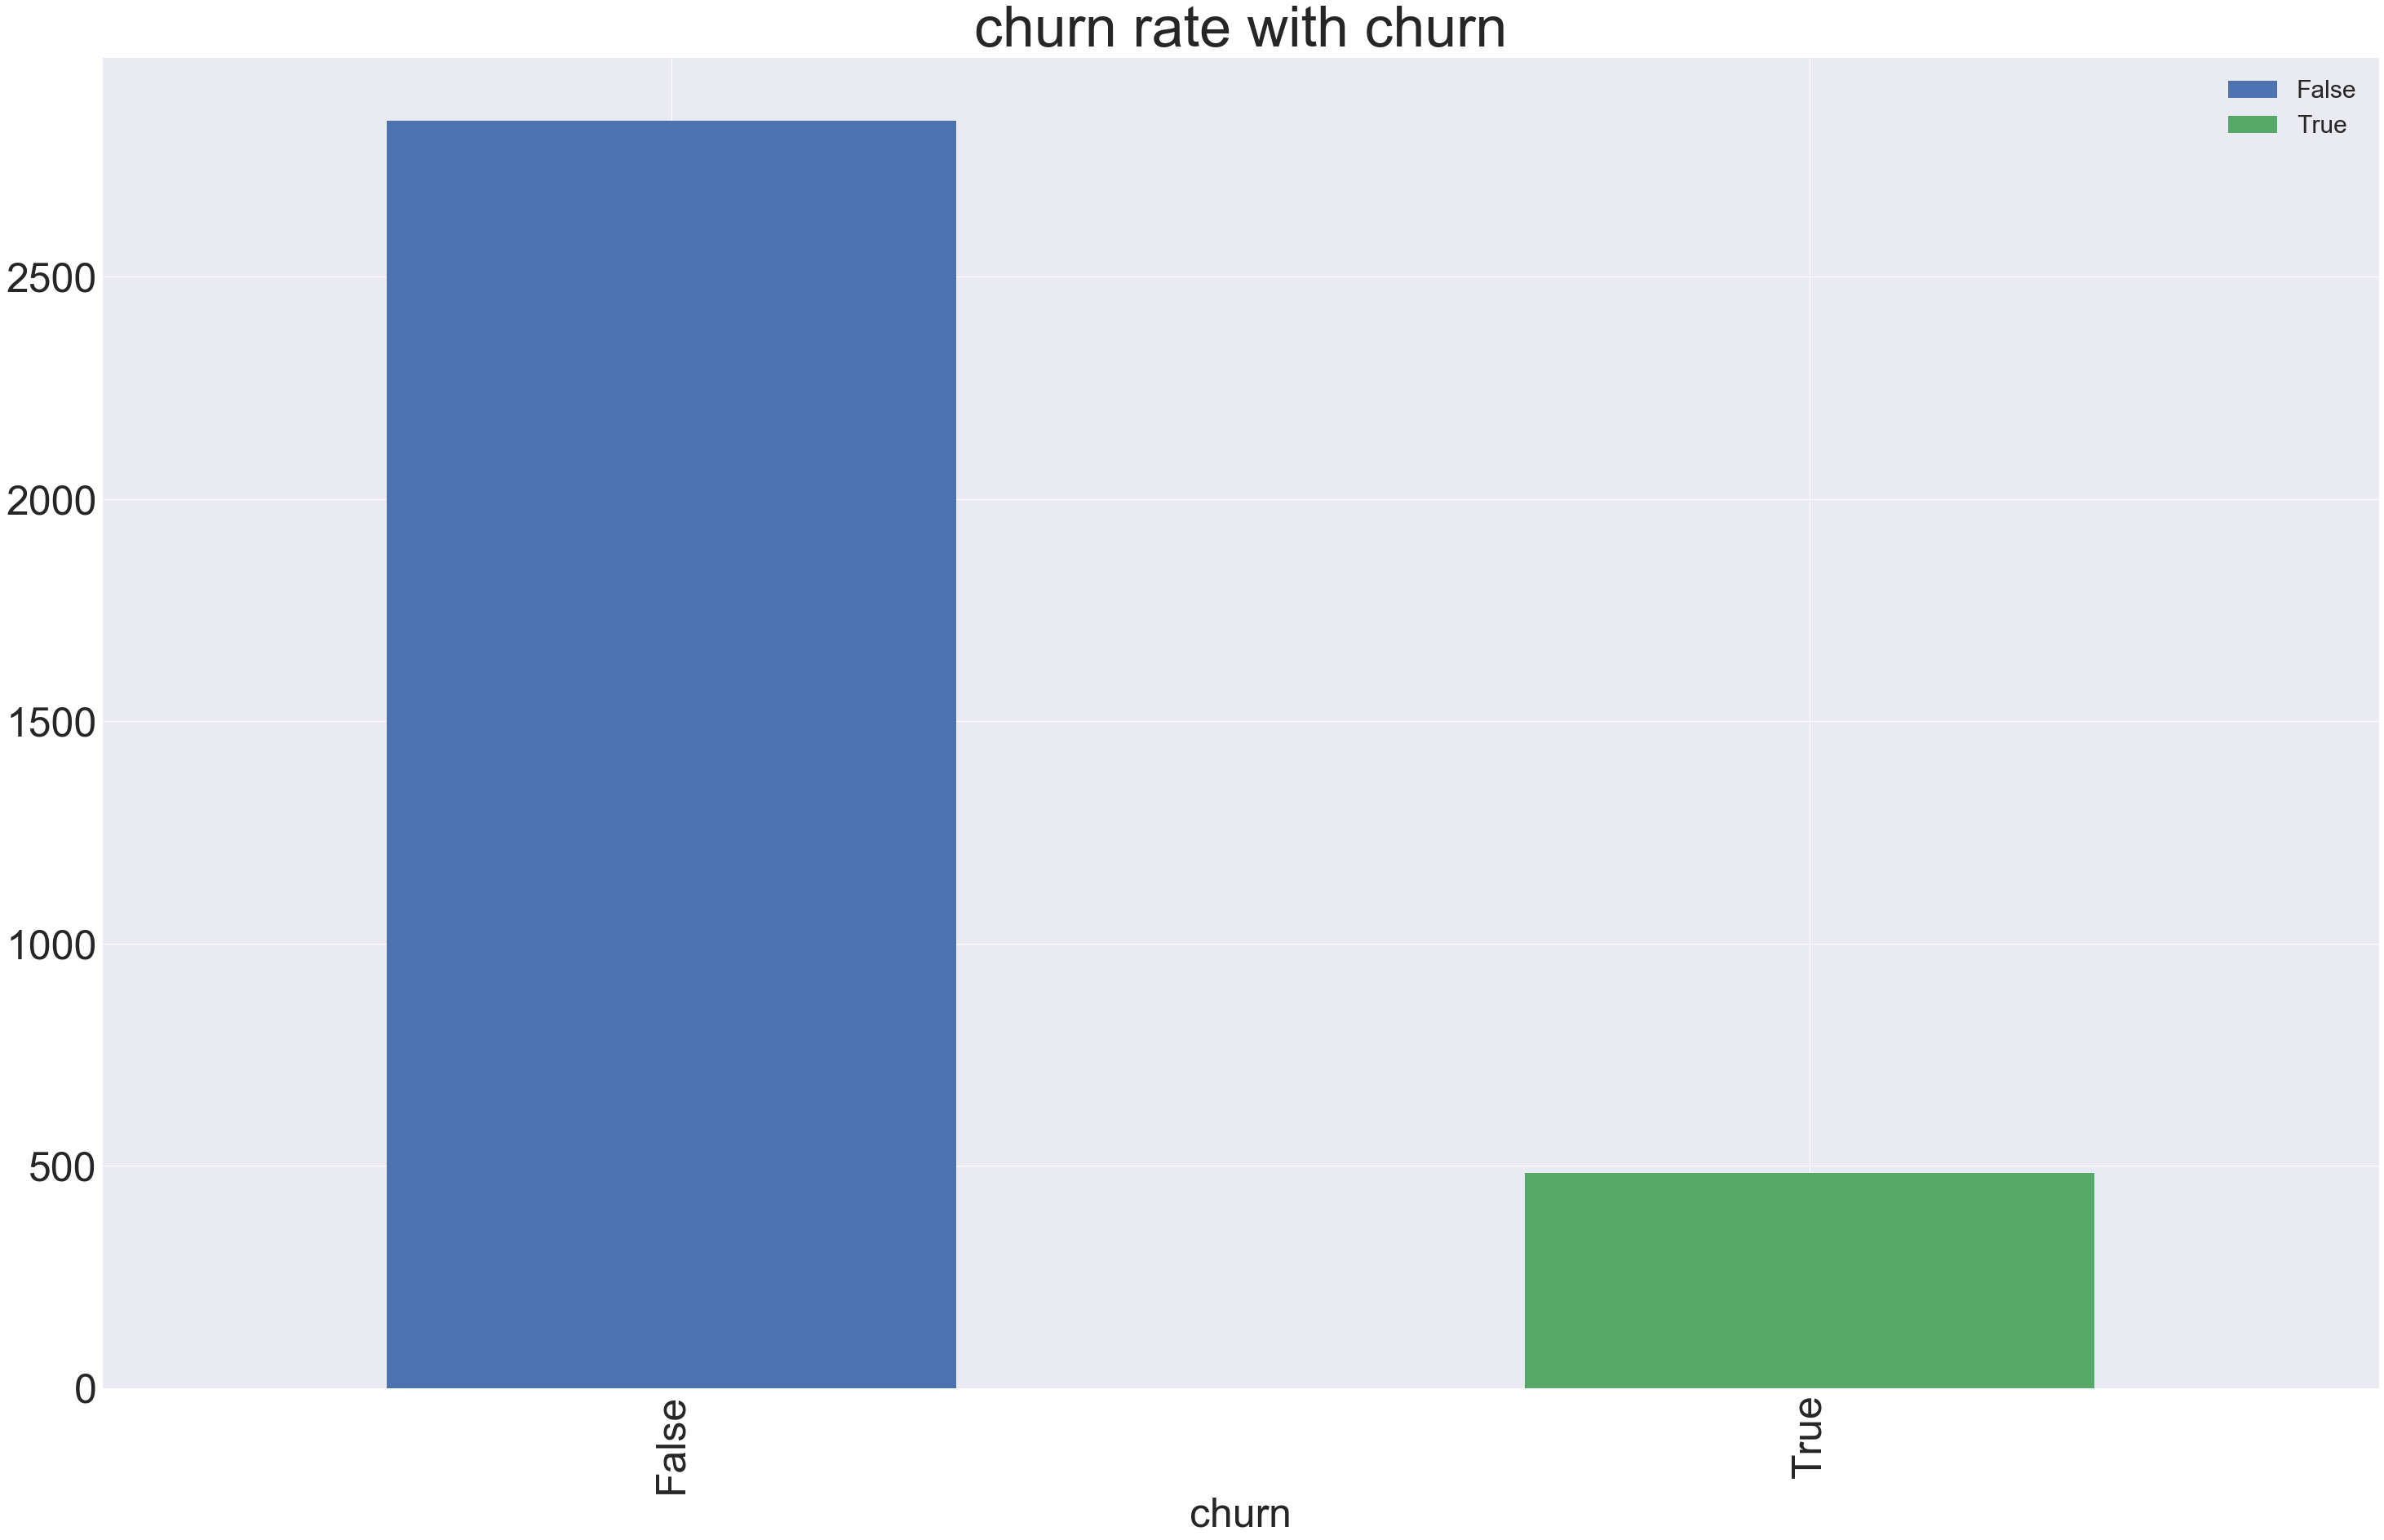

In [114]:
# going through each of the features vs churn to look at both the single distributions and also relationship with churn
for i in list_index:
    df.groupby([i, "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))
    plt.title(f'churn rate with {i}' , fontsize = 70)
    plt.legend(fontsize = 30)
    plt.xticks(fontsize = 50)
    plt.yticks(fontsize = 50)
  
    plt.xlabel(i, fontsize = 50)
    plt.style.use('seaborn')
    
    
    

International calls and customer service calls are skewed to the left. Need to further investigate that.

###  What are the customer brackets (in terms of account length) with higher churn rate?

In [115]:
df_brackets = df.copy()
df_brackets

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [116]:
# bracketing account_lengths
bins = [0, 25, 50,75, 100, 125, 150, 175, 200, 225, 250]
labels = ['0-25','25-50','50-75','75-100','100-125','125-150', '150-175', '175-200', '200-225','225-250']
df_brackets['brackets_accounts_l'] = pd.cut(df_brackets['account length'], bins=bins, labels=labels)

df_brackets


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,brackets_accounts_l
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,125-150
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,100-125
2,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,125-150
3,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,75-100
4,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,50-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,175-200
3329,WV,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,50-75
3330,RI,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,25-50
3331,CT,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,175-200


In [117]:
grouped_brack = df_brackets.groupby(['brackets_accounts_l', 'churn']).size().unstack().reset_index()

sum_all_t = grouped_brack[True].sum()
grouped_brack['churn_percentage'] = (grouped_brack[True] / sum_all_t) * 100
grouped_brack




churn,brackets_accounts_l,False,True,churn_percentage
0,0-25,84.0,15.0,3.105590
1,25-50,213.0,29.0,6.004141
2,50-75,474.0,74.0,15.320911
3,75-100,659.0,116.0,24.016563
4,100-125,666.0,121.0,25.051760
5,125-150,452.0,74.0,15.320911
6,150-175,203.0,36.0,7.453416
7,175-200,79.0,12.0,2.484472
8,200-225,18.0,6.0,1.242236
9,225-250,2.0,NaN,NaN


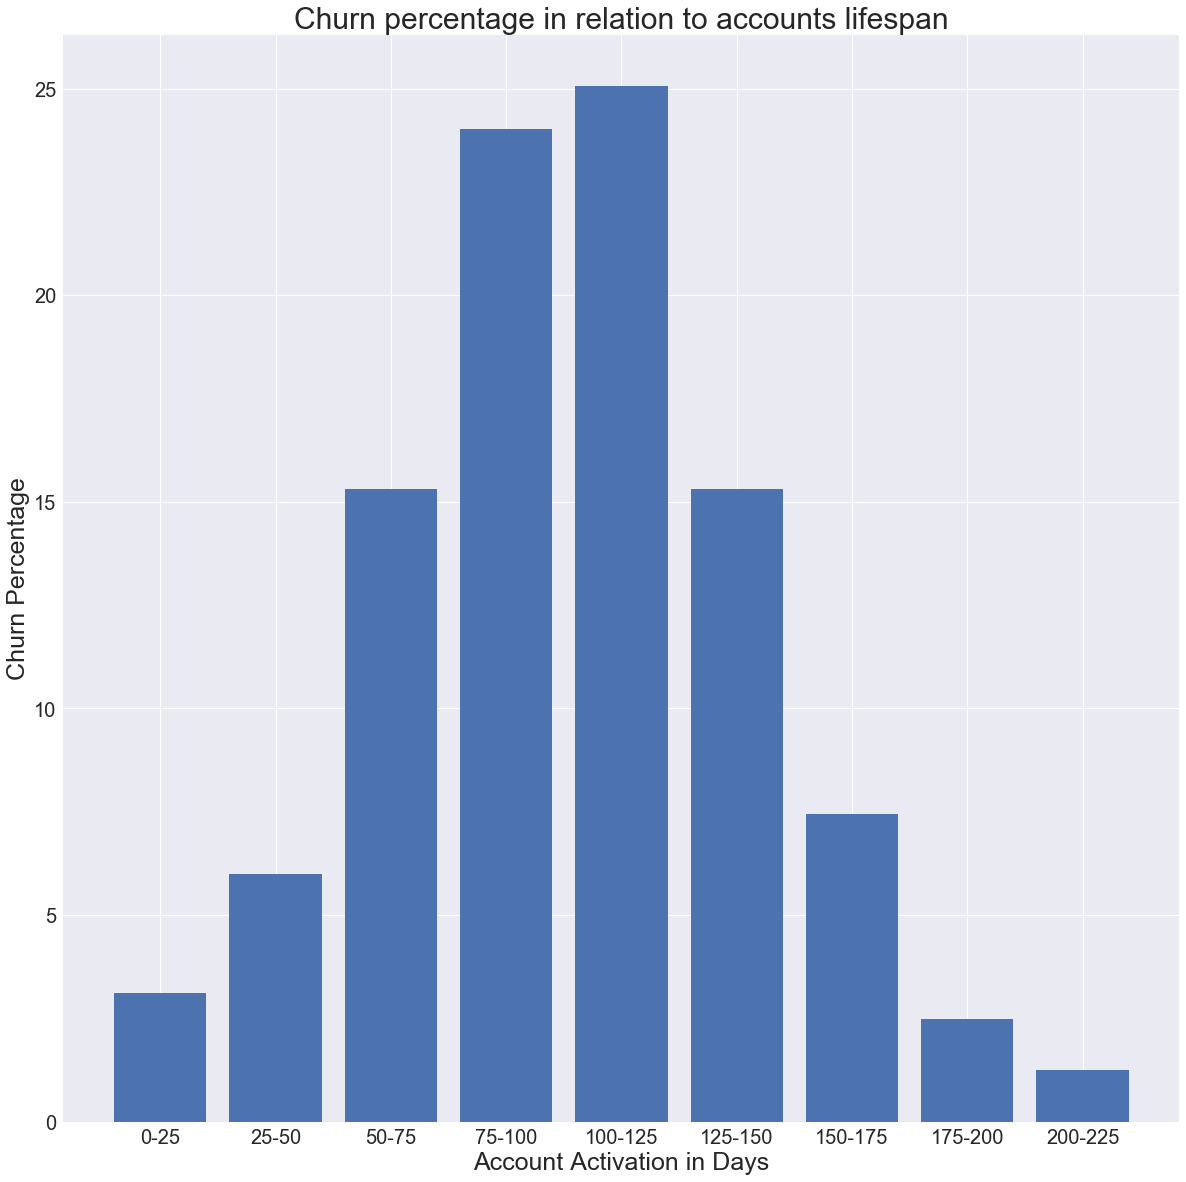

In [118]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(grouped_brack['brackets_accounts_l'], grouped_brack['churn_percentage'])
plt.title('Churn percentage in relation to accounts lifespan', fontsize = 30)

ax.set_xlabel("Account Activation in Days",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')


There seems to be a peak of account deactivations within the range 100-125 days. Customers after that time window seems to stick to the firm while customers prior to that haven't got enough info to drop out yet. 

###  What are the top 5 states for churn rate? Lowest 5?

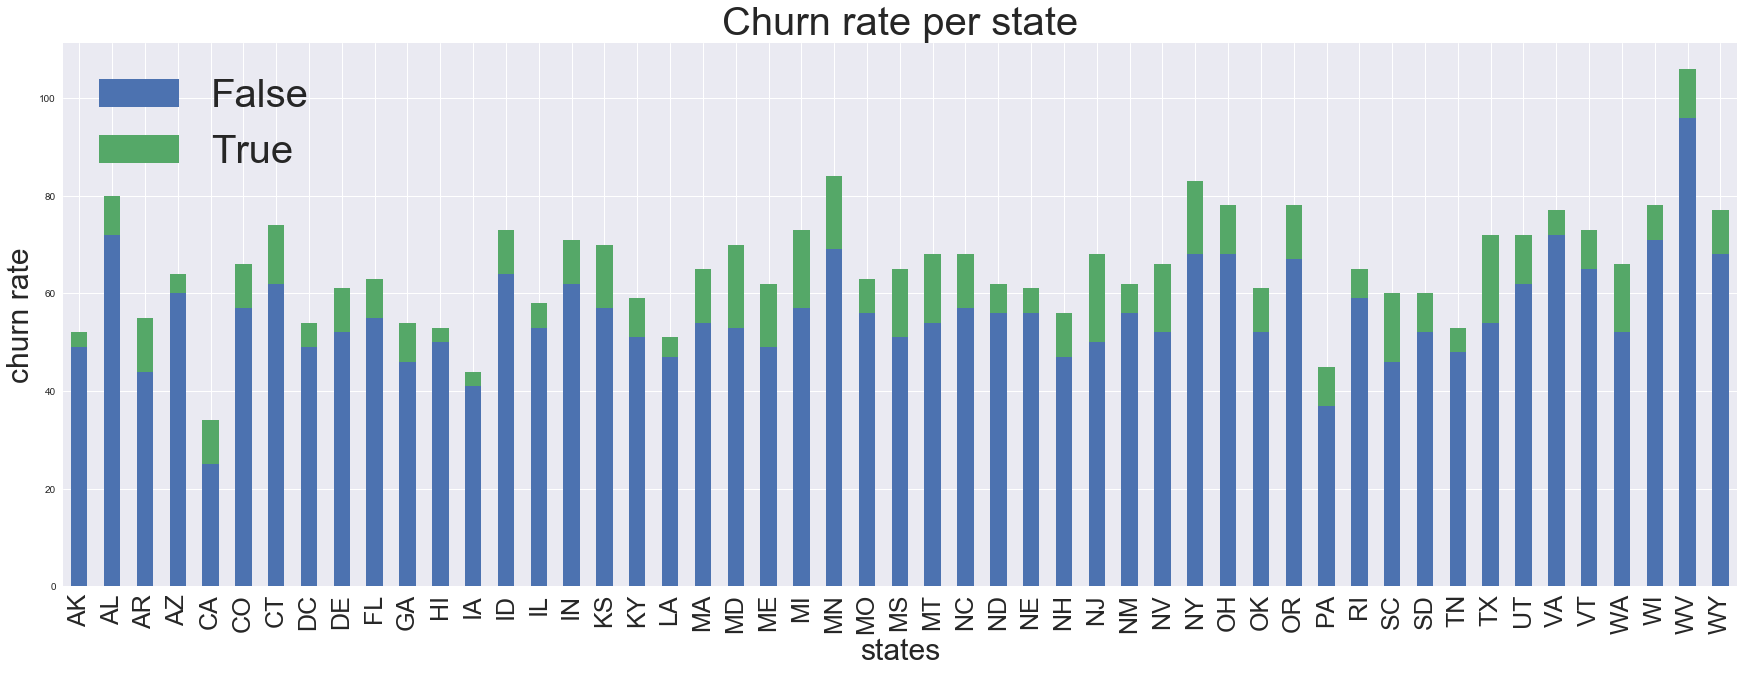

In [119]:
# plotting churn rate against states


state_grouped = df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))
plt.xlabel("states", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("churn rate", fontsize = 30)
plt.legend (loc = 2, fontsize = 40)
plt.title ('Churn rate per state', fontsize = 40)
plt.show()


In [120]:
# extracting top5 and last 5 for churn rate percentage out of all the churned customers
state_grouped_1 = df.groupby(["state", "churn"]).size().unstack().reset_index()
sum_all_states = state_grouped_1[True].sum()
state_grouped_1['churn_percentage'] = (state_grouped_1[True] / sum_all_t) * 100
state_grouped_1.sort_values(by ='churn_percentage', ascending = False, inplace = True)
top_five_churn = state_grouped_1[:5]
lower_five_churn = state_grouped_1[-5:]
lower_five_churn

churn,state,False,True,churn_percentage
18,LA,47,4,0.828157
3,AZ,60,4,0.828157
11,HI,50,3,0.621118
12,IA,41,3,0.621118
0,AK,49,3,0.621118


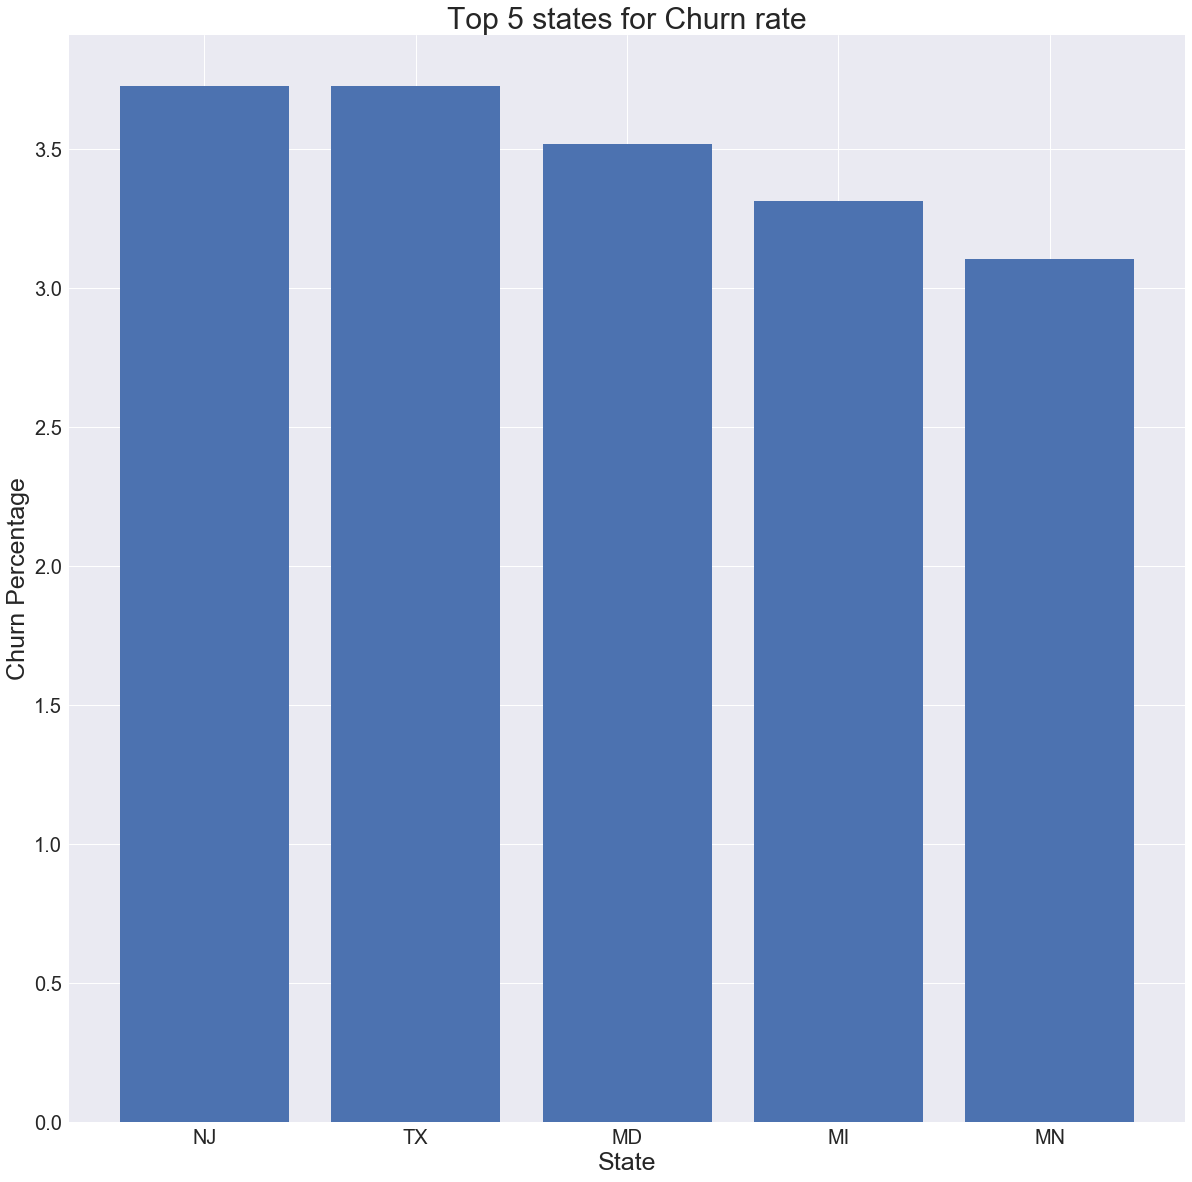

In [121]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(top_five_churn['state'], top_five_churn['churn_percentage'])
plt.title('Top 5 states for Churn rate', fontsize = 30)

ax.set_xlabel("State",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')

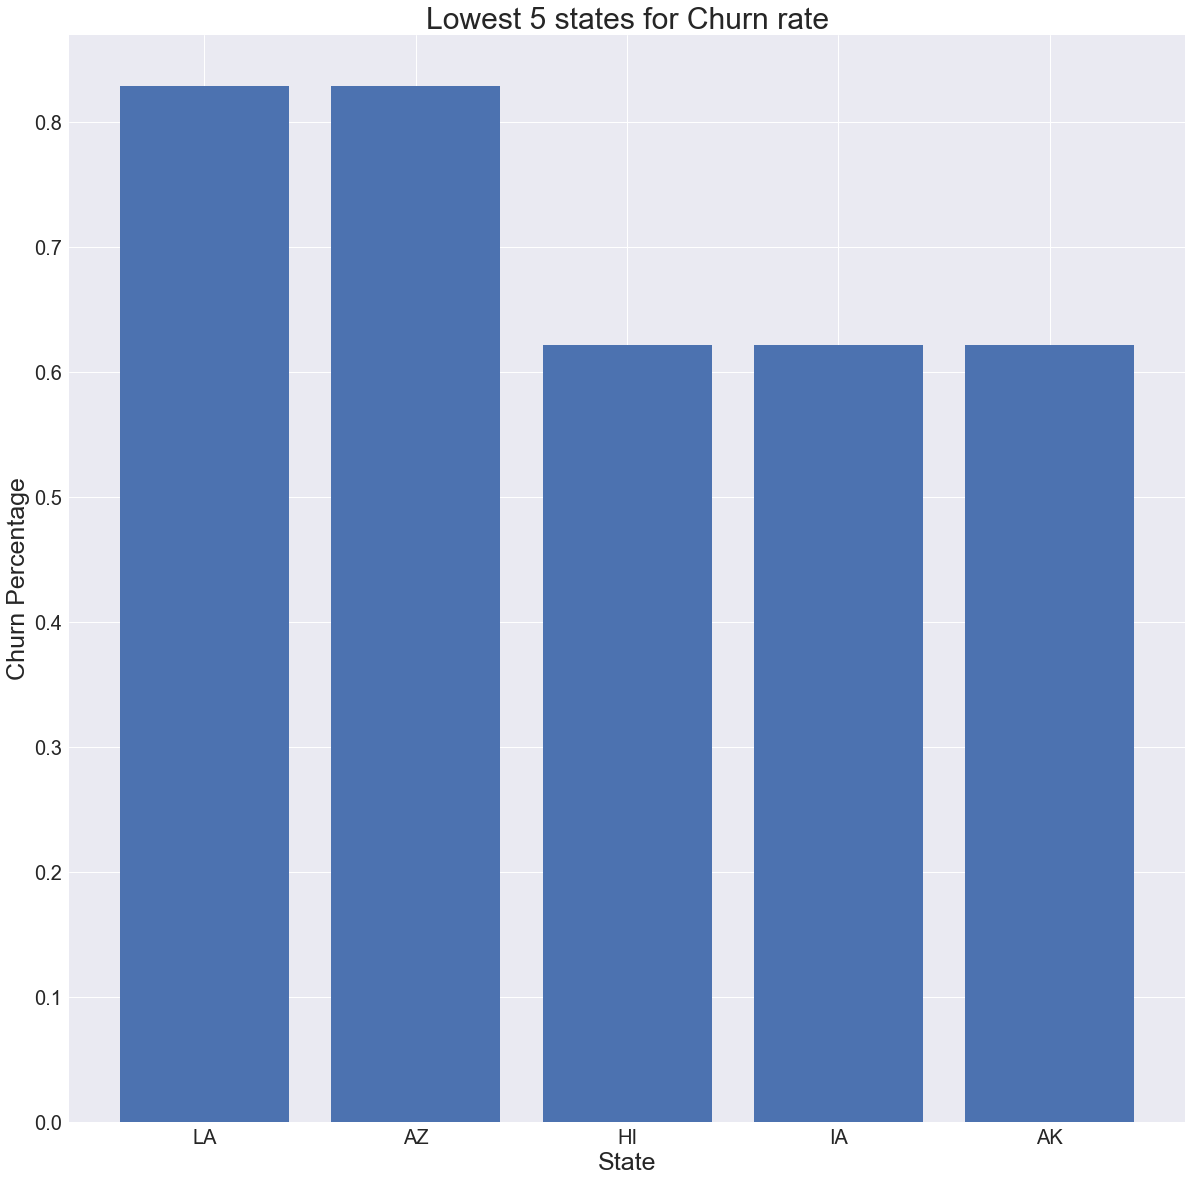

In [122]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(lower_five_churn['state'], lower_five_churn['churn_percentage'])
plt.title('Lowest 5 states for Churn rate', fontsize = 30)

ax.set_xlabel("State",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')

Also since there is a significant difference across states in terms of churn rates, I am also encoding the states data to be used in our model.

In [123]:
df['state'] = label_encoder.fit_transform(df['state'])
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,49,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,39,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,6,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Correlation Matrix

In [124]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.0,0.0037,0.015,-0.0046,-0.032,-0.028,-0.0067,-0.00076,-0.0067,0.014,-0.016,0.014,0.025,0.0075,0.025,-0.0078,0.014,-0.0078,-0.026,0.0078
account length,0.0037,1.0,-0.015,0.025,0.0029,-0.0046,0.0062,0.038,0.0062,-0.0068,0.019,-0.0067,-0.009,-0.013,-0.009,0.0095,0.021,0.0095,-0.0038,0.017
area code,0.015,-0.015,1.0,0.044,0.0099,0.0091,0.01,-0.0071,0.01,0.00028,-0.0021,0.0003,0.0071,0.028,0.0071,0.0015,-0.0081,0.0014,0.028,0.0033
international plan,-0.0046,0.025,0.044,1.0,0.006,0.0087,0.049,0.0038,0.049,0.019,0.0061,0.019,-0.029,0.012,-0.029,0.046,0.017,0.046,-0.025,0.26
voice mail plan,-0.032,0.0029,0.0099,0.006,1.0,0.96,-0.0017,-0.011,-0.0017,0.022,-0.0064,0.022,0.0061,0.016,0.0061,-0.0013,0.0076,-0.0013,-0.018,-0.1
number vmail messages,-0.028,-0.0046,0.0091,0.0087,0.96,1.0,0.00078,-0.0095,0.00078,0.018,-0.0059,0.018,0.0077,0.0071,0.0077,0.0029,0.014,0.0029,-0.013,-0.09
total day minutes,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total day calls,-0.00076,0.038,-0.0071,0.0038,-0.011,-0.0095,0.0068,1.0,0.0068,-0.021,0.0065,-0.021,0.023,-0.02,0.023,0.022,0.0046,0.022,-0.019,0.018
total day charge,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total eve minutes,0.014,-0.0068,0.00028,0.019,0.022,0.018,0.007,-0.021,0.007,1.0,-0.011,1.0,-0.013,0.0076,-0.013,-0.011,0.0025,-0.011,-0.013,0.093


There are no major correlation across any features apart from voicemail messages and active voicemail plan (it makes sense people with a voicemail plan wouls send more VM messages). Also, we have a perfect correlation between minutes and expenses charge, highlighting the fact that the company charges on a per minute basis across every time of the day day/evening/night.

# Baseline Model Naive Bayes

In [125]:
# converting target variable into integers
df['churn'] = df['churn'].astype(int)
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [126]:
# setting up the y target and X dataset
y = df['churn']
X = df.drop('churn', axis = 1)


In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
state                     3333 non-null int64
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dty

In [128]:
# splitting initial training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

print(f'My training set is {X_train_f.shape}')
print(f'My final test set is {X_test.shape}')
print(f'My training set dependant variable is {y_train_f.shape}')
print(f'My test set dependant variable is {y_test.shape}')

My training set is (2333, 19)
My final test set is (1000, 19)
My training set dependant variable is (2333,)
My test set dependant variable is (1000,)


In [129]:
# baseline model using bayes naive learner

# setting up the learner
gnb = GaussianNB()

# fitting the model and predict
model_naive = gnb.fit(X_train, y_train)

y_pred = model_naive.predict_proba(X_train)[:,1]
# y_pred_50 = model_naive.predict(X_train)
# len(y_pred)
# model_naive 

roc_auc_score (y_train, y_pred)

0.8445116732091734

## Baseline Performance Evaluation Naive Bayes

In [130]:
skf = StratifiedKFold(n_splits = 10, random_state = 600)

param_grid = {'var_smoothing': [1e-09]}

opt_model = GridSearchCV(model_naive,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)
opt_model.fit(X_train,y_train)

opt_model.cv_results_


{'mean_fit_time': array([0.00452423]),
 'std_fit_time': array([0.0022935]),
 'mean_score_time': array([0.00399926]),
 'std_score_time': array([0.00200355]),
 'param_var_smoothing': masked_array(data=[1e-09],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-09}],
 'split0_test_score': array([0.86911765]),
 'split1_test_score': array([0.82647059]),
 'split2_test_score': array([0.89970588]),
 'split3_test_score': array([0.85545374]),
 'split4_test_score': array([0.85634053]),
 'split5_test_score': array([0.84156074]),
 'split6_test_score': array([0.70898611]),
 'split7_test_score': array([0.84850724]),
 'split8_test_score': array([0.82234703]),
 'split9_test_score': array([0.84540349]),
 'mean_test_score': array([0.83742493]),
 'std_test_score': array([0.04754577]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.84168097]),
 'split1_train_score': array([0.84855229]),
 'split2_train_score': array(

In [131]:
print('The validation baseline roc_auc score is mean 0.8374 std 0.04')
print('The training baseline roc_auc_score is mean 0.8448 std 0.004 ')

The validation baseline roc_auc score is mean 0.8374 std 0.04
The training baseline roc_auc_score is mean 0.8448 std 0.004 


# Decision Tree and Hyperparameter Tuning

In [151]:
from sklearn.tree import DecisionTreeClassifier
# setting up the learner
model_tree = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,random_state=40, class_weight = 'balanced' )
# fitting the model
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [152]:
# predicted values for unoptimised decision tree
y_hat = model_tree.predict_proba(X_train)[:,1]
# calculating initial roc_score for the decision tree
initial_score_roc_auc = roc_auc_score (y_train, y_hat)
initial_score_roc_auc

0.7525611699772734

In [153]:
# applying hyperparameter optimisation
skf = StratifiedKFold(n_splits = 10, random_state = 600)

param_grid = {'max_depth': range(1,15), 'min_samples_leaf': [5,10,15, 20,25] }

opt_model = GridSearchCV(model_tree,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)
opt_model.fit(X_train,y_train)

pd.DataFrame(opt_model.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007706,0.003132,0.003199,0.001309,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.590147,0.568235,0.641471,0.572790,0.619051,0.610774,0.557715,0.565253,0.638782,0.666051,0.603023,0.035793,66,0.634240,0.622837,0.633365,0.622330,0.635856,0.652671,0.642671,0.641834,0.633665,0.630637,0.635011,0.008666
1,0.005752,0.000544,0.002249,0.000254,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.590147,0.568235,0.641471,0.572790,0.619051,0.610774,0.557715,0.565253,0.638782,0.666051,0.603023,0.035793,66,0.634240,0.622837,0.633365,0.622330,0.635856,0.652671,0.642671,0.641834,0.633665,0.630637,0.635011,0.008666
2,0.005585,0.000440,0.002340,0.000206,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.590147,0.568235,0.641471,0.572790,0.619051,0.610774,0.557715,0.565253,0.638782,0.666051,0.603023,0.035793,66,0.634240,0.622837,0.633365,0.622330,0.635856,0.652671,0.642671,0.641834,0.633665,0.630637,0.635011,0.008666
3,0.005764,0.000633,0.002411,0.000453,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.590147,0.568235,0.641471,0.572790,0.619051,0.610774,0.557715,0.565253,0.638782,0.666051,0.603023,0.035793,66,0.634240,0.622837,0.633365,0.622330,0.635856,0.652671,0.642671,0.641834,0.633665,0.630637,0.635011,0.008666
4,0.005626,0.000332,0.002364,0.000320,1,25,"{'max_depth': 1, 'min_samples_leaf': 25}",0.590147,0.568235,0.641471,0.572790,0.619051,0.610774,0.557715,0.565253,0.638782,0.666051,0.603023,0.035793,66,0.634240,0.622837,0.633365,0.622330,0.635856,0.652671,0.642671,0.641834,0.633665,0.630637,0.635011,0.008666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.021947,0.001504,0.002479,0.000284,14,5,"{'max_depth': 14, 'min_samples_leaf': 5}",0.855368,0.809118,0.869632,0.811336,0.882279,0.842078,0.821904,0.867943,0.806533,0.877402,0.844360,0.028490,52,0.989809,0.990761,0.988983,0.991511,0.990954,0.993158,0.994448,0.993666,0.990497,0.990443,0.991423,0.001680
66,0.019989,0.001152,0.002427,0.000110,14,10,"{'max_depth': 14, 'min_samples_leaf': 10}",0.893162,0.788456,0.864485,0.873337,0.890408,0.859223,0.827742,0.876293,0.882427,0.908587,0.866389,0.033339,23,0.984047,0.980374,0.984143,0.984727,0.983651,0.982966,0.986587,0.985993,0.981848,0.982323,0.983666,0.001785
67,0.019437,0.000953,0.002572,0.000377,14,15,"{'max_depth': 14, 'min_samples_leaf': 15}",0.903162,0.785515,0.895294,0.829072,0.917159,0.855084,0.847177,0.883018,0.881318,0.908809,0.870549,0.039165,10,0.977007,0.976792,0.977757,0.975449,0.977964,0.974868,0.979944,0.975679,0.976678,0.974210,0.976635,0.001596
68,0.018934,0.000950,0.002490,0.000186,14,20,"{'max_depth': 14, 'min_samples_leaf': 20}",0.885809,0.772574,0.885882,0.839270,0.902601,0.869421,0.860627,0.888856,0.874224,0.891590,0.867061,0.035873,20,0.970570,0.968370,0.968491,0.968049,0.968475,0.970190,0.972587,0.971351,0.970051,0.968747,0.969688,0.001433


In [154]:
# best hyperparameters and roc_auc score
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model.best_params_)
opt_model.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'max_depth': 11, 'min_samples_leaf': 15}


0.8766048520634488

# Random Forest Classifier and Hyperparameters Tuning

In [155]:
# setting up the learner and fitting
model_random_forest = RandomForestClassifier(n_estimators=100, 
                                             random_state = 11, 
                                             class_weight= 'balanced',
                                             max_depth = 15,
                                             min_samples_leaf= 20 
                                             )
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=11, verbose=0, warm_start=False)

In [156]:
# estimating initial performance
y_hat_random = model_random_forest.predict_proba(X_train)[:,1]
print('Roc_score is ',roc_auc_score(y_train, y_hat_random))


Roc_score is  0.9700156429857443


Clear signs of overfitting!

In [158]:
# applying hyperparameter optimisations
skf = StratifiedKFold(n_splits = 10, random_state = 600)

param_grid = {'max_depth': range(1,15), 'min_samples_leaf': [5,10,15,20,25]}

opt_model = GridSearchCV(model_random_forest,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model.fit(X_train,y_train)

pd.DataFrame(opt_model.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.198918,0.016036,0.011001,0.000643,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.856765,0.842132,0.908382,0.833654,0.841487,0.787393,0.720588,0.831880,0.829663,0.902232,0.835461,0.050851,67,0.857360,0.858392,0.852268,0.854245,0.851277,0.841151,0.851940,0.847270,0.845830,0.850150,0.850988,0.004965
1,0.188391,0.001118,0.011015,0.000556,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.856765,0.842132,0.908382,0.833654,0.841487,0.787393,0.720588,0.831880,0.829663,0.902232,0.835461,0.050851,67,0.857360,0.858392,0.852268,0.854245,0.851277,0.841151,0.851940,0.847270,0.845830,0.850150,0.850988,0.004965
2,0.188978,0.000755,0.010909,0.000698,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.856765,0.842132,0.908382,0.833654,0.841487,0.787393,0.720588,0.831880,0.829663,0.902232,0.835461,0.050851,67,0.857360,0.858392,0.852268,0.854245,0.851277,0.841151,0.851940,0.847270,0.845830,0.850150,0.850988,0.004965
3,0.189058,0.003585,0.010805,0.000638,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.856765,0.842132,0.908382,0.833654,0.841487,0.787393,0.720588,0.831880,0.829663,0.902232,0.835461,0.050851,67,0.857360,0.858392,0.852268,0.854245,0.851277,0.841151,0.851940,0.847270,0.845830,0.850150,0.850988,0.004965
4,0.188113,0.001137,0.010734,0.000543,1,25,"{'max_depth': 1, 'min_samples_leaf': 25}",0.856765,0.842132,0.908382,0.833432,0.850281,0.787393,0.720588,0.831880,0.829663,0.902232,0.836317,0.051024,66,0.857360,0.858392,0.852268,0.854132,0.851548,0.841151,0.851940,0.847270,0.845830,0.850150,0.851004,0.004960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.408106,0.004065,0.012328,0.000495,14,5,"{'max_depth': 14, 'min_samples_leaf': 5}",0.938824,0.828235,0.972500,0.891960,0.951375,0.865061,0.825007,0.908661,0.901419,0.901567,0.898480,0.046413,5,0.997273,0.997696,0.997323,0.997579,0.997182,0.997914,0.997758,0.997477,0.998177,0.997911,0.997629,0.000305
66,0.391246,0.007189,0.012283,0.000652,14,10,"{'max_depth': 14, 'min_samples_leaf': 10}",0.932353,0.834853,0.960882,0.894620,0.949601,0.853680,0.821017,0.909400,0.886639,0.911617,0.895484,0.044812,15,0.987920,0.989941,0.988009,0.989906,0.988832,0.989296,0.989571,0.989205,0.988857,0.988152,0.988969,0.000712
67,0.376307,0.003502,0.012316,0.000563,14,15,"{'max_depth': 14, 'min_samples_leaf': 15}",0.933529,0.827206,0.958088,0.886196,0.940585,0.865947,0.816140,0.902158,0.880579,0.920337,0.893094,0.044901,24,0.976091,0.979339,0.978158,0.978833,0.977102,0.979057,0.978795,0.978820,0.978492,0.978071,0.978276,0.000942
68,0.365600,0.003889,0.011933,0.000569,14,20,"{'max_depth': 14, 'min_samples_leaf': 20}",0.924118,0.840735,0.958824,0.878362,0.937925,0.843187,0.813479,0.902749,0.879101,0.916790,0.889551,0.044513,38,0.968549,0.972380,0.968787,0.970186,0.967384,0.969135,0.971313,0.968282,0.970406,0.968583,0.969500,0.001457


In [159]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model.best_params_)
opt_model.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'max_depth': 12, 'min_samples_leaf': 5}


0.9010039494261607

# Logistic Regression

In [178]:
# setting up the learner and fitting it
log_model = LogisticRegression(class_weight = 'balanced', penalty = 'l2', random_state = 39)
log_model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=39, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
# evaluating performance on roc_curve
y_hat_log = log_model.predict_proba(X_train)[:,1]
print('Roc_score is ',roc_auc_score(y_train, y_hat_log))

Roc_score is  0.8209409403500485


In [180]:
# hyperparameter tuning on Logistic regression
skf = StratifiedKFold(n_splits = 10, random_state = 600)

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20)
              }

opt_model = GridSearchCV(log_model,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model.fit(X_train,y_train)

pd.DataFrame(opt_model.cv_results_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006393,0.001239,0.003059,0.000809,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.703235,0.683235,0.672279,0.685191,0.624667,0.596364,0.453296,0.551360,0.618534,0.620381,0.620938,0.071399,37,0.612495,0.614478,0.616100,0.614607,0.621046,0.624503,0.640189,0.629435,0.621734,0.621343,0.621593,0.007928
1,0.035789,0.022436,0.006238,0.005168,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.703382,0.754265,0.699853,0.699675,0.644546,0.610109,0.479456,0.591339,0.619716,0.660361,0.646364,0.073290,36,0.661959,0.652587,0.656371,0.659355,0.660976,0.663025,0.676580,0.663621,0.665862,0.660743,0.662108,0.006008
2,0.020715,0.014764,0.003879,0.002583,0.000263665,l1,"{'C': 0.00026366508987303583, 'penalty': 'l1'}",0.672206,0.670735,0.644412,0.662282,0.538427,0.589418,0.456104,0.540497,0.604345,0.589122,0.596839,0.066521,40,0.593608,0.594620,0.596510,0.595172,0.606298,0.609484,0.619531,0.610630,0.600608,0.602382,0.602884,0.008076
3,0.015182,0.002372,0.002504,0.000336,0.000263665,l2,"{'C': 0.00026366508987303583, 'penalty': 'l2'}",0.711618,0.775147,0.727500,0.714602,0.680461,0.638930,0.506946,0.643068,0.640556,0.693467,0.673313,0.069127,35,0.692677,0.684197,0.684499,0.689878,0.686422,0.692045,0.703534,0.687848,0.694025,0.689253,0.690438,0.005392
4,0.016849,0.004716,0.002600,0.000217,0.000695193,l1,"{'C': 0.0006951927961775605, 'penalty': 'l1'}",0.696765,0.681471,0.669853,0.682530,0.573160,0.561632,0.429500,0.516258,0.599025,0.603311,0.601455,0.081217,39,0.609196,0.604914,0.609161,0.609749,0.619507,0.618567,0.636980,0.626877,0.618494,0.616341,0.616979,0.009106
5,0.017879,0.001751,0.002511,0.000367,0.000695193,l2,"{'C': 0.0006951927961775605, 'penalty': 'l2'}",0.714559,0.787206,0.752941,0.727313,0.727017,0.669081,0.536654,0.700266,0.671445,0.724948,0.701208,0.064148,33,0.722443,0.714946,0.713191,0.719273,0.713402,0.721834,0.731957,0.713050,0.721443,0.716333,0.718787,0.005634
6,0.022722,0.008367,0.002744,0.000661,0.00183298,l1,"{'C': 0.0018329807108324356, 'penalty': 'l1'}",0.679412,0.713088,0.670588,0.688590,0.603902,0.579367,0.448419,0.530890,0.599468,0.623116,0.613779,0.076669,38,0.623512,0.613481,0.620408,0.620993,0.628932,0.626309,0.645381,0.635579,0.629169,0.624569,0.626833,0.008369
7,0.022884,0.002227,0.002632,0.000341,0.00183298,l2,"{'C': 0.0018329807108324356, 'penalty': 'l2'}",0.719265,0.787353,0.777794,0.734703,0.756577,0.683269,0.565179,0.750813,0.702335,0.758646,0.723642,0.061121,32,0.742094,0.737091,0.733471,0.740548,0.734139,0.744349,0.753188,0.733888,0.741540,0.735711,0.739602,0.005827
8,0.024581,0.002065,0.002909,0.000666,0.00483293,l1,"{'C': 0.004832930238571752, 'penalty': 'l1'}",0.699559,0.771912,0.748676,0.710464,0.696867,0.673662,0.523500,0.658291,0.677801,0.728791,0.689018,0.064295,34,0.716011,0.705057,0.704000,0.709943,0.700760,0.710976,0.722244,0.699876,0.712278,0.705571,0.708671,0.006652
9,0.037863,0.009983,0.003582,0.001440,0.00483293,l2,"{'C': 0.004832930238571752, 'penalty': 'l2'}",0.732941,0.783382,0.799559,0.741206,0.780225,0.696719,0.589270,0.787467,0.728939,0.788354,0.742844,0.060250,31,0.758892,0.757632,0.750444,0.759700,0.754550,0.765405,0.772052,0.753607,0.760139,0.753017,0.758544,0.006090


In [181]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model.best_params_)
opt_model.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'C': 11.288378916846883, 'penalty': 'l1'}


0.8055346473422557